In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import random as rn
import numpy as np
allMan = range(1,10)*4
allMan = sorted(allMan)
rn.shuffle(allMan)
#print(allMan)

allPin = range(21,30)*4
allPin = sorted(allPin)
rn.shuffle(allPin)
#print(allPin)

allSou = range(41,50)*4
allSou = sorted(allSou)
rn.shuffle(allSou)
#print(allSou)

allHonor = range(60,121,10)*4
allHonor = sorted(allHonor)
rn.shuffle(allHonor)
#print(allHonor)

allTiles = allMan + allPin + allSou + allHonor
allTiles = sorted(allTiles)
rn.shuffle(allTiles)
#print(allTiles)

#print(len(allTiles))

In [20]:
def rh():
    return sorted(allMan[:14])

hand = rh()
print(len(hand))
print(hand)

def rhFull(allTiles):
    allTiles = sorted(allTiles)
    rn.shuffle(allTiles)
    return sorted(allTiles[:14])

def rhFull13(allTiles):
    allTiles = sorted(allTiles)
    rn.shuffle(allTiles)
    return sorted(allTiles[:13])

rhfHand = rhFull(allTiles)
print(rhfHand)

14
[1, 3, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7, 8, 9]
[4, 8, 22, 22, 23, 27, 27, 41, 42, 47, 90, 90, 100, 120]


There are 5 slots that need to be filled to complete a hand, 4 melds (either something like 333 or like 345) and 1 pair
(something like 77.)

In [21]:
def mp(hand):
    markPairs = []
    if len(hand) != 0:
        for i in set(hand):
            if hand.count(i) > 1:
                markPairs.append(i)
    return markPairs

ot = mp(hand)
#print(ot)

In [22]:
def cc(hand):
    complete = False
    paired = mp(hand)
    if len(paired) == 0:
        return complete
    else:
        for i in range(len(paired)):
            done = 0
            mh = hand[:]
            mh.remove(paired[i])
            mh.remove(paired[i])
            while len(mh) != 0 and done == 0:
                val = mh[0]
                if mh.count(val) >= 3:
                    mh.remove(val)
                    mh.remove(val)
                    mh.remove(val)
                elif val-1 in mh and val-2 in mh:
                    mh.remove(val)
                    mh.remove(val-1)
                    mh.remove(val-2)
                elif val-1 in mh and val+1 in mh:
                    mh.remove(val)
                    mh.remove(val-1)
                    mh.remove(val+1)
                elif val+1 in mh and val+2 in mh:
                    mh.remove(val)
                    mh.remove(val+1)
                    mh.remove(val+2)
                else:
                    done = 1
            if len(mh) == 0:
                complete = True
    return complete
#cc(hand)
cc([1,1,1,2,3,4,4,4,6,6,6,7,8,9])

True

Now we have to define Tenpai, and define it WITHOUT checking
to see if adding to it would result in a complete hand, because if you keep doing that, you end up with too
huge of a bruteforce when you're trying to calculate if it's anywhere from 3 to 5 shanten. (You don't need to calculate if it's 6 shanten because you're always at least 6 shanten because of seven pairs.)

Anyhow yeah, for this one I'm going to actually introduce the hand as four lists, man, pin, sou, and honor.

In [23]:
nineGates = [1,1,1,2,3,4,5,6,7,8,9,9,9,70]

def handToFourList(hand):
    man=[]
    pin=[]
    sou=[]
    honor=[]
    handConvert = []
    for i in hand:
        if i in range(1,10):
            man.append(i)
        elif i in range(21,30):
            pin.append(i)
        elif i in range(41,50):
            sou.append(i)
        elif i in range(60,500):#121):
            honor.append(i)
        else:
            print("invalid hand")
            return
    handConvert.append(man)
    handConvert.append(pin)
    handConvert.append(sou)
    handConvert.append(honor)
    return handConvert

#q = handToFourList(nineGates)
#print(q)

def shantenLookup(lisk):
    #conditions for complete thru 5 away
    # MIGHT BE INCOMPLETE
    complete = [[4,1,0]]
    tenpai = [[4,0,0],[3,1,1],[3,2,0],[4,0,1]]
    away1 = [[3,1,0],[3,0,1],[2,1,2],[2,2,1],[2,3,0],[3,0,2]]
    away2 = [[3,0,0],[2,1,1],[2,2,0],[2,0,2],[2,0,3],[1,1,3],[1,2,2],[1,3,1],[1,4,0]]
    away3 = [[1,0,4],[1,0,5],[2,0,1],[2,1,0],[1,0,3],[1,1,2],[1,2,1],[1,3,0],[0,5,0],[0,4,1],[0,3,2],[0,2,3],[0,1,4]]
    away4 = [[2,0,0],[1,0,2],[1,2,0],[1,1,1],[0,0,5],[0,0,4],[0,3,1],[0,2,2],[0,1,3],[0,4,0]]
    away5 = [[1,0,1],[1,1,0],[0,0,3],[0,2,1],[0,1,2],[0,3,0]]
    #not 002, 011, 020, these are 6
    
    if lisk in complete:
        return -1
    elif lisk in tenpai:
        return 0
    elif lisk in away1:
        return 1
    elif lisk in away2:
        return 2
    elif lisk in away3:
        return 3
    elif lisk in away4:
        return 4
    elif lisk in away5:
        return 5
    else:
        return 6

# lusk = [4,1,0]

# qqq = shantenLookup(lusk)
    
# print(qqq)

def daPairShantenPlz(hand):
    pairs = 0
    for i in set(hand):
        if hand.count(i) > 1:
            pairs += 1
    return (6 - pairs)

def daKokushiShantenPlz(hand):
    daSum = 0
    daKokushis = [1,9,21,29,41,49,60,70,80,90,100,110,120]
    for i in range(len(daKokushis)):
        if hand.count(daKokushis[i]) > 0:
            daSum += 1
    inc = False
    for i in hand:
        if i in daKokushis and hand.count(i) > 1:
            inc = True
    if inc == True:
        daSum += 1
    return (13 - daSum)

def shantenPlz(hand):
    '''This function is bloated, but it is also very fast and works flawlessly near as I can tell,
    so it's fine.'''
    hc = handToFourList(hand)
    bestScore = [0,0,0]
    scores = []
    #print(hc)
    for v in range(len(hc)):
        #print("hci",hc[v])
        if len(hc[v]) <= 1:
            scores.append([[0,0,0]])
        else:
            paired = mp(hc[v])
            #print("the pairs",paired)
            if len(paired) == 0:
                done = 0
                doon = 0
                meldCount = 0
                pairCount = 0
                connCount = 0
                mh = hc[v][:]
                #print("NO pair land")
                spt = 0
                #print("spt",spt)
                #print("len(mh)",len(mh))
                #print("mh",mh)
                #print("mh[0]",mh[0])
                while len(mh) > 2 and spt <= len(mh)-1:
                    #print("spt",spt)
                    #print("len(mh)",len(mh))
                    #print("mh",mh)
                    #print("mh[0]",mh[0])
                    val = mh[spt]
                    if mh.count(val) >= 3:
                        mh.remove(val)
                        mh.remove(val)
                        mh.remove(val)
                        meldCount += 1
                        spt = 0
                    elif val in mh and val-1 in mh and val-2 in mh:
                        mh.remove(val)
                        mh.remove(val-1)
                        mh.remove(val-2)
                        meldCount += 1
                        spt = 0
                    elif val in mh and val-1 in mh and val+1 in mh:
                        mh.remove(val)
                        mh.remove(val-1)
                        mh.remove(val+1)
                        meldCount += 1
                        spt = 0
                    elif val in mh and val+1 in mh and val+2 in mh:
                        mh.remove(val)
                        mh.remove(val+1)
                        mh.remove(val+2)
                        meldCount += 1
                        spt = 0
                    else:
                        spt += 1
                spt = 0
                #print("pairs smaller area")
                #print("spt",spt)
                #print("len(mh)",len(mh))
                #print("mh",mh)
                #print("mh[0]",mh[0])
                while len(mh) > 1 and spt <= len(mh)-1:
                    #print("spt",spt)
                    #print("len(mh)",len(mh))
                    #print("mh",mh)
                    #print("mh[0]",mh[0])
                    val = mh[spt]
                    if mh.count(val) >= 2:
                        mh.remove(val)
                        mh.remove(val)
                        connCount += 1
                        spt = 0
                    elif val in mh and val+1 in mh:
                        mh.remove(val)
                        mh.remove(val+1)
                        connCount += 1
                        spt = 0
                    elif val in mh and val+2 in mh:
                        #print("we're in val+2 mh",mh,val,val+2)
                        mh.remove(val)
                        mh.remove(val+2)
                        connCount += 1
                        spt = 0
                    else:
                        spt += 1
                scores.append([meldCount,pairCount,connCount])
            else:
                subscores = []
                for i in range(len(paired)):
                    #print("before we even do anything",hc[v])
                    done = 0
                    doon = 0
                    #print("pre-assign",hc[v])
                    mh = hc[v][:]
                    #print("post-assign",hc[v])
                    #print("before pair del",mh)
                    mh.remove(paired[i])
                    mh.remove(paired[i])
                    #print("after pair del",hc[v])
                    meldCount = 0
                    pairCount = 1
                    connCount = 0
                    spt = 0
                    #print("yeah it went into pair land")
                    while len(mh) > 2 and spt <= len(mh)-1:
                        #print("spt",spt)
                        #print("len(mh)",len(mh))
                        val = mh[spt]
                        if mh.count(val) >= 3:
                            mh.remove(val)
                            mh.remove(val)
                            mh.remove(val)
                            meldCount += 1
                            spt = 0
                        elif val in mh and val-1 in mh and val-2 in mh:
                            mh.remove(val)
                            mh.remove(val-1)
                            mh.remove(val-2)
                            meldCount += 1
                            spt = 0
                        elif val in mh and val-1 in mh and val+1 in mh:
                            mh.remove(val)
                            mh.remove(val-1)
                            mh.remove(val+1)
                            meldCount += 1
                            spt = 0
                        elif val in mh and val+1 in mh and val+2 in mh:
                            mh.remove(val)
                            mh.remove(val+1)
                            mh.remove(val+2)
                            meldCount += 1
                            spt = 0
                        else:
                            spt += 1
                    spt = 0
                    while len(mh) > 1 and spt <= len(mh)-1:
                        val = mh[spt]
                        if mh.count(val) >= 2:
                            mh.remove(val)
                            mh.remove(val)
                            connCount += 1
                            spt = 0
                        elif val in mh and val+1 in mh:
                            mh.remove(val)
                            mh.remove(val+1)
                            connCount += 1
                            spt = 0
                        elif val in mh and val+2 in mh:
                            #print("we're in val+2 mh [secondArea]",mh,val,val+2)
                            mh.remove(val)
                            mh.remove(val+2)
                            connCount += 1
                            spt = 0
                        else:
                            spt += 1
                    #print("post-elim",hc[v])
                    subscores.append([meldCount,pairCount,connCount])
                scores.append(subscores)
    rankScores = []
    for i in range(len(scores)):
        if len(scores[i]) == 0:
            scores[i] = [[0,0,0]]
        elif type(scores[i][0]) == int:
            scores[i] = [scores[i]]
    for i in scores:
        np.array(i)
    ###print(scores)
    for i in scores[0]:
        for j in scores[1]:
            for k in scores[2]:
                for l in scores[3]:
                    sum = np.array([0,0,0])
                    #print(sum)
                    sum += i
                    #print(sum)
                    sum += j
                    #print(sum)
                    sum += k
                    #print(sum)
                    sum += l
                    #print(sum)
                    #print(sum)
                    if sum[1] > 1:
                        sum[1] = 1
                    #print(sum)
                    rankScores.append(shantenLookup(list(sum)))
    done = 0
    doon = 0
    meldCount = 0
    pairCount = 0
    connCount = 0
    mh = hand[:]
    spt = 0
    #print("final area")
    while len(mh) > 2 and spt <= len(mh)-1:
        val = mh[spt]
        if mh.count(val) >= 3:
            mh.remove(val)
            mh.remove(val)
            mh.remove(val)
            meldCount += 1
            spt = 0
        elif val-1 in mh and val-2 in mh:
            mh.remove(val)
            mh.remove(val-1)
            mh.remove(val-2)
            meldCount += 1
            spt = 0
        elif val in mh and val-1 in mh and val+1 in mh:
            mh.remove(val)
            mh.remove(val-1)
            mh.remove(val+1)
            meldCount += 1
            spt = 0
        elif val in mh and val+1 in mh and val+2 in mh:
            mh.remove(val)
            mh.remove(val+1)
            mh.remove(val+2)
            meldCount += 1
            spt = 0
        else:
            spt += 1
    spt = 0
    
    while len(mh) != 0 and spt <= len(mh)-1:
        val = mh[spt]
        for i in mh:
            if mh.count(i) >= 2:
                mh.remove(i)
                mh.remove(i)
                if pairCount == 0:
                    pairCount += 1
                else:
                    connCount += 1
                spt = 0
        if val in mh and val+1 in mh:
            mh.remove(val)
            mh.remove(val+1)
            connCount += 1
            spt = 0
        elif val in mh and val+2 in mh:
            mh.remove(val)
            mh.remove(val+2)
            connCount += 1
            spt = 0
        else:
            spt += 1
    rankScores.append(shantenLookup([meldCount,pairCount,connCount]))
    rankScores.append(daPairShantenPlz(hand))
    rankScores.append(daKokushiShantenPlz(hand))
    if cc(hand) == True:
        rankScores.append(-1)
    ###print([meldCount,pairCount,connCount])
    ###print(rankScores)
    #Interpreting the results:
    # -1 = complete
    # 0 = tenpai
    # 1 = 1 shanten
    # 2 = 2 shanten
    # etc
    return min(rankScores)

#testHand = 

testHand = rhFull(allTiles)
#print(len(testHand))
#print(testHand)

#print(daPairShantenPlz(testHand))

#print("===")
#print("===")

#print(daKokushiShantenPlz(testHand))

#print(len(testHand))

#shantenPlz(testHand)

#######################################################
#######################################################
#######################################################
#######################################################

#### NEW FUNCTIONS FOR DETERMINISTIC OFFENSE ##########

#uses shantenPlz()

#                goals:

## imagine a hand, we want to figure out:
    # - the shanten
    # - how many literal existant tiles improve the shanten of the hand. (Waits)
            # (this is a differentiator for 2 shanten hands for example. Not all 2 shantens are equal.)
    # - the discard that is most likely to lead to the hand with the best shanten and waits. (2 deep)
    
    # notes on that last thing I just said -- I gotta think about how involved that is.
    ## seems like for one you have to know what tiles are out. this could honestly be condensed in a column
    # as a list of all 34 unique tiles by rank (idk if including red 5s separately or not)
    #### Also, you'd potentially need to go several checks deep. 
    
# def lookingForward(hand,seenTileCounts):
#     ''' takes 2 inputs -- your hand and the tiles you know are out (would already include your hand's tiles)'''
    
#     stc = seenTileCounts[:] #list of counts of tiles you've seen, max is 4, meaning you can't draw the tile.
    
#     allTilesListed = [1,2,3,4,5,6,7,8,9,
#                       21,22,23,24,25,26,27,28,29,
#                       41,42,43,44,45,46,47,48,49,
#                       60,70,80,90,100,110,120]    #List of all tiles, but will be updated with all the tiles
#     # that are impossible to draw after it accounts for this below.
    
#     availableDraws = {}
    
#     for i in range(len(seenTileCounts)):
#         availableDraws[allTilesListed[i]] = (4-seenTileCounts[i]) #this process returns a dictionary of how
#         #many tiles of each kind are available to draw.
    
#     #now we can iterate through the unique tiles in the hand:
        
#     mh = hand[:]
#     mhSet = set(hand[:])
#     outcomes = {} #storing all the different potential results for if you discard a tile.
#     for i in mhSet:
#         aD = availableDraws.copy()
#         tempMH = mh[:].remove(i)
#         outcomes[i] = {"lhs":[],"shantens":[],"avgI":[]} 
#         scoringLayer2 = []
#         # First, there's a list of likelihoods for each draw.
#         # Second list is shantens, # Last list is avg improvement looking a second move ahead!
#         for j in allTilesListed:
#             tempMH2 = tempMH[:].append(j)
#             outcomes[i]["lhs"].append(aD[j])
#             outcomes[i]["shantens"].append(shantenPlz(tempMH2))
#             ############################################################
#             ##Splitting down to the second layer now##
#             ############################################################
#             #
#             MH2 = tempMH2[:]
#             MH2SET = set(tempMH2[:])
#             o2L = {}
#             for k in MH2SET:
#                 aD2 = aD.copy()
#                 temp2MH = MH2[:].remove(k)
#                 o2L[k] = {"lhs":[],"shantens":[]} 
#                 #
#                 for L in allTilesListed:
#                     tempMH2 = tempMH[:].append(L)
#                     o2L[k]["lhs"].append(aD2[L])
#                     o2L[k]["shantens"].append(shantenPlz(temp2MH2))
#             ##
#             ### Adding up the o2L for each j (a weighted average of shantens in 2nd layer):
#             summer = 0
            
#             for x in range(len(o2L.keys())):
#                 for y,z in zip(o2L[o2L.keys()[i]]["lhs"],o2L[o2L.keys()[i]]["shantens"]):
                    

                
                
    
#######################################################
#######################################################
#######################################################
#######################################################



def replacementList(hand):
    rList = hand[:]
    for i in range(len(rList)):
        if rList.count(rList[i]) > 1:
            rList[i] = "x"
    return rList #rList

def theReplacements(rList,hand):
    #At some point this needs to take all the tiles you know about into consideration.
    allTilesTemp = allTiles[:]
    for i in hand:
        if i in allTilesTemp:
            allTilesTemp.remove(i)
    exportList = [[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    for i in range(len(rList)):
        if type(rList[i]) == int:
            for x in set(allTilesTemp):
                #if x != rList[i]:
                exportList[i].append(x) #if directly above is not commented out then tab this over
    return exportList
    
#darList = replacementList(testHand)

#rpla = theReplacements(darList,testHand)

def bestTileOfTiles(tiles,hand):
    #print(tiles)
    valueConvert = [500]*len(tiles)
    #
    terminals = [1,9,21,29,41,49]
    honors = [60,70,80,90,100,110,120]
    #kokushis = [terminals] + [honors]
    terminalSimples = [2,8,22,28,42,48]
    terminalCenters = [3,7,23,27,43,47]
    mediumCenters = [4,6,24,26,44,46]
    centers = [5,25,45]
    #simples = [terminalSimples] + [weakCenters] + [mediumCenters] + [centers]
    for i in range(len(tiles)):
        if tiles[i] == "z":
            pass
        elif hand[tiles[i]] in honors:
            valueConvert[i] = 0
        elif hand[tiles[i]] in terminals:
            valueConvert[i] = 1
        elif hand[tiles[i]] in terminalSimples:
            valueConvert[i] = 2
        elif hand[tiles[i]] in terminalCenters:
            valueConvert[i] = 3
        elif hand[tiles[i]] in mediumCenters:
            valueConvert[i] = 4
        elif hand[tiles[i]] in centers:
            valueConvert[i] = 5
    return valueConvert
            
def nextDiscardPlz(hand):
    '''this function does not work properly, but the shanten function does.'''
    dl = replacementList(hand)
    rpl = theReplacements(dl,hand)
    #print("hand",hand)
    #print("dl",dl)
    #print("rpl",rpl)
    moveScores = [[],[],[],[],[],[],[],[],[],[],[],[],[],[]] #byIndex
    #print(moveScores)
    
    for i in range(len(hand)):
        if dl[i] != "x":
            for x in range(len(rpl[i])):
                mha = hand[:]
                #print("mha[i]",mha[i])
                #print("rpl[i][x]",rpl[i][x])
                mha[i] = rpl[i][x]
                mha = sorted(mha)
                #print("sorted mha",mha)
                moveScores[i].append(shantenPlz(mha))
    moveScoresFinal = []
    #print(moveScores)
    for i in range(len(moveScores)):
        #if len(moveScores[i]) != 0:
            #moveScoresFinal.append(min(moveScores[i]))
        if len(moveScores[i]) != 0:
            moveScoresFinal.append(np.sum(moveScores[i]))
        else:
            moveScoresFinal.append(500)
    #print(moveScoresFinal)
    
    equalChecker = min(moveScoresFinal)
    toValueCheck = []
    for i in range(len(moveScoresFinal)):
        if moveScoresFinal[i] == equalChecker:
            toValueCheck.append(i)
        else:
            toValueCheck.append("z")
    realSelectFrom = bestTileOfTiles(toValueCheck,hand)
    #print(realSelectFrom)
    #print("actual hand",hand)
    basicStart = False
    datDisc = 0
    for i in range(len(hand)):
        if hand[i] > 59 and hand.count(hand[i]) < 2:
            basicStart = True
            datDisc = i
    if basicStart == True:
        return i
    else:
        return realSelectFrom.index(min(realSelectFrom))
    #return moveScoresFinal.index(min(moveScoresFinal))
#import time

#t1 = time.time()
#print(nextDiscardPlz(testHand))
#t2 = time.time()
#print("runtime",t2-t1)

#th = [3, 3, 4, 4, 5, 5, 21, 23, 25, 26, 26, 44, 45, 46]

#print(shantenPlz(th))


In [24]:
def lookingForward(hand,seenTileCounts,outputMode):
    #1 deep only
    ''' takes 2 inputs -- your hand and the tiles you know are out (would already include your hand's tiles)'''
    
    stc = seenTileCounts[:] #list of counts of tiles you've seen, max is 4, meaning you can't draw the tile.
    
    allTilesListed = [1,2,3,4,5,6,7,8,9,
                      21,22,23,24,25,26,27,28,29,
                      41,42,43,44,45,46,47,48,49,
                      60,70,80,90,100,110,120]    #List of all tiles, but will be updated with all the tiles
    # that are impossible to draw after it accounts for this below.
    
    availableDraws = {}
    
    for i in range(len(seenTileCounts)):
        availableDraws[allTilesListed[i]] = (4-seenTileCounts[i]) #this process returns a dictionary of how
        #many tiles of each kind are available to draw.

    #print(availableDraws)
    
    #now we can iterate through the unique tiles in the hand:
        
    mh = hand[:]
    #print("hand",hand)
    mhSet = set(hand[:])
    #print("mhSet",mhSet)
    outcomes = {} #storing all the different potential results for if you discard a tile.
    #print("outcomes",outcomes)
    for i in mhSet:
        #print("i in mhSet",i)
        aD = availableDraws.copy()
        #print("aD",aD)
        tempMH = mh[:]#.remove(i)
        tempMH.remove(i)
        #print("tempMH",tempMH)
        outcomes[i] = {"lhs":[],"shantens":[]} 
        scoringLayer2 = []
        # First, there's a list of likelihoods for each draw.
        # Second list is shantens, # Last list is avg improvement looking a second move ahead!
        for j in allTilesListed:
            tempMH2 = tempMH[:]#.append(j)
            tempMH2.append(j)
            tempMH2 = sorted(tempMH2)
            #print("tempMH2",tempMH2)
            outcomes[i]["lhs"].append(aD[j])
            outcomes[i]["shantens"].append(shantenPlz(tempMH2))
            
    averageOutcomes = [[]]
    manualAvg = []
    for i in outcomes.keys():
        bigList = []
        #print ("i",i)
        for y,z in zip(outcomes[i]["lhs"],outcomes[i]["shantens"]):
            #print(y,z)
            for _ in range(y):
                bigList.append(z)
        #print("avg outcome if disc "+str(i),np.mean(bigList))
        averageOutcomes[-1].append(np.mean(bigList))
        manualAvg.append(np.mean(bigList))
        averageOutcomes[-1].append(i)
        averageOutcomes.append([])
    averageOutcomes.remove(averageOutcomes[-1])
    #for i in averageOutcomes:
        #print(i)
    #averaged1stLayer = np.mean(averageOutcomes)
    #print("averaged1stLayer",averaged1stLayer)
    averageOutcomes = sorted(averageOutcomes)
    #print(averageOutcomes[0][1])
    #print("manualAvg",np.mean(manualAvg))
    
    if outputMode == "singleBest":
        return averageOutcomes[0][1]
    elif outputMode == "average":
        return np.mean(manualAvg)
            
st = [0]*34
mapz  = [0,1,2,3,4,5,6,7,8,  9,10,11,12,13,14,15,16,17, 18,19,20,21,22,23,24,25,26, 27,28,29,30, 31, 32, 33]
tilez = [1,2,3,4,5,6,7,8,9, 21,22,23,24,25,26,27,28,29, 41,42,43,44,45,46,47,48,49, 60,70,80,90,100,110,120]
hand = [1,2,4,5,6,7,23,23,28,70,70,70,100]
for i in range(len(hand)):
    st[mapz[tilez.index(hand[i])]] += 1
#print(st)

#lookingForward(hand,st,"singleBest")
lookingForward(hand,st,"average")

2.2796747967479676

In [25]:
shantenPlz([1,1,1,2,2,2,3,3,3,4,4,4,5,5])

-1

In [26]:
def playHand(forwardVersion):
    hand = rhFull13(allTiles)
    at2 = allTiles[:]
    rn.shuffle(at2)
    for i in range(len(hand)):
        at2.remove(hand[i])
        
    st = [0]*34
    mapz  = [0,1,2,3,4,5,6,7,8,  9,10,11,12,13,14,15,16,17, 18,19,20,21,22,23,24,25,26, 27,28,29,30, 31, 32, 33]
    tilez = [1,2,3,4,5,6,7,8,9, 21,22,23,24,25,26,27,28,29, 41,42,43,44,45,46,47,48,49, 60,70,80,90,100,110,120]
    for i in range(len(hand)):
        st[mapz[tilez.index(hand[i])]] += 1
    
    timeWon = -1
        
    for i in range(18):
        if shantenPlz(hand) != 0:
            hand.append(at2[0])
            st[mapz[tilez.index(hand[-1])]] += 1
            #print("drew " + (str(at2[0])))
            hand = sorted(hand)
            #print("hand now",hand)
            at2.remove(at2[0])
            dusk = forwardVersion(hand,st,"singleBest")
            #print("discard selection",str(dusk))
            hand.remove(dusk)
        else:
            #print("winrar in " + str(i-1) + "!")
            #print("handFinal",hand)
            timeWon = i
            break
    if timeWon == -1:
        return 0
    else:
        return 1
    
        
    
        

### Notes on the effectiveness of lookingForward() ...

#### There is an amazing accident where once the amount of waits is maximized, it discards lone tiles and holds onto honors.

#### I'm unsure whether this is good or bad, but it /could/ be very good if it doesn't go all in with single waits.

#### Also, there is definitely still a problem where it will value 7 9 where all the 8's are gone, which needs to be addressed.

#### Also also don't forget about lookingForward2.  Is probably worth finishing that one or redesigning lookingForward to be a recursive algorithm with a specified depth.  After this we could compare how long it takes, and also fix the random state and give the different depths the same problems and see how much improvement we get with each step versus how much additional time cost we incur.  I'm guessing that depth 1 or 2 are the only viable choices and that it probably is actually worth it to go 2 deep.  I think it's also beneficial in a lot of cases to annoy your opponents by using a lot of time to make your moves, because I am annoyed by such players sometimes, and when people are mad they don't think clearly.

### Oh very important to fix by making it go 2 deep instead of 1, is that it will actually differentiate between central tiles and terminals.  For example, a lone 5 sou is far more likely to yield a higher shanten than a lone 2 sou, because imagine the following 9 possible beneficial draws 1 sou thru 9 sou.

#### 2 sou interacts with 1,2,3, and 4, (2 interacts with 4 tiles)  but 5 sou interacts with 3,4,5,6, and 7! 5 tiles!

#### So this would seem to suggest 3,4,5,6,7 are better than 2,8 are better than 1,9, but isn't there a heirarchy within the central tiles as well?? This would involve looking VERY deep, but yes, 5s are the best for sure generally.  One interesting note here.  Suppose you have a couple lone tiles... a 3 sou and a 5 sou... and you're just waiting for your last double wait to come in.  Well, you don't want to throw the 5 sou, because then people can dodge you, safely throwing their 2 sou or 8 sou, knowing you do not have a -34- or -67- waiting on the 5.

In [27]:
def lookingForward2(hand,seenTileCounts,placeholder):
    #looking to simply replace a part of this with the function lookingForward()
    ''' takes 2 inputs -- your hand and the tiles you know are out (would already include your hand's tiles)'''
    
    stc = seenTileCounts[:] #list of counts of tiles you've seen, max is 4, meaning you can't draw the tile.
    
    allTilesListed = [1,2,3,4,5,6,7,8,9,
                      21,22,23,24,25,26,27,28,29,
                      41,42,43,44,45,46,47,48,49,
                      60,70,80,90,100,110,120]    #List of all tiles, but will be updated with all the tiles
    # that are impossible to draw after it accounts for this below.
    
    availableDraws = {}
    
    for i in range(len(seenTileCounts)):
        availableDraws[allTilesListed[i]] = (4-seenTileCounts[i]) #this process returns a dictionary of how
        #many tiles of each kind are available to draw.

    #print(availableDraws)
    
    #now we can iterate through the unique tiles in the hand:
        
    mh = hand[:]
    #print("hand",hand)
    mhSet = set(hand[:])
    #print("mhSet",mhSet)
    outcomes = {} #storing all the different potential results for if you discard a tile.
    #print("outcomes",outcomes)
    for i in mhSet:
        #print("i in mhSet",i)
        aD = availableDraws.copy()
        #print("aD",aD)
        tempMH = mh[:]#.remove(i)
        tempMH.remove(i)
        #print("tempMH",tempMH)
        outcomes[i] = {"lhs":[],"averages":[]} 
        scoringLayer2 = []
        # First, there's a list of likelihoods for each draw.
        # Second list is shantens, # Last list is avg improvement looking a second move ahead!
        for j in allTilesListed:
            stcSub = stc[:]
            mapz  = [0,1,2,3,4,5,6,7,8,  9,10,11,12,13,14,15,16,17, 18,19,20,21,22,23,24,25,26, 27,28,29,30, 31, 32, 33]
            tilez = [1,2,3,4,5,6,7,8,9, 21,22,23,24,25,26,27,28,29, 41,42,43,44,45,46,47,48,49, 60,70,80,90,100,110,120]
            stcSub[mapz[tilez.index(j)]] += 1
            tempMH2 = tempMH[:]#.append(j)
            tempMH2.append(j)
            tempMH2 = sorted(tempMH2)
            #print("tempMH2",tempMH2)
            outcomes[i]["lhs"].append(aD[j])
            outcomes[i]["averages"].append(lookingForward(tempMH2,stcSub,"average"))
            
    averageOutcomes = [[]]
    for i in outcomes.keys():
        bigList = []
        #print ("i",i)
        for y,z in zip(outcomes[i]["lhs"],outcomes[i]["averages"]):
            #print(y,z)
            for _ in range(y):
                bigList.append(z)
        #print("avg outcome if disc "+str(i),np.mean(bigList))
        averageOutcomes[-1].append(np.mean(bigList))
        averageOutcomes[-1].append(i)
        averageOutcomes.append([])
    averageOutcomes.remove(averageOutcomes[-1])
    #for i in averageOutcomes:
        #print(i)
    #averaged1stLayer = np.mean(averageOutcomes)
    #print("averaged1stLayer",averaged1stLayer)
    averageOutcomes = sorted(averageOutcomes)
    #print(averageOutcomes[0][1])
    return averageOutcomes[0][1]

In [28]:
totals = []
for i in range(10):
    totals.append(playHand(lookingForward))
    
print(np.mean(totals))

0.7


### There's a little bug with playHand() where it actually needs to complete the hand and then discard a tile for it to win, but yeah it doesn't matter, just observing a few of lookingForward2's hands, it seems to play immaculately, hedging between 7 pairs and a regular hand sometimes, things people who are very familiar with Mahjong do.

### The problem with this function is that it's like n<sup>4</sup> time, whereas lookingForward is just n<sup>2</sup> time.

### As of now, lookingForward 2 is too slow but is very very ideal in terms of decisions, and lookingForward is more than fast enough, but is weak.

### If I could find a way (if it's possible) to cut lookingForward to n time and then lookingForward2 to n<sup>2</sup> time, we're in business.

### For now we will stick with lookingForward() for our discards.

In [29]:
import time

for i in range(10):
    time_start = time.time()
    th = rhFull(allTiles)
    print(th)
    print(shantenPlz(th))
    time_end = time.time()
    print(time_end-time_start)

[1, 2, 3, 7, 26, 29, 29, 43, 44, 45, 60, 70, 70, 90]
2
0.000795125961304
[2, 4, 4, 26, 26, 28, 42, 45, 46, 47, 48, 49, 70, 80]
3
0.000750064849854
[1, 3, 7, 7, 23, 24, 24, 27, 28, 28, 29, 43, 43, 45]
2
0.000632047653198
[1, 6, 9, 21, 22, 22, 22, 25, 28, 29, 48, 60, 90, 120]
5
0.000799179077148
[1, 2, 4, 5, 5, 6, 8, 21, 26, 43, 44, 45, 80, 90]
3
0.000622987747192
[2, 3, 4, 7, 24, 25, 26, 29, 46, 46, 60, 60, 90, 110]
2
0.000653028488159
[4, 5, 6, 6, 9, 22, 23, 41, 42, 46, 48, 80, 120, 120]
2
0.00061297416687
[1, 2, 4, 5, 7, 8, 23, 25, 26, 27, 42, 44, 100, 120]
3
0.000755786895752
[2, 3, 6, 8, 8, 9, 24, 25, 27, 29, 47, 90, 110, 120]
4
0.000749111175537
[3, 5, 7, 22, 22, 26, 26, 27, 28, 42, 43, 44, 46, 100]
2
0.000629186630249


# Run all above cells and then below is the place where you can handle adding shanten data for each players' hand at each move.

In [30]:
def shantenColumn(lisk):
    outList = []
    for i in range(len(lisk)):
        if type(lisk[i]) == str:
            pass
        else:
            lisk[i] = shantenPlz(lisk[i])
    return lisk

In [31]:
def stringOfListToList(sol):
    if sol != '[]':
        sol = list(sol.split("[")[1].split("]")[0].split(","))
        sol = [int(i) for i in sol]
    else:
        sol = []
    return sol

In [32]:
def stlColumn(df,col):
    vals = df.copy()[col].values
    #print(vals)
    for i in range(len(vals)):
        #print(vals[i])
        vals[i] = stringOfListToList(vals[i])
    return vals

In [ ]:
#shantenListEngineer([1,1,1,2,2,2,4,4,4,5,5,5,6],[4,4,4,4,5,6])

In [34]:
def shantenListEngineer(_1_,_2_):
    '''
    _1_ -- actorHandConverted[i]  (a list)
    _2_ -- actorOpenTiles[i]    (a list)
    returns _1_ as actorShantenCheckHand[i] (a list)
    '''
    for i in _2_:
        try:
            _1_.remove(i)
        except:
            pass
    # print(_1_)
    # print(len(_1_))

    if len(_1_) in [1,2]:
        for i in range(4):
            for x in range(3):
                _1_.append((200+(i*10)))
    elif len(_1_) in [4,5]:
        for i in range(3):
            for x in range(3):
                _1_.append((200+(i*10)))
    elif len(_1_) in [7,8]:
        for i in range(2):
            for x in range(3):
                _1_.append((200+(i*10)))
    elif len(_1_) in [10,11]:
        for i in range(1):
            for x in range(3):
                _1_.append((200+(i*10)))
    # print(_1_)
    # print(len(_1_))
    return(_1_)

In [35]:
def shantenEngineerColumn(df,colAHC,colAOT):
    '''
    df -- dataframe
    colAHC -- actorHandConverted column
    colAOT -- actorOpenTiles column
    '''
    dfX = df.copy()
    SEC = []
    for i in zip(dfX[[colAHC,colAOT]].values):
        SEC.append(shantenListEngineer(i[0][0],i[0][1]))
    return SEC

In [36]:
import pandas as pd

In [37]:
df = pd.read_csv("goodPlz/t2.csv").drop("Unnamed: 0",axis=1)

In [39]:
dfDiscards = df[df["moveType"]=="discard"]

In [40]:
dfDiscards["actorHandConverted"] = stlColumn(dfDiscards,"actorHandConverted")
dfDiscards["actorOpenTiles"] = stlColumn(dfDiscards,"actorOpenTiles")

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
dfDiscards[["actorHandConverted","actorOpenTiles"]].values[:5]

array([[[2, 2, 8, 9, 22, 23, 42, 44, 46, 48, 60, 70, 80, 80], []],
       [[6, 6, 7, 25, 29, 42, 46, 46, 49, 49, 60, 60, 110, 120], []],
       [[1, 9, 21, 25, 27, 28, 43, 44, 47, 70, 70, 80, 90, 100], []],
       [[1, 3, 3, 22, 23, 25, 27, 29, 45, 46, 47, 49, 60, 90], []],
       [[2, 2, 8, 9, 22, 23, 42, 44, 44, 46, 48, 60, 80, 80], []]], dtype=object)

In [42]:
lengths = []
for i in dfDiscards["actorHandConverted"].values:
    lengths.append(len(i))
    
print(set(lengths))

set([16, 14, 15])


### I'm back here checking a bug that has been here for a while and went unnoticed. going to write a function that checks the length of all shantenListEngineer outputs and finds the index of the ones that screw up and fix the bug.

In [34]:
def bugLists(df,colAHC,colAOT):
    dfX = df.copy()
    SEC = []
    for i in zip(dfX[[colAHC,colAOT]].values):
        SEC.append(shantenListEngineer(i[0][0],i[0][1]))
        bugList = []
    for i in range(len(SEC)):
        if len(SEC[i]) != 14:
            bugList.append([i,SEC[i],df[colAHC].values[i],df[colAOT].values[i]])
    return bugList

In [42]:
dfDiscards[["actorHandConverted","actorOpenTiles"]].values[202]

array([[3, 4, 24, 24, 110, 110], [4, 4, 4, 25, 25, 25, 25, 46, 46, 46, 46]], dtype=object)

In [36]:
bugLists(dfDiscards,"actorHandConverted","actorOpenTiles")

[[202,
  [3, 4, 24, 24, 110, 110],
  [3, 4, 24, 24, 110, 110],
  [4, 4, 4, 25, 25, 25, 25, 46, 46, 46, 46]],
 [206,
  [4, 24, 24, 110, 110, 120],
  [4, 24, 24, 110, 110, 120],
  [4, 4, 4, 25, 25, 25, 25, 46, 46, 46, 46]],
 [210,
  [4, 24, 24, 100, 110, 110],
  [4, 24, 24, 100, 110, 110],
  [4, 4, 4, 25, 25, 25, 25, 46, 46, 46, 46]],
 [214,
  [4, 24, 24, 44, 110, 110],
  [4, 24, 24, 44, 110, 110],
  [4, 4, 4, 25, 25, 25, 25, 46, 46, 46, 46]],
 [5813,
  [3, 3, 5, 25, 28, 44, 45, 46, 47],
  [3, 3, 5, 25, 28, 44, 45, 46, 47],
  [28, 28, 28, 120, 120, 120]],
 [5817,
  [3, 3, 5, 28, 44, 45, 46, 47, 80],
  [3, 3, 5, 28, 44, 45, 46, 47, 80],
  [28, 28, 28, 120, 120, 120]],
 [5823,
  [3, 3, 5, 28, 44, 45, 46, 47, 80],
  [3, 3, 5, 28, 44, 45, 46, 47, 80],
  [28, 28, 28, 120, 120, 120]],
 [5827,
  [3, 3, 5, 8, 28, 44, 45, 46, 47],
  [3, 3, 5, 8, 28, 44, 45, 46, 47],
  [28, 28, 28, 120, 120, 120]],
 [5830,
  [3, 3, 5, 8, 28, 42, 45, 46, 47],
  [3, 3, 5, 8, 28, 42, 45, 46, 47],
  [28, 28, 28, 120, 

In [22]:
secExport = shantenEngineerColumn(dfDiscards,"actorHandConverted","actorOpenTiles")

In [23]:
dfDiscards["shantenEngineeringColumn"] = secExport

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
len(dfDiscards["shantenEngineeringColumn"].values)

21758

In [25]:
lenchecker = []
for i in dfDiscards["shantenEngineeringColumn"].values:
    try:
        lenchecker.append(shantenPlz(i))
    except:
        print(i)
        #lenchecker.append(999)
print(len(lenchecker))

21758


In [26]:
dfDiscards["shanten"] = lenchecker

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
dfDiscards["shanten"].value_counts()

 2    6492
 1    5749
 3    4270
 0    3300
 4    1522
 5     407
 6      12
-1       6
Name: shanten, dtype: int64

#### So we're here in the new notebook, ready to update the data we import with new features engineered and we're gonna explore whether there's any validity to those features.

#### Let's outline the process and ramble a bit:

1) Make column that is the average distance from the 5 tile for an entire pond, regardless of the length of the pond. We will be counting Honors the same as Terminals in this distance calculation because from domain experience, I feel as though they are comparable even though Honors theoretically can't have a distance from 5 because they are unable to be used with number tiles.

2) Make other columns that are the exact same kind of average, except we will be taking the last "n" discards and averaging those distances from 5.  I'm thinking some good starting columns could be 3, 4, 5, 6.  I mean if you look too narrowly or too widely, what's the point, right?  And also, I have to keep in mind that there's a lot of potential colinearity here.  I'm probably either going to have to do PCA to avoid this, or pick the best engineered feature here for interpretability.  I mean also I could just make a bunch of different models.  But yeah I'd also definitely like to know, as a Mahjong player, what a good practical indicator for someone being 1 away from a winning hand is.

In [28]:
#stlColumn (fixing converted pond columns (ordered one because it has everything we need))

In [29]:
dfDiscards[["actorConvertedPond"]].head()

actorConvertedPond
1              [120]
3                [9]
5                [1]
7               [48]
9          [120, 80]

In [30]:
type(dfDiscards["actorConvertedPond"].values[0])

str

In [31]:
dfDiscards["actorConvertedPond"] = stlColumn(dfDiscards,"actorConvertedPond")

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
dfDiscards["actorConvertedPond"].values[0]

[120]

In [33]:
type(dfDiscards["actorConvertedPond"].values[0])

list

Feature engineering time.

In [34]:
def ccT(cT):
    '''put a converted tile in here and get a number out.
    Converts 47, the 7 sou, to the 7 it should be, and converts honor tiles to 1.'''
    try:
        if cT < 50:
            cT = int(str(cT)[1])
        else:
            cT = 1
    except:
        pass
    return cT

In [35]:
ccT(47)

7

In [36]:
ccT(120)

1

In [37]:
def distFrom5(lol):
    #idk why I'm making this, this sentence is longer than the function.
    return abs(lol-5)

In [38]:
# for i in range(1,10):
#     print distFrom5(i)

In [39]:
def playerPondDist5(df,col):
    dx = df.copy() #you can never be too careful
    vals = dx[col].values
    nuValz = []
    for i in range(len(vals)):
        for j in range(len(vals[i])):
            vals[i][j] = distFrom5(ccT(vals[i][j]))
#     for i in range(len(vals)):
#         nuValz.append(np.mean(vals[i]))
#     return nuValz
    return vals

So let's take a look at 20 of those original column values, run the function, and compare and see if it makes sense.

In [40]:
dfDiscards["actorConvertedPond"].values[:20]

array([[120], [9], [1], [48], [120, 80], [9, 100], [1, 100], [48, 100],
       [120, 80, 6], [9, 100, 110], [1, 100, 110], [48, 100, 110],
       [120, 80, 6, 28], [9, 100, 110, 41], [1, 100, 110, 90],
       [48, 100, 110, 90], [120, 80, 6, 28, 29], [9, 100, 110, 41, 26],
       [1, 100, 110, 90, 90], [48, 100, 110, 90, 70]], dtype=object)

In [41]:
dfDiscards["actorPondDist5"] = playerPondDist5(dfDiscards,"actorConvertedPond")

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
dfDiscards["actorPondDist5"].values[:20]

array([[4], [4], [4], [3], [4, 4], [4, 4], [4, 4], [3, 4], [4, 4, 1],
       [4, 4, 4], [4, 4, 4], [3, 4, 4], [4, 4, 1, 3], [4, 4, 4, 4],
       [4, 4, 4, 4], [3, 4, 4, 4], [4, 4, 1, 3, 4], [4, 4, 4, 4, 1],
       [4, 4, 4, 4, 4], [3, 4, 4, 4, 4]], dtype=object)

#### Looks completely correct.

So now we have the foundation column to make the other columns easily.  Average them all, average the last 3, average the last 4, etc.

In [43]:
def ppd5_All(df,col):
    vals = df.copy()[col].values
    nuValz = []
    for i in range(len(vals)):
        nuValz.append(np.mean(vals[i]))
    return nuValz

print(ppd5_All(dfDiscards,"actorPondDist5")[:20])

[4.0, 4.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.5, 3.0, 4.0, 4.0, 3.6666666666666665, 3.0, 4.0, 4.0, 3.75, 3.2000000000000002, 3.3999999999999999, 4.0, 3.7999999999999998]


#### So our target is shanten, or maybe it'll just end up being a "0 shanten or NOT 0 shanten" target column, not sure yet.

#### Anyways, for now, the sensible thing is to plot this new column vs shanten.

In [44]:
dfDiscards["actor_pd5_All"] = ppd5_All(dfDiscards,"actorPondDist5")

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


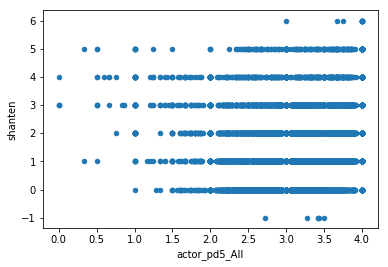

In [45]:
dfDiscards.plot(x="actor_pd5_All",y="shanten",kind="scatter")

#### Not a very helpful visualization...

I wanna make the other columns and see if those are more helpful.

In [46]:
# vals = [1,2,3,4,5,6,7,8,9]
# N = 3
# print(vals[-N:])

In [47]:
def ppd5_LastN(df,col,N):
    vals = df.copy()[col].values
    nuValz = []
    for i in range(len(vals)):
        nuValz.append(np.mean(vals[i][-N:]))
    return nuValz

#### So what values of N are going to be helpful here... not 1, because looking at someone's last tile they discarded isn't all that helpful. The last 2 aren't great either...

#### Whoa... maybe I could use some kind of weighting system that favors more recent tiles and use /all/ the tiles...

#### Well for now, I'm just going to make these 3,4,5,6, and 7 last tile columns and see what happens.

In [48]:
enlist = [3,4,5,6,7]

In [49]:
for i in range(len(enlist)):
    someColName = "actor_pd5_" + str(enlist[i])
    dfDiscards[someColName] = ppd5_LastN(dfDiscards,"actorPondDist5",enlist[i])

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
dfDiscards[["shanten","actor_pd5_All"]].groupby("shanten").mean()

actor_pd5_All
shanten               
-1            3.294382
 0            3.000876
 1            3.224546
 2            3.462172
 3            3.629512
 4            3.663540
 5            3.553207
 6            3.868056

#### Much better, yeah this shows how as you approach 0 shanten (1 away from winning), you generally discard more middleton tiles.

In [51]:
dfDiscards[["shanten","actor_pd5_3"]].groupby("shanten").mean()

actor_pd5_3
shanten             
-1          3.000000
 0          2.633990
 1          2.937062
 2          3.285582
 3          3.549844
 4          3.623522
 5          3.441851
 6          3.833333

In [52]:
dfDiscards[["shanten","actor_pd5_4"]].groupby("shanten").mean()

actor_pd5_4
shanten             
-1          2.875000
 0          2.670934
 1          2.979359
 2          3.331305
 3          3.567077
 4          3.636443
 5          3.468673
 6          3.833333

In [53]:
dfDiscards[["shanten","actor_pd5_5"]].groupby("shanten").mean()

actor_pd5_5
shanten             
-1          2.933333
 0          2.709222
 1          3.024680
 2          3.364169
 3          3.584746
 4          3.640845
 5          3.483170
 6          3.845833

In [54]:
dfDiscards[["shanten","actor_pd5_6"]].groupby("shanten").mean()

actor_pd5_6
shanten             
-1          3.055556
 0          2.747586
 1          3.065208
 2          3.390139
 3          3.596511
 4          3.646211
 5          3.500860
 6          3.854167

In [55]:
dfDiscards[["shanten","actor_pd5_7"]].groupby("shanten").mean()

actor_pd5_7
shanten             
-1          2.976190
 0          2.785465
 1          3.101252
 2          3.410010
 3          3.604674
 4          3.649747
 5          3.516245
 6          3.860119

### Okay so a clear trend, regardless of the metric we use, although looking at somewhere from the last 3 to 7 rather than all seems to be better at differentiating.  Seems like the average tenpai hand has something like 2.6-2.7 average distance from the 5-tile.

### So now we have to look at the distribution of those averages at tenpai.

(array([   1.,    0.,    0.,    0.,    0.,    7.,    0.,    0.,   13.,
           0.,    0.,   28.,    0.,   41.,    0.,    3.,   81.,    1.,
           3.,  135.,    0.,    0.,  230.,    0.,    0.,  284.,    3.,
         340.,    0.,    2.,  434.,    2.,    6.,  400.,    0.,    0.,
         372.,    0.,  325.,    7.,    5.,  249.,    0.,    9.,  161.,
           4.,    2.,  100.,    0.,   52.]),
 array([ 0.4  ,  0.472,  0.544,  0.616,  0.688,  0.76 ,  0.832,  0.904,
         0.976,  1.048,  1.12 ,  1.192,  1.264,  1.336,  1.408,  1.48 ,
         1.552,  1.624,  1.696,  1.768,  1.84 ,  1.912,  1.984,  2.056,
         2.128,  2.2  ,  2.272,  2.344,  2.416,  2.488,  2.56 ,  2.632,
         2.704,  2.776,  2.848,  2.92 ,  2.992,  3.064,  3.136,  3.208,
         3.28 ,  3.352,  3.424,  3.496,  3.568,  3.64 ,  3.712,  3.784,
         3.856,  3.928,  4.   ]),
 <a list of 50 Patch objects>)

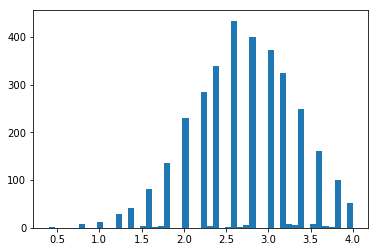

In [56]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==0]["actor_pd5_5"],bins=50)

(array([   1.,    0.,    1.,    2.,    0.,    0.,    4.,    0.,    0.,
          16.,    0.,   24.,    1.,    1.,   27.,    6.,    0.,   63.,
           6.,    1.,  138.,    0.,  199.,    0.,    0.,  268.,   10.,
           6.,  375.,   24.,  447.,   11.,   26.,  578.,    0.,    0.,
         706.,    0.,    0.,  704.,   38.,  604.,    0.,   75.,  488.,
          37.,   64.,  385.,    0.,  413.]),
 array([ 0.33333333,  0.40666667,  0.48      ,  0.55333333,  0.62666667,
         0.7       ,  0.77333333,  0.84666667,  0.92      ,  0.99333333,
         1.06666667,  1.14      ,  1.21333333,  1.28666667,  1.36      ,
         1.43333333,  1.50666667,  1.58      ,  1.65333333,  1.72666667,
         1.8       ,  1.87333333,  1.94666667,  2.02      ,  2.09333333,
         2.16666667,  2.24      ,  2.31333333,  2.38666667,  2.46      ,
         2.53333333,  2.60666667,  2.68      ,  2.75333333,  2.82666667,
         2.9       ,  2.97333333,  3.04666667,  3.12      ,  3.19333333,
         3.26666

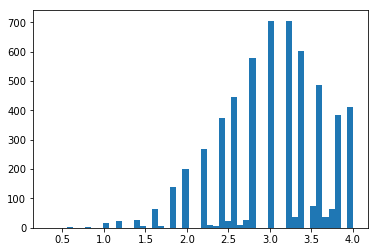

In [57]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==1]["actor_pd5_5"],bins=50)

(array([  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.40000000e+01,
          0.00000000e+00,   0.00000000e+00,   8.00000000e+00,
          1.00000000e+00,   2.10000000e+01,   0.00000000e+00,
          5.00000000e+00,   5.20000000e+01,   5.00000000e+00,
          5.00000000e+00,   7.20000000e+01,   0.00000000e+00,
          0.00000000e+00,   1.32000000e+02,   0.00000000e+00,
          0.00000000e+00,   1.40000000e+02,   1.80000000e+01,
          2.02000000e+02,   0.00000000e+00,   4.80000000e+01,
          2.55000000e+02,   3.40000000e+01,   4.30000000e+01,
          3.69000000e+02,   0.00000000e+00,   0.00000000e+00,
          5.38000000e+02,   0.00000000e+00,   4.56000000e+02,
          7.10000000e+01,   6.20000000e+01,   5.28000000e+02,
          0.00000000e+00,   1.76000000e+02,   5.13000000e+02,
          1.31000000e+02,   1.65000000e+02,   5.30000000e+02,
        

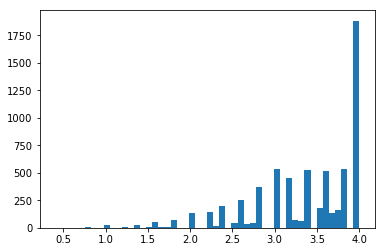

In [58]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==2]["actor_pd5_5"],bins=50)

(array([  3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.40000000e+01,   0.00000000e+00,   0.00000000e+00,
          1.10000000e+01,   3.00000000e+00,   1.00000000e+01,
          7.00000000e+00,   0.00000000e+00,   2.00000000e+01,
          5.00000000e+00,   3.60000000e+01,   0.00000000e+00,
          0.00000000e+00,   7.50000000e+01,   0.00000000e+00,
          6.30000000e+01,   8.00000000e+00,   1.10000000e+01,
          8.70000000e+01,   3.00000000e+01,   9.60000000e+01,
          1.90000000e+01,   1.00000000e+02,   0.00000000e+00,
          0.00000000e+00,   2.14000000e+02,   0.00000000e+00,
          0.00000000e+00,   1.63000000e+02,   3.00000000e+01,
          1.79000000e+02,   1.29000000e+02,   0.00000000e+00,
          3.14000000e+02,   8.80000000e+01,   1.86000000e+02,
        

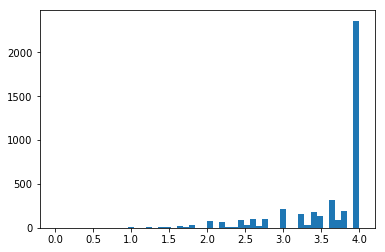

In [59]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==3]["actor_pd5_5"],bins=50)

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.50000000e+01,   0.00000000e+00,   0.00000000e+00,
          5.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   1.40000000e+01,
          1.00000000e+00,   1.00000000e+01,   0.00000000e+00,
          0.00000000e+00,   2.60000000e+01,   0.00000000e+00,
          1.70000000e+01,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+01,   4.00000000e+00,   2.20000000e+01,
          2.00000000e+00,   3.30000000e+01,   0.00000000e+00,
          0.00000000e+00,   7.10000000e+01,   0.00000000e+00,
          0.00000000e+00,   3.20000000e+01,   1.00000000e+01,
          4.60000000e+01,   3.40000000e+01,   0.00000000e+00,
          4.80000000e+01,   1.60000000e+01,   3.40000000e+01,
        

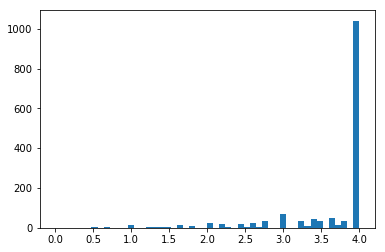

In [60]:
plt.hist(dfDiscards[["shanten","actor_pd5_5"]][dfDiscards["shanten"]==4]["actor_pd5_5"],bins=50)

#### Okay so around 0 shanten (tenpai) and 1 shanten, it's hard to tell, but this metric is /REALLY/ good at figuring out if it's further away.  Once it hits 2 shanten, the average is way higher.  Maybe we only care if they're pretty close? We'll see.


#### So yeah I'm still not sure how exactly to structure the target, and this will be an ongoing play-it-by-ear type thing where I'm seeing how much information I can even get, how sure I can even be about whether someone is 0 shanten... but yeah regardless, this feature is good.

#### Oh and I think the next thing I should do is make a feature that looks at open meld count, because that's a dead giveaway in certain circumstances.

#### If someone has 4 open melds, they are /by definition/ in tenpai, if they have 3 open, very likely tenpai, 2, idk but maybe, 1, who knows... maybe if it's late in hand idk, 0, no idea.

So yeah I'm going to create that column now (actorOpenMeldCount)

In [61]:
example = [22, 23, 23, 23, 23, 24, 46, 47, 48] #a tough example to break it (where the answer is 3 melds:)
#[22,23,24],[23,23,23],[46,47,48]

harderExample = [21, 21, 21, 22, 23, 24, 25, 25, 25, 25, 26, 27] 

def meldCounter(daList):
    #print("daList",daList)
    lisk = daList[:]
    meldCount = 0
    setLisk = set(lisk)
    kanCount = 0
    for i in setLisk:
        if lisk.count(i) == 4:
            kanCount += 1
    if kanCount == 0:
        return (len(lisk)/3)
    elif len(lisk) < 3:
        return 0
    elif len(lisk) < 6:
        return 1
    elif len(lisk) < 9:
        return 2
    elif len(lisk) < 12:
        return 3
    elif len(lisk) == 12 and kanCount == 3:
        return 3
    elif len(lisk) == 12 and kanCount != 3:
        return 4
    else:
        '''Just leaving the old function here because I kinda like it.'''
        try:
            while len(lisk) != 0:
                meldCountStart = meldCount
                while len(lisk) != 0:
                    #print("in first while")
                    if lisk[0] in lisk and (lisk[0]+1) in lisk and (lisk[0]+2) in lisk:
                        #print("in first if")
                        meldCount += 1
                        lisk.remove(lisk[0]+1)
                        lisk.remove(lisk[0]+2)
                        lisk.remove(lisk[0])
                        #print("lisk",lisk)
                    else:
                        break
                while len(lisk) != 0: 
                    #print("in second while")
                    if lisk.count(lisk[0]) == 3 or lisk.count(lisk[0]) == 4:
                        #print("in second if")
                        meldCount += 1
                        lisk = [i for i in lisk if i != lisk[0]]
                        #print("lisk",lisk)
                    else:
                        break
                if meldCountStart == meldCount:
                    break
            if len(lisk) != 0:
                return "ERROR WITH OPENS"
            else:
                return meldCount
        except:
            return "ERROR WITH OPENS"
        
print(meldCounter(harderExample))

4


In [62]:
def oMFoT(df, col):
    '''open melds from open tiles'''
    vals = df[col].copy().values
    for i in range(len(vals)):
        vals[i] = meldCounter(vals[i])
    return vals

In [63]:
dfDiscards["actorOpenMeldCount"] = oMFoT(dfDiscards,"actorOpenTiles")

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
dfDiscards["actorOpenMeldCount"].value_counts()

0    17377
1     2989
2     1226
3      166
Name: actorOpenMeldCount, dtype: int64

#### I'm actually kind of shocked that in 45 games there were literally no 4-opens.  Thinking about it though, this is probably because very good players /almost never/ 4-open, and they LOVE to not open at all.

In [65]:
dfDiscards.groupby("lobby").count()

gameLogID  moveType  unconvertedTile  convertedTile  discDrawn  \
lobby                                                                   
houou      21758     21758            21758          21758      21758   

       handNumber  moveNumber  roundWind  roundNumber  bonusSticks  \
lobby                                                                
houou       21758       21758      21758        21758        21758   

              ...          shantenEngineeringColumn  shanten  actorPondDist5  \
lobby         ...                                                              
houou         ...                             21758    21758           21758   

       actor_pd5_All  actor_pd5_3  actor_pd5_4  actor_pd5_5  actor_pd5_6  \
lobby                                                                      
houou          21758        21758        21758        21758        21758   

       actor_pd5_7  actorOpenMeldCount  
lobby                                   
houou        21758               21758  

[1 rows x 69 columns]

#### Yeah the vast majority of these 45 games I'm using for some basic EDA are at least upperdan (where I would play) and mostly houou (where the top players play), and honestly main lobby players are probably the only people who semi-consistently 4-open, although I'll be sure to verify that later.

#### Anyhow, yeah -- looks like people don't usually open:

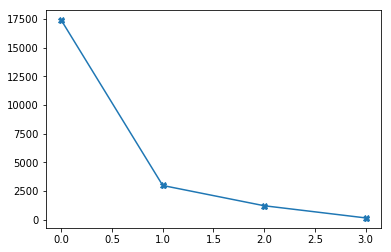

In [66]:
plt.plot(dfDiscards["actorOpenMeldCount"].value_counts(),marker="X")

In [67]:
dfDiscards[["shanten","actorOpenMeldCount"]].groupby("actorOpenMeldCount").mean()

shanten
actorOpenMeldCount          
0                   2.018070
1                   1.228170
2                   0.769168
3                   0.301205

#### If that isn't a trend I don't know what is.

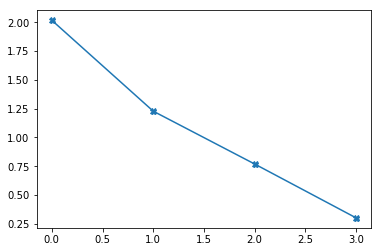

In [68]:
plt.plot(dfDiscards[["shanten","actorOpenMeldCount"]].groupby("actorOpenMeldCount").mean(),marker="X")

#### Similar in many ways to the former graph, although notably different at 1 open meld and what that means on average.

### So there's a lot of things I could look at that don't require engineering.  I just really wanted to finish those engineering ones up because they're harder.

#### Let's take a look at how score affects average shanten.

In [69]:
len(set(dfDiscards["actorScore"].values))

192

#### Eh, 193 hands... (I'm not using all the data right now idk I want these processes to be fast) this isn't a super large number... but the shanten will vary a lot so let's take a look anyways:

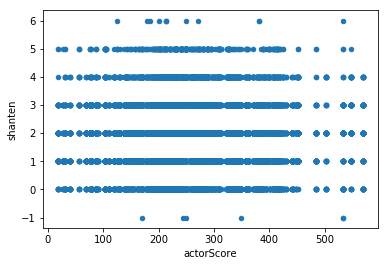

In [70]:
dfDiscards.plot(x="actorScore",y="shanten",kind="scatter")

#### All this seems to inform me of is that the few (11) times people turned down a winning hand, it was because their score wasn't off the charts, and so maybe they wanted more.

#### Other than that this graph is useless.

In [71]:
dfDiscards[["shanten","actorScore"]][dfDiscards["shanten"] == -1]

shanten  actorScore
143         -1         250
2205        -1         533
2241        -1         533
10234       -1         171
27611       -1         245
28601       -1         348

In [72]:
np.mean(dfDiscards[["shanten","actorScore"]][dfDiscards["shanten"] == -1]["actorScore"])

346.6666666666667

#### The starting score in Mahjong is 25000 pts, expressed here and in the original .mjlog files provided by tenhou.net as 250, because there is never a case where you interact with point sticks less than 100 in value, rendering the last two 0s in the conventional scoring redundant.

#### Aren't pennies inefficient to mass produce or something?  Are we ever going to make a move on that?

#### Anyways yeah these are lower scores, meaning they might have been seeking higher value for their hand, although I'm not entirely sure.

In [73]:
dfDiscards[["shanten","actorScore"]].groupby("shanten").mean()

actorScore
shanten            
-1       346.666667
 0       258.815455
 1       260.335711
 2       262.216882
 3       259.759953
 4       267.064389
 5       253.520885
 6       262.250000

## <font color=green>Alright so not the most complete EDA, but definitely some useful stuff here.  I need to do much more.  I'm tired and I'm gonna stop it here for now, and in the morning I'll get this together in the way necessary and send it over.</font>

### So I have returned and now I want to take the bits that I have and see how well models are able to predict shanten.  Maybe we bucket the shanten into [0 and 1 shanten] vs [other shanten] and we just ignore the -1 outliers.

In [74]:
dfDiscards.columns.values

array(['gameLogID', 'lobby', 'moveType', 'unconvertedTile',
       'convertedTile', 'discDrawn', 'handNumber', 'moveNumber',
       'roundWind', 'roundNumber', 'bonusSticks',
       'unconvertedDoraIndicator', 'convertedDoraIndicator',
       'convertedDora', 'actorWind', 'actorRating', 'rightRating',
       'acrossRating', 'leftRating', 'actorRank', 'rightRank',
       'acrossRank', 'leftRank', 'actorScore', 'rightScore', 'acrossScore',
       'leftScore', 'actorHandConverted', 'actorHandUnconverted',
       'rightHandConverted', 'rightHandUnconverted', 'acrossHandConverted',
       'acrossHandUnconverted', 'leftHandConverted', 'leftHandUnconverted',
       'actorUnconvertedPond', 'actorConvertedPond',
       'rightUnconvertedPond', 'rightConvertedPond',
       'acrossUnconvertedPond', 'acrossConvertedPond',
       'leftUnconvertedPond', 'leftConvertedPond', 'actorReachStatus',
       'rightReachStatus', 'acrossReachStatus', 'leftReachStatus',
       'actorIsOpen', 'rightIsOpen', 'acr

In [75]:
X = dfDiscards[['actor_pd5_5','actorOpenMeldCount','moveNumber','handNumber']]
y = dfDiscards["shanten"]

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [78]:
dtc = DecisionTreeClassifier()

In [79]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(dtc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.34771335097
0.00782874497094
[ 0.36090686  0.34865196  0.3471201   0.33650015  0.34538768]


In [80]:
dfDiscards["shanten"].value_counts()

 2    6492
 1    5749
 3    4270
 0    3300
 4    1522
 5     407
 6      12
-1       6
Name: shanten, dtype: int64

In [81]:
print("baseline",6043./(6043+5519+3964+2848+1295+282+11+9))
print("basic dtc",np.mean(scores))

('baseline', 0.30258875369285465)
('basic dtc', 0.34771335097017664)


In [82]:
rfc = RandomForestClassifier()

In [83]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.36548511835
0.00643571579604
[ 0.37101716  0.36519608  0.37408088  0.35672694  0.36040454]


In [84]:
from sklearn.grid_search import GridSearchCV

/home/tpeach/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/tpeach/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [85]:
# paramz = {
#     "n_estimators":[5,11,15,21,51,101],
#     "max_depth":[3,5,7,9,None]
# }

# gscv = GridSearchCV(rfc,paramz)
# bestForest = gscv.fit(X_train,y_train)
# bestForest.best_params_

In [86]:
# kf = KFold(n_splits=5,shuffle=True,random_state=42)
# scores = cross_val_score(bestForest.best_estimator_,X_train,y_train,cv=kf)
# print(np.mean(scores))
# print(np.std(scores))
# print(scores)

In [87]:
#preds = bestForest.best_estimator_.predict(X_test)

In [88]:
type(y_test.values)

numpy.ndarray

### Random forests are really good o_o.

In [89]:
# def averageDifference(y_true,y_pred):
#     movingSum = 0
#     n = len(y_true)
#     for i in range(len(y_true)):
#         movingSum += abs(y_true[i] - y_pred[i])
#     return float(movingSum)/n

In [90]:
# print(averageDifference(y_test.values,preds))

### So on average it isn't off by much.  It's not guessing randomly.

In [91]:
# nuDf = pd.DataFrame()

In [92]:
# nuDf["preds"] = preds

In [93]:
# nuDf["preds"].value_counts()

In [94]:
y_test.value_counts()

 2    1613
 1    1428
 3    1087
 0     844
 4     368
 5      97
-1       2
 6       1
Name: shanten, dtype: int64

### I wanna convert the shanten column to "tenpai" and "not tenpai"

In [95]:
dfDiscards["shanten"]

1        2
3        3
5        3
7        5
9        2
11       2
13       3
15       3
17       2
19       3
21       2
23       3
25       2
27       3
29       2
31       3
33       2
35       3
37       2
39       2
41       1
43       2
45       2
47       1
49       1
51       2
53       2
55       1
57       1
59       2
        ..
44007    0
44009    2
44011    1
44013    2
44015    0
44017    2
44019    1
44021    2
44023    0
44025    1
44027    1
44029    2
44031    0
44033    1
44035    2
44037    1
44039    0
44041    0
44043    2
44045    2
44047    0
44049    0
44051    2
44053    2
44055    0
44057    1
44059    2
44061    2
44063    0
44066    0
Name: shanten, Length: 21758, dtype: int64

In [96]:
vvv = dfDiscards["shanten"].copy().values
for i in range(len(vvv)):
    if vvv[i] == 0 or vvv[i] == -1:
        vvv[i] = 1
    else:
        vvv[i] = 0
dfDiscards["isTenpai"] = vvv

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [97]:
dfDiscards["isTenpai"].value_counts()

0    18452
1     3306
Name: isTenpai, dtype: int64

In [98]:
print("baseline",17112./(17112+2859))

('baseline', 0.8568424215111913)


In [99]:
rfc = RandomForestClassifier()

In [100]:
X = dfDiscards[['actor_pd5_5','actorOpenMeldCount','moveNumber','handNumber']]
y = dfDiscards["isTenpai"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [101]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [102]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.833434887899
0.00520255069476
[ 0.83180147  0.84252451  0.83547794  0.82807233  0.82929819]


In [103]:
# paramz = {
#     "n_estimators":[5,11,15,21,51,101],
#     "max_depth":[3,5,7,9,None]
# }

# gscv = GridSearchCV(rfc,paramz)
# bestForest = gscv.fit(X_train,y_train)

In [104]:
# kf = KFold(n_splits=5,shuffle=True,random_state=42)
# scores = cross_val_score(bestForest.best_estimator_,X_train,y_train,cv=kf)
# print(np.mean(scores))
# print(np.std(scores))
# print(scores)

In [105]:
# bestForest.best_estimator_.feature_importances_

In [106]:
# bestForest.best_params_

### So this is overwhelmingly saying "how late it is in the hand is very important."

### This means I should probably just use how many discards a person has made, because that is what is actually contributing to this.

In [107]:
#dfDiscards["actorPondCount"].value_counts()

In [108]:
#dfDiscards.groupby("actorPondCount")

In [109]:
dfDiscards.head(20)

gameLogID  lobby moveType  unconvertedTile  \
1   2016082221gm-00a9-0000-ebc65731  houou  discard              134   
3   2016082221gm-00a9-0000-ebc65731  houou  discard               33   
5   2016082221gm-00a9-0000-ebc65731  houou  discard                1   
7   2016082221gm-00a9-0000-ebc65731  houou  discard              101   
9   2016082221gm-00a9-0000-ebc65731  houou  discard              118   
11  2016082221gm-00a9-0000-ebc65731  houou  discard              125   
13  2016082221gm-00a9-0000-ebc65731  houou  discard              127   
15  2016082221gm-00a9-0000-ebc65731  houou  discard              124   
17  2016082221gm-00a9-0000-ebc65731  houou  discard               22   
19  2016082221gm-00a9-0000-ebc65731  houou  discard              130   
21  2016082221gm-00a9-0000-ebc65731  houou  discard              131   
23  2016082221gm-00a9-0000-ebc65731  houou  discard              129   
25  2016082221gm-00a9-0000-ebc65731  houou  discard               65   
27  2016082221gm-00a9-0000-ebc65731  houou  discard               72   
29  2016082221gm-00a9-0000-ebc65731  houou  discard              120   
31  2016082221gm-00a9-0000-ebc65731  houou  discard              122   
33  2016082221gm-00a9-0000-ebc65731  houou  discard               68   
35  2016082221gm-00a9-0000-ebc65731  houou  discard               56   
37  2016082221gm-00a9-0000-ebc65731  houou  discard              121   
39  2016082221gm-00a9-0000-ebc65731  houou  discard              112   

    convertedTile        discDrawn  handNumber  moveNumber roundWind  \
1             120              [0]           1           2      east   
3               9              [0]           1           4      east   
5               1              [1]           1           6      east   
7              48              [0]           1           8      east   
9              80           [0, 1]           1          10      east   
11            100           [0, 0]           1          12      east   
13            100           [1, 0]           1          14      east   
15            100           [0, 0]           1          16      east   
17              6        [0, 1, 1]           1          18      east   
19            110        [0, 0, 0]           1          20      east   
21            110        [1, 0, 0]           1          22      east   
23            110        [0, 0, 0]           1          24      east   
25             28     [0, 1, 1, 0]           1          26      east   
27             41     [0, 0, 0, 1]           1          28      east   
29             90     [1, 0, 0, 1]           1          30      east   
31             90     [0, 0, 0, 0]           1          32      east   
33             29  [0, 1, 1, 0, 0]           1          34      east   
35             26  [0, 0, 0, 1, 0]           1          36      east   
37             90  [1, 0, 0, 1, 1]           1          38      east   
39             70  [0, 0, 0, 0, 0]           1          40      east   

    roundNumber    ...     shanten   actorPondDist5 actor_pd5_All actor_pd5_3  \
1             1    ...           2              [4]      4.000000    4.000000   
3             1    ...           3              [4]      4.000000    4.000000   
5             1    ...           3              [4]      4.000000    4.000000   
7             1    ...           5              [3]      3.000000    3.000000   
9             1    ...           2           [4, 4]      4.000000    4.000000   
11            1    ...           2           [4, 4]      4.000000    4.000000   
13            1    ...           3           [4, 4]      4.000000    4.000000   
15            1    ...           3           [3, 4]      3.500000    3.500000   
17            1    ...           2        [4, 4, 1]      3.000000    3.000000   
19            1    ...           3        [4, 4, 4]      4.000000    4.000000   
21            1    ...           2        [4, 4, 4]      4.000000    4.000000   
23            1    ...      

In [110]:
dfDiscards.groupby("shanten").mean()["actorPondCount"]

shanten
-1    15.166667
 0    10.789091
 1     8.637850
 2     6.337954
 3     4.435597
 4     3.237845
 5     4.257985
 6     3.666667
Name: actorPondCount, dtype: float64

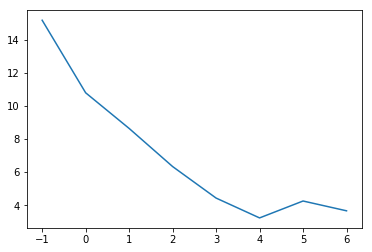

In [111]:
plt.plot(dfDiscards.groupby("shanten").mean()["actorPondCount"])

In [112]:
X = dfDiscards[['actor_pd5_5','actorOpenMeldCount',"actorPondCount"]]
y = dfDiscards["isTenpai"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.846120082265
0.00576087620515
[ 0.8471201   0.84895833  0.85477941  0.83849219  0.84125038]


In [113]:
# paramz = {
#     "n_estimators":[5,11,15,21,51,101],
#     "max_depth":[3,5,7,9,None]
# }

# gscv = GridSearchCV(rfc,paramz)
# bestForest = gscv.fit(X_train,y_train)

In [114]:
# kf = KFold(n_splits=5,shuffle=True,random_state=42)
# scores = cross_val_score(gscv.best_estimator_,X_train,y_train,cv=kf)
# print(np.mean(scores))
# print(np.std(scores))
# print(scores)

In [115]:
#gscv.best_params_

In [116]:
#gscv.best_estimator_.feature_importances_

In [117]:
#dfDiscards[['actor_pd5_5','actorOpenMeldCount',"actorPondCount","shanten"]].corr()

In [118]:
#dfDiscards.info()

actorOpenMeldCount was object somehow

In [119]:
dfDiscards['actorOpenMeldCount'] = dfDiscards['actorOpenMeldCount'].astype(int)

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
#dfDiscards.info()

In [121]:
dfDiscards[['actor_pd5_5','actorOpenMeldCount',"actorPondCount"]].corr()

actor_pd5_5  actorOpenMeldCount  actorPondCount
actor_pd5_5            1.000000           -0.241394       -0.452080
actorOpenMeldCount    -0.241394            1.000000        0.288839
actorPondCount        -0.452080            0.288839        1.000000

In [122]:
from sklearn.decomposition import PCA

In [123]:
pca = PCA(n_components=3)

In [124]:
X = dfDiscards[['actor_pd5_5','actorOpenMeldCount',"actorPondCount"]]
y = dfDiscards["isTenpai"]

In [125]:
X = pca.fit_transform(X)

In [126]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [127]:
# paramz = {
#     "n_estimators":[5,11,15,21,51,101],
#     "max_depth":[3,5,7,9,None]
# }

# gscv = GridSearchCV(rfc,paramz)
# bestForest = gscv.fit(X_train,y_train)

In [128]:
# kf = KFold(n_splits=5,shuffle=True,random_state=42)
# scores = cross_val_score(bestForest.best_estimator_,X_train,y_train,cv=kf)
# print(np.mean(scores))
# print(np.std(scores))
# print(scores)

### No difference as a result of pca (colinearity reduction.) because RandomForests don't care about that. Oops.

In [129]:
dfDiscards.groupby("actorPondCount").mean()["shanten"]

actorPondCount
0     3.250000
1     3.182967
2     2.831155
3     2.502415
4     2.209027
5     1.960331
6     1.754978
7     1.585366
8     1.423960
9     1.287404
10    1.181461
11    1.075489
12    1.050223
13    1.008032
14    0.985318
15    0.976238
16    1.038186
17    1.059925
18    1.013333
19    0.911765
20    0.000000
Name: shanten, dtype: float64

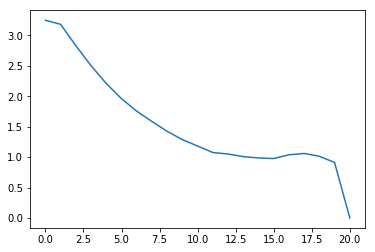

In [130]:
plt.plot(dfDiscards.groupby("actorPondCount").mean()["shanten"])

In [131]:
dfDiscards.columns

Index([u'gameLogID', u'lobby', u'moveType', u'unconvertedTile',
       u'convertedTile', u'discDrawn', u'handNumber', u'moveNumber',
       u'roundWind', u'roundNumber', u'bonusSticks',
       u'unconvertedDoraIndicator', u'convertedDoraIndicator',
       u'convertedDora', u'actorWind', u'actorRating', u'rightRating',
       u'acrossRating', u'leftRating', u'actorRank', u'rightRank',
       u'acrossRank', u'leftRank', u'actorScore', u'rightScore',
       u'acrossScore', u'leftScore', u'actorHandConverted',
       u'actorHandUnconverted', u'rightHandConverted', u'rightHandUnconverted',
       u'acrossHandConverted', u'acrossHandUnconverted', u'leftHandConverted',
       u'leftHandUnconverted', u'actorUnconvertedPond', u'actorConvertedPond',
       u'rightUnconvertedPond', u'rightConvertedPond',
       u'acrossUnconvertedPond', u'acrossConvertedPond',
       u'leftUnconvertedPond', u'leftConvertedPond', u'actorReachStatus',
       u'rightReachStatus', u'acrossReachStatus', u'leftReachSta

In [132]:
noReachDf = dfDiscards[dfDiscards['actorReachStatus']==0][dfDiscards['leftReachStatus']==0][dfDiscards['rightReachStatus']==0][dfDiscards['acrossReachStatus']==0]

/home/tpeach/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [133]:
#len(dfDiscards)

In [134]:
noReachDf.groupby("actorPondCount").mean()["shanten"]

actorPondCount
0     3.250000
1     3.189950
2     2.843854
3     2.524390
4     2.246180
5     2.011467
6     1.811650
7     1.657738
8     1.493392
9     1.400000
10    1.260931
11    1.160000
12    1.110831
13    0.981595
14    0.880478
15    0.883249
16    0.980132
17    0.887850
18    0.933333
19    1.000000
20    0.000000
Name: shanten, dtype: float64

In [135]:
noReachDf.groupby("shanten").mean()["actor_pd5_5"]

shanten
-1    2.880000
 0    2.735210
 1    3.042729
 2    3.425899
 3    3.656272
 4    3.680622
 5    3.505599
 6    3.886364
Name: actor_pd5_5, dtype: float64

# 3 very important thoughts:

### 1) From seeing the EDA, and then reflecting about my own experience and knowledge of mahjong, it seems that all you can know is that someone is /close/ (1 away or 2 away) You can't really know if they're 1 away.  At least with this data.

### 2) Relating to resolving this, I want to collect the data about "Are they throwing away what they just drew" -- and I really particularly would like to study this for weaker players because I believe there would be a difference, where at the high levels I feel like they would hide this.  I mean I know enough to hide it by throwing a tile from inside my hand rather than the one I just drew if I have the option.

### 3) We do not have the data on how quickly people are getting rid of a tile after they draw.  I feel like the quicker someone is discarding, especially when they are also getting rid of mostly things they draw, the closer they are.

## okay so I just retrieved the "did he just discard what he drew" column

In [136]:
dfDiscards.columns

Index([u'gameLogID', u'lobby', u'moveType', u'unconvertedTile',
       u'convertedTile', u'discDrawn', u'handNumber', u'moveNumber',
       u'roundWind', u'roundNumber', u'bonusSticks',
       u'unconvertedDoraIndicator', u'convertedDoraIndicator',
       u'convertedDora', u'actorWind', u'actorRating', u'rightRating',
       u'acrossRating', u'leftRating', u'actorRank', u'rightRank',
       u'acrossRank', u'leftRank', u'actorScore', u'rightScore',
       u'acrossScore', u'leftScore', u'actorHandConverted',
       u'actorHandUnconverted', u'rightHandConverted', u'rightHandUnconverted',
       u'acrossHandConverted', u'acrossHandUnconverted', u'leftHandConverted',
       u'leftHandUnconverted', u'actorUnconvertedPond', u'actorConvertedPond',
       u'rightUnconvertedPond', u'rightConvertedPond',
       u'acrossUnconvertedPond', u'acrossConvertedPond',
       u'leftUnconvertedPond', u'leftConvertedPond', u'actorReachStatus',
       u'rightReachStatus', u'acrossReachStatus', u'leftReachSta

In [137]:
#noReachDf.columns

In [138]:
#noReachDf.groupby("discardedTheDraw").mean()["shanten"]

In [139]:
noReachDf.groupby("whosTurn").mean()["shanten"]

whosTurn
0    2.037645
1    2.031853
2    2.088921
3    2.010184
Name: shanten, dtype: float64

In [140]:
#noReachDf[["actorScore","leftScore",'acrossScore','rightScore']].tail(20)
# Score column doesn't work right now apparently. Oh well.

In [141]:
#noReachDf.groupby(["handNumber","whosTurn"]).mean()["shanten"]

In [142]:
#noReachDf[noReachDf["whosTurn"]==0]

In [143]:
#noReachDf[['gameLogID','handNumber','whosTurn', 'discardedTheDraw']].head()

In [144]:
#noReachDf[noReachDf["whosTurn"]==0].head() #so this is one person's progression through each entire game.

### added list of 0s and 1s for discards, where 0 if player did not discard what was drawn, and 1 is did discard drawn

In [145]:
noReachDf["discDrawn"].values[0]

'[0]'

In [146]:
valx = noReachDf["discDrawn"].copy().values

for i in range(len(valx)):
    valx[i] = valx[i].split("[")[1].split("]")[0].split(",")
    for j in range(len(valx[i])):
        valx[i][j] = int(valx[i][j])

noReachDf["discDrawn"] = valx

In [147]:
type(noReachDf["discDrawn"].values[0][0])

int

In [148]:
noReachDf.head()

gameLogID  lobby moveType  unconvertedTile  \
1  2016082221gm-00a9-0000-ebc65731  houou  discard              134   
3  2016082221gm-00a9-0000-ebc65731  houou  discard               33   
5  2016082221gm-00a9-0000-ebc65731  houou  discard                1   
7  2016082221gm-00a9-0000-ebc65731  houou  discard              101   
9  2016082221gm-00a9-0000-ebc65731  houou  discard              118   

   convertedTile discDrawn  handNumber  moveNumber roundWind  roundNumber  \
1            120       [0]           1           2      east            1   
3              9       [0]           1           4      east            1   
5              1       [1]           1           6      east            1   
7             48       [0]           1           8      east            1   
9             80    [0, 1]           1          10      east            1   

     ...     shanten actorPondDist5 actor_pd5_All actor_pd5_3  actor_pd5_4  \
1    ...           2            [4]           4.0         4.0          4.0   
3    ...           3            [4]           4.0         4.0          4.0   
5    ...           3            [4]           4.0         4.0          4.0   
7    ...           5            [3]           3.0         3.0          3.0   
9    ...           2         [4, 4]           4.0         4.0          4.0   

   actor_pd5_5  actor_pd5_6  actor_pd5_7  actorOpenMeldCount  isTenpai  
1          4.0          4.0          4.0                   0         0  
3          4.0          4.0          4.0                   0         0  
5          4.0          4.0          4.0                   0         0  
7          3.0          3.0          3.0                   0         0  
9          4.0          4.0          4.0                   0         0  

[5 rows x 71 columns]

In [149]:
def averageDiscDrawCols(df,n):
    '''makes columns for average of 0 or 1 where they represent whether or not someone discarded the tile they drew.'''
    valx = 0
    valx = noReachDf["discDrawn"].copy().values
    for i in range(len(valx)):
        #print(valx[i])
        valx[i] = sum(valx[i][-n::])/float(n)
        #print(valx[i])
    return valx
        

In [150]:

for i in range(3,8):
    colString = "avgDDL" + str(i)
    noReachDf[colString] = averageDiscDrawCols(noReachDf,i)

In [151]:
for i in range(3,8):
    colString = "avgDDL" + str(i)
    noReachDf[colString] = noReachDf[colString].astype(float)

In [152]:
noReachDf["avgDDAll"] = averageDiscDrawCols(noReachDf,40)
noReachDf["avgDDAll"] = noReachDf["avgDDAll"].astype(float)

In [153]:
noReachDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16528 entries, 1 to 44004
Data columns (total 77 columns):
gameLogID                   16528 non-null object
lobby                       16528 non-null object
moveType                    16528 non-null object
unconvertedTile             16528 non-null int64
convertedTile               16528 non-null int64
discDrawn                   16528 non-null object
handNumber                  16528 non-null int64
moveNumber                  16528 non-null int64
roundWind                   16528 non-null object
roundNumber                 16528 non-null int64
bonusSticks                 16528 non-null int64
unconvertedDoraIndicator    16528 non-null object
convertedDoraIndicator      16528 non-null object
convertedDora               16528 non-null object
actorWind                   16528 non-null int64
actorRating                 16528 non-null float64
rightRating                 16528 non-null float64
acrossRating                16528 non-null flo

In [154]:
noReachDf.groupby("shanten").mean()[["avgDDL3","avgDDL4","avgDDL5","avgDDL6","avgDDL7","avgDDAll"]]

avgDDL3   avgDDL4   avgDDL5   avgDDL6   avgDDL7  avgDDAll
shanten                                                            
-1       0.666667  0.650000  0.680000  0.666667  0.628571  0.170000
 0       0.552632  0.532712  0.509795  0.488304  0.465539  0.112427
 1       0.424158  0.397154  0.370918  0.344522  0.318931  0.066324
 2       0.276303  0.250988  0.227367  0.205847  0.186846  0.036448
 3       0.180973  0.157859  0.139485  0.123704  0.110285  0.020990
 4       0.138614  0.120226  0.105375  0.092881  0.083047  0.016566
 5       0.211806  0.188802  0.166667  0.150174  0.136533  0.028060
 6       0.060606  0.068182  0.090909  0.075758  0.064935  0.011364

In [155]:
noReachDf.groupby("isTenpai").mean()[["avgDDL3","avgDDL4","avgDDL5","avgDDL6","avgDDL7","avgDDAll"]]

avgDDL3   avgDDL4   avgDDL5   avgDDL6   avgDDL7  avgDDAll
isTenpai                                                            
0         0.280216  0.255691  0.233507  0.212988  0.194486  0.039047
1         0.553047  0.533139  0.510415  0.488954  0.466133  0.112637

In [156]:
X = noReachDf[['actor_pd5_5','actorOpenMeldCount',"actorPondCount","avgDDL7"]]
y = noReachDf["isTenpai"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
rfc = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.908600014314
0.00350000271436
[ 0.90282258  0.91085115  0.90762404  0.90843082  0.91327148]


In [157]:
noReachDf["isTenpai"].value_counts()

0    15155
1     1373
Name: isTenpai, dtype: int64

In [158]:
print(float(25150)/(25150+1794))

0.933417458432


In [159]:
X = noReachDf[['actor_pd5_5','actorOpenMeldCount',"actorPondCount","avgDDL7"]]
y = noReachDf["shanten"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.4226362412
0.00677460010342
[ 0.42379032  0.4126664   0.4231545   0.41992739  0.4336426 ]


In [160]:
baseGuess = float(noReachDf["shanten"].value_counts()[2])
total = len(noReachDf["shanten"])

baseline = (baseGuess/total)
print(baseline)

0.321454501452


In [161]:
X = noReachDf[['actor_pd5_5','actorOpenMeldCount',"actorPondCount","avgDDL7"]]
y = noReachDf["shanten"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier()

In [162]:
paramz = {
    "n_estimators":[5,11,15,21,51,101],
    "max_depth":[3,5,7,9,None]
}

gscv = GridSearchCV(rfc,paramz)
bestForest = gscv.fit(X_train,y_train)
bestForest.best_params_

{'max_depth': 7, 'n_estimators': 101}

In [163]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(bestForest.best_estimator_,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.45821080951
0.00959919195946
[ 0.47701613  0.44977814  0.45502219  0.4546188   0.4546188 ]


In [164]:
# kf = KFold(n_splits=5,shuffle=True,random_state=42)
# scores = cross_val_score(RandomForestClassifier(n_estimators=501),X_train,y_train,cv=kf)
# print(np.mean(scores))
# print(np.std(scores))
# print(scores)

In [165]:
nineDf = noReachDf[noReachDf["actorPondCount"]==9].copy()

In [166]:
X = nineDf[['actor_pd5_5','actorOpenMeldCount',"actorPondCount","avgDDL7"]]
y = nineDf["shanten"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.449880174292
0.0213412399288
[ 0.47794118  0.43382353  0.41911765  0.46666667  0.45185185]


In [167]:
nineDf["shanten"].value_counts()

1    411
2    244
0    142
3     77
4     18
5     13
Name: shanten, dtype: int64

In [168]:
baseGuess = float(nineDf["shanten"].value_counts()[1])
total = len(nineDf["shanten"])

baseline = (baseGuess/total)
print(baseline)

0.454143646409


below is back to modeling, but wanna try combinations of features

In [169]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7"]]
y = noReachDf["shanten"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.440222058843
0.00448001077858
[ 0.44758065  0.43686971  0.43848326  0.44292053  0.43525615]


In [170]:
baseGuess = float(noReachDf["shanten"].value_counts()[2])
total = len(noReachDf["shanten"])

baseline = (baseGuess/total)
print(baseline)

0.321454501452


In [171]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7",'actorOpenMeldCount']]
y = noReachDf["shanten"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.45288689508
0.00840772687695
[ 0.46693548  0.44372731  0.44534086  0.45663574  0.45179508]


In [172]:
#noReachDf.columns

In [173]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7",'actorOpenMeldCount']]
y = noReachDf["isTenpai"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.922958529063
0.00354492429768
[ 0.92903226  0.91891892  0.92254942  0.92012908  0.92416297]


In [174]:
baseGuess = float(noReachDf["isTenpai"].value_counts()[0])
total = len(noReachDf["isTenpai"])

baseline = (baseGuess/total)
print(baseline)

0.916928848015


In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
ss = StandardScaler()

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7",'actorOpenMeldCount']].values
y = noReachDf["isTenpai"]
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
for i in range(3,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    kf = KFold(n_splits=5,shuffle=True,random_state=42)
    scores = cross_val_score(rfc,X_train,y_train,cv=kf)
    print(np.mean(scores),i)
    #print(np.std(scores))
    #print(scores)

(0.9231198193860688, 3)
(0.92416859685877506, 4)
(0.92223223464196025, 5)
(0.92320039948470378, 6)
(0.9234426602818514, 7)
(0.92295849653216033, 8)
(0.92384611380759674, 9)
(0.92311978685474116, 10)
(0.92352333797446939, 11)
(0.92384591861963072, 12)
(0.92360395060443212, 13)
(0.92255530325703661, 14)
(0.92400733906752208, 15)
(0.92279701102161371, 16)
(0.92441053234264581, 17)
(0.92344243256255765, 18)
(0.92287772124555956, 19)
(0.92287785137087019, 20)
(0.92239372015250676, 21)
(0.92271649598563421, 22)
(0.92328104464599403, 23)
(0.92376517586435747, 24)
(0.92344240003123024, 25)
(0.92263575323036096, 26)
(0.92432982211870041, 27)
(0.92545924475269692, 28)
(0.92303904409946769, 29)
(0.92311985191739654, 30)
(0.9240070788169007, 31)
(0.92303917422477844, 32)
(0.92384578849431997, 33)
(0.92384588608830298, 34)
(0.92295856159481582, 35)
(0.92320049707868657, 36)
(0.92360385301044912, 37)
(0.92352311025517575, 38)
(0.92432985465002793, 39)
(0.92408782157217395, 40)
(0.92441053234264603, 

In [179]:
from sklearn.naive_bayes import BernoulliNB

In [180]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7",'actorOpenMeldCount']].values
y = noReachDf["isTenpai"]
X = ss.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
nb = BernoulliNB()
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.924007306536
0.00358582672541
[ 0.92943548  0.92012908  0.92617991  0.92012908  0.92416297]


### I'm currently thinking that these features are good for differentiating between 1 shanten or closer type hands and hands that are 2 shanten or further, but NOT good for differentiating between tenpai and not tenpai.  I want to formally test this by making a column that splits between 1 shanten or closer and not.

In [181]:
shVals = noReachDf["shanten"].copy().values
for i in range(len(shVals)):
    if shVals[i] < 2:
        shVals[i] = 1
    else:
        shVals[i] = 0
noReachDf["1sh"] = shVals


In [182]:
noReachDf[["1sh","shanten"]].head(20)

1sh  shanten
1     0        2
3     0        3
5     0        3
7     0        5
9     0        2
11    0        2
13    0        3
15    0        3
17    0        2
19    0        3
21    0        2
23    0        3
25    0        2
27    0        3
29    0        2
31    0        3
33    0        2
35    0        3
37    0        2
39    0        2

In [183]:
X = noReachDf[['actor_pd5_5',"actorPondCount","avgDDL7",'actorOpenMeldCount']]
y = noReachDf["1sh"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.785737550261
0.00306090424841
[ 0.78306452  0.78136345  0.78822106  0.7866075   0.78943122]


In [184]:
noReachDf["1sh"].value_counts()

0    10850
1     5678
Name: 1sh, dtype: int64

In [185]:
print(float(18030)/(18030+8914))

0.66916567696


## As I thought.  We saw earlier in the EDA that there was a remarkable difference between hands that were 2 shanten or further from those that were 1 shanten or closer.

## In Mahjong terms, at least using these features, we are saying something like "We can tell if someone is very close to tenpai or is in tenpai, but we can't really be sure whether or not they are actually in tenpai.  As we currently understand it, it is inherently ambiguous whether you are in tenpai or you are two away from tenpai.

### Honestly this makes a ton of sense.  Someone is sitting there throwing this tile and that tile, a lot of which are coming from inside their hand.  You can't see their face, we don't have the data on how long someone it taking to make their moves.  They may look close to tenpai, but we can't be sure.

### I'm going to break for now, but my next focus will be on extracting data regarding hand value (to use for a new y) and seeing if we can predict that based on similar features.

====

### Okay so actually a new problem has arisen that I believe is more important.. that our offense cannot search with depth 2 in a reasonable amount of time, and depth 1 is leading to some blatantly unfavorable decisions like discarding a lone 5 tile rather than a 2, for example.  In some cases this is fine, but in others it isn't.  Depth 2 as far as I have seen always accounts for this.

### Because of this, I'm going to try and train a model using the choices good players make.  In Mahjong there are times when players are aggressive, and times when they are defensive.  I want to see what they discard when they are aggressive and only then so that we have a fast model that makes generally good moves. It is also possible and probably not that costly in terms of time to validate each move and see if it was a moved that made the player further away from completing their hand.  If so, we don't want that move in our training for the aggressive portion of the bot.

### It actually might also just be cool to train the bot on a whole bunch of data regardless of whether the players are aggressive or defensive and just see what the bot does.

In [186]:
noReachDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16528 entries, 1 to 44004
Data columns (total 78 columns):
gameLogID                   16528 non-null object
lobby                       16528 non-null object
moveType                    16528 non-null object
unconvertedTile             16528 non-null int64
convertedTile               16528 non-null int64
discDrawn                   16528 non-null object
handNumber                  16528 non-null int64
moveNumber                  16528 non-null int64
roundWind                   16528 non-null object
roundNumber                 16528 non-null int64
bonusSticks                 16528 non-null int64
unconvertedDoraIndicator    16528 non-null object
convertedDoraIndicator      16528 non-null object
convertedDora               16528 non-null object
actorWind                   16528 non-null int64
actorRating                 16528 non-null float64
rightRating                 16528 non-null float64
acrossRating                16528 non-null flo

### For now, using noReachDf, I'm just going to try making a 34-column version of actorHandConverted as X (a column for how many of each unique kind of tile is in the player's hand (ranges from 0 to 4), and for the target we'll have the discard the high-level player chose.

### Ah, there are actually more columns because of how I handled labelling stolen melds. (200,210,220,230)

#### As a sidenote, these stolen melds are each given their own separated 200-like numbers for the 3 tiles, and regardless of whether or not the meld is a run or 3 identical tiles, they are set as identical, because that denotes (for the current lookingForward()) that they cannot be interacted with in the hand any further.  It is an isolated meld.

#### Whoa I actually may need to make it so that it can't discard those. (Unsure whether that is set.)  Hopefully we'll have something better than LookingForward()

In [187]:
def handTo34Cols(df,col):
    names = [1,2,3,4,5,6,7,8,9,21,22,23,24,25,26,27,28,29,41,42,43,44,45,46,47,48,49,60,70,80,90,100,110,120,
            200,210,220,230]
    valx = df[col].copy().values
    #print(valx[0])
    #print(type(valx[0]))
    defDict = {}
    for i in names:
        defDict[i] = 0
    print(defDict)
    rows = [defDict.copy()]
    #print(rows[0])
    for i in range(len(valx)):
        for j in range(len(valx[i])):
            rows[-1][valx[i][j]] += 1
        rows.append(defDict.copy())
    #print(rows)
    print(rows[0])
    #print(rows[0][1])
    rows.remove(rows[-1])
    tempVals = []
    for i in range(0,(len(names))):
        for j in range(len(rows)):
            tempVals.append(rows[j][names[i]])
        colName = "tc_"+str(names[i])
        df[colName] = tempVals
        tempVals = []

In [188]:
handTo34Cols(noReachDf,"actorHandConverted")

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 60: 0, 70: 0, 200: 0, 80: 0, 210: 0, 90: 0, 220: 0, 100: 0, 230: 0, 110: 0, 120: 0}
{1: 0, 2: 1, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 1, 41: 0, 42: 0, 43: 2, 44: 2, 45: 1, 46: 1, 47: 0, 48: 0, 49: 0, 60: 2, 70: 0, 200: 0, 80: 0, 210: 0, 90: 0, 220: 0, 100: 0, 230: 0, 110: 0, 120: 1}


In [189]:
noReachDf.info(max_cols=500)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16528 entries, 1 to 44004
Data columns (total 116 columns):
gameLogID                   16528 non-null object
lobby                       16528 non-null object
moveType                    16528 non-null object
unconvertedTile             16528 non-null int64
convertedTile               16528 non-null int64
discDrawn                   16528 non-null object
handNumber                  16528 non-null int64
moveNumber                  16528 non-null int64
roundWind                   16528 non-null object
roundNumber                 16528 non-null int64
bonusSticks                 16528 non-null int64
unconvertedDoraIndicator    16528 non-null object
convertedDoraIndicator      16528 non-null object
convertedDora               16528 non-null object
actorWind                   16528 non-null int64
actorRating                 16528 non-null float64
rightRating                 16528 non-null float64
acrossRating                16528 non-null fl

In [190]:
tcList = []
names = [1,2,3,4,5,6,7,8,9,21,22,23,24,25,26,27,28,29,41,42,43,44,45,46,47,48,49,60,70,80,90,100,110,120,200,210,220,230]
collum = "tc_"
for i in names:
    tcList.append(collum+str(i))
X = noReachDf[tcList]
y = noReachDf["convertedTile"]

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc = RandomForestClassifier(max_depth=5,n_estimators=15)
kf = KFold(n_splits=5,shuffle=True,random_state=42)
scores = cross_val_score(rfc,X_train,y_train,cv=kf)
print(np.mean(scores))
print(np.std(scores))
print(scores)

0.303405411912
0.0103162100357
[ 0.28991935  0.29689391  0.31262606  0.31787011  0.29971763]


### Holy! Wow I think that's actually insane and we haven't even really tuned anything. Let's actually find the baseline though just to see how much bettter it is.  Also we're going to have to see if copying these moves with 30% accuracy is even any good though.

In [192]:
float(max(noReachDf["convertedTile"].value_counts()))/len(noReachDf)

0.05179090029041626

### Well 25% above baseline is something!  Something tells me this is still going to be awful though.  Let's throw it some specific hands and see how it does.

In [193]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [194]:
#first we have to make something that converts hands to this nonsense...

def hantConvert(hant):
    newDf = pd.DataFrame()
    #print(newDf)
    '''it converts your hant, uhh, I mean hand, to a 38-column row for prediction by some model you made.'''
    names = [1,2,3,4,5,6,7,8,9,21,22,23,24,25,26,27,28,29,41,42,43,44,45,46,47,48,49,60,70,80,90,100,110,120,
             200,210,220,230]
    #print(len(names))
    defDict = {}
    for i in names:
        defDict[i] = 0
    #print(defDict)
    rows = [defDict.copy()]
    #print(rows[0])
    for j in range(len(hant)):
        rows[-1][hant[j]] += 1
    #print(rows)
    #print(rows[0])
    #print(len(rows[0]))
    #print(rows[0][1])
    tempVals = 0
    for i in names:
        tempVals = rows[0][i]
        colName = "tc_"+str(i)
        #print("tempVals",tempVals)
        newDf[colName] = [tempVals,0]
        tempVals = 0
    #print(newDf["tc_1"])
    return newDf

In [195]:
hant = [1,2,3,4,5,6,21,23,24,45,45,47,47,47] #an easy one
newDf = hantConvert(hant)
Xample = newDf
#print(Xample.head())
rfc.predict(Xample)[0]

21

### Whoa, I actually didn't expect it to get that right, as obvious as the answer is to any Mahjong player who has played more than like 1 game.  Let's see if it just hates honors and terminals and only learned that we usually discard those.

In [196]:
hant = [1,2,3,4,5,6,21,23,24,45,45,47,90,90] #
newDf = hantConvert(hant)
Xample = newDf
#print(Xample.head())
rfc.predict(Xample)[0]

90

### Dangit, the correct move is probably also still 21 honestly.  I mean it's debatable... let's use a less vague example where clearly the honor shouldn't be discarded.

In [197]:
hant = [1,2,3,4,5,6,21,23,24,45,45,90,90,90] #
newDf = hantConvert(hant)
Xample = newDf
#print(Xample.head())
rfc.predict(Xample)[0]

90

### Oh wait I'm silly, random forests are awful for this because you need to look at all the features.  Anyhow...

### Yeah... this is clearly a bad predictor of move.  It only learned that honors are the worst, terminals are the second worst, etc...  I mean that's interesting, but yeah not the best.  lookingForward() is much better.

### Also, it's worth mentioning that adding more columns isn't going to fix anything.  The problem isn't anything like "the bot doesn't know enough about the enemy discards." It's just learning that honors and terminals are usually discarded, and so it thinks you should always discard them, but that's not the idea at all.  They're the worst tiles, but if they're connected, they're better than any disconnected tiles.

### it's almost like we need to train a model to learn what connectedness is...

### One thing I could maybe do... Suppose you have a mahjong hand like this:

#### [1,2,3,7,7,7,21,24,25,41,41,48,90,90]

### Now imagine we make a sliding window that is 3-long, and we have it check to see if the tiles are a meld or not.  We'll get 12 columns for this.  The first would say "meld" because 1,2,3 are a meld. the next would say something like "connection" because 2 and 3 in 2,3,7 are connected, and the next would also say "connection" because in 3,7,7, 7 and 7 are connected. After that, we'd have 777 say "meld", and then as a final example, 7,21,24 would say "No connections" because none of the tiles are interacting with each other.

### This already has some issues, because 7 will never interact with 21, because it's in a different suit, but whatever.  The idea with the 3-long sliding window is to capture if we have melds.

### Actually you know what, the 3-long sliding window will say "meld" or "no meld"

### Then, we'll have another set of columns that involves a 2-long sliding window.  This will say "double", "single", or "no connection".

### Finally, we already have columns that denote what kind of value the tiles have, but we might have to declare columns that describe what the individual tiles are with a 1-long sliding window, saying something like "center"(5 and 25 and 45...), "weak center"(4,6,24... etc..), "terminal center"(3,7), "terminal simple"(2,8), "terminal"(1,9), and "honor"(other). Unsure whether I have to do that yet.

In [198]:
def generateWindowLabels(df,col):
    valx = df.copy()[col].values
    for i in range(len(valx)-2):
        if len(set(valx[i:i+2])) == 1 or (((valx[i] + 1) == valx[i+1]) and ((valx[i] + 2) == valx[i+2])

SyntaxError: invalid syntax (<ipython-input-198-659ff8c39e14>, line 4)

### So I just realized this won't even work because looking for the adjacent values to be one higher and two higher won't work in cases like this: [41,41,42,42,43,43]  <--- this is two melds, not three pairs.

### I also remembered that I really do need to just subset by moves that maintain shanten rather than decrease it, and actually this doesn't even need to involve a complicated process like subsetting by whos turn it is. I can just check the shanten after the tile is removed for all hands and compare it against the listed shanten.

In [204]:
noReachDf["actorHandConverted"].values

array([[2, 3, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60, 120, 120],
       [3, 9, 21, 21, 22, 23, 24, 26, 42, 44, 47, 48, 100, 110, 9],
       [1, 5, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 100, 110, 1], ...,
       [2, 3, 4, 5, 23, 23, 24, 42, 44, 90, 100, 120, 120, 120, 100],
       [8, 9, 29, 43, 46, 46, 47, 47, 49, 49, 49, 200, 200, 200, 29],
       [5, 6, 6, 7, 9, 26, 26, 42, 42, 44, 45, 47, 48, 80, 9]], dtype=object)

In [199]:
def shantenLost(df,handCol,convTile,shantenCol):
    '''this seeks to create a column for a discard-only df where shanten has also already been calculated,
    showing how much shanten was lost with the discard. By definition, you can only lose 1 shanten at a time,
    because the shanten number is how many ideal draws you are away from being 1 away from a completed Mahjong
    hand. ShantenLost can either be 0 (the kind of move we want to emulate if we're being aggressive) or it can be
    1 (the kind of defensive move we're not interested in right now.)'''
    valx = df.copy()[[handCol,convTile,shantenCol]].values
    #
    #print(valx[0][0]) #first hand
    #print(valx[0][1]) #first discard
    #print(valx[0][2]) #first shanten
    #
    preDiscardShanten = []
    for i in range(len(valx)):
        temp = valx[i][0]
        print(temp)
        print(valx[i][1])
        temp.append(valx[i][1])
        preDiscardShanten.append(shantenPlz(temp))
    #
    df["preDiscardShanten"] = preDiscardShanten
    df["shantenLost"] = df["preDiscardShanten"] - df["shanten"]
    

shantenLost(noReachDf,"actorHandConverted","convertedTile","shanten")

[2, 3, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60, 120]
120
[3, 9, 21, 21, 22, 23, 24, 26, 42, 44, 47, 48, 100, 110]
9
[1, 5, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 100, 110]
1
[3, 22, 23, 24, 25, 27, 27, 28, 42, 48, 60, 90, 100, 110]
48
[2, 3, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60, 80]
80
[3, 21, 21, 22, 23, 24, 26, 28, 42, 44, 47, 48, 100, 110]
100
[5, 6, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 100, 110]
100
[3, 22, 23, 24, 25, 26, 27, 27, 28, 42, 60, 90, 100, 110]
100
[2, 3, 6, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60]
6
[3, 4, 21, 21, 22, 23, 24, 26, 28, 42, 44, 47, 48, 110]
110
[5, 5, 6, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 110]
110
[3, 22, 23, 24, 25, 26, 27, 27, 28, 42, 60, 70, 90, 110]
110
[2, 3, 23, 25, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60]
28
[3, 4, 21, 21, 22, 23, 24, 26, 28, 41, 42, 44, 47, 48]
41
[5, 5, 6, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 90]
90
[3, 22, 23, 24, 25, 26, 27, 27, 28, 42, 45, 60, 70, 90]
90
[2, 3, 9, 23, 25, 29, 43, 43, 44, 44, 45, 46, 60, 60]
29
[3, 4

[1, 4, 6, 7, 7, 9, 23, 23, 24, 25, 42, 44, 46, 46]
1
[2, 2, 6, 7, 9, 23, 29, 29, 29, 46, 46, 70, 80, 90]
9
[1, 24, 26, 28, 41, 43, 45, 49, 60, 60, 60, 70, 100, 100]
1
[1, 4, 4, 5, 22, 25, 28, 29, 41, 42, 44, 60, 80, 110]
1
[4, 6, 7, 7, 7, 9, 23, 23, 24, 25, 42, 44, 46, 46]
9
[2, 2, 6, 7, 23, 24, 29, 29, 29, 46, 46, 70, 80, 90]
90
[24, 26, 28, 41, 43, 45, 49, 60, 60, 60, 70, 100, 100, 110]
49
[4, 4, 5, 22, 23, 25, 28, 29, 41, 42, 44, 60, 80, 110]
41
[4, 6, 7, 7, 7, 23, 23, 24, 25, 27, 42, 44, 46, 46]
27
[2, 2, 3, 6, 7, 23, 24, 29, 29, 29, 46, 46, 70, 80]
80
[24, 26, 27, 28, 41, 43, 45, 60, 60, 60, 70, 100, 100, 110]
41
[4, 4, 5, 22, 23, 25, 28, 28, 29, 42, 44, 60, 80, 110]
60
[4, 6, 7, 7, 7, 23, 23, 24, 25, 42, 44, 45, 46, 46]
42
[2, 2, 3, 6, 7, 9, 23, 24, 29, 29, 29, 46, 46, 70]
9
[24, 25, 26, 27, 28, 43, 45, 60, 60, 60, 70, 100, 100, 110]
43
[4, 4, 5, 22, 23, 24, 25, 28, 28, 29, 42, 44, 80, 110]
80
[4, 6, 7, 7, 7, 23, 23, 24, 25, 44, 45, 46, 46, 48]
23
[2, 2, 3, 6, 7, 23, 24, 29, 29, 

[1, 2, 3, 4, 6, 7, 9, 21, 26, 27, 28, 45, 47, 49]
21
[5, 7, 21, 22, 25, 26, 26, 41, 42, 60, 100, 110, 120, 120]
110
[5, 6, 7, 9, 22, 22, 22, 23, 23, 29, 29, 45, 46, 80]
80
[7, 8, 41, 43, 45, 47, 48, 49, 60, 100, 100, 200, 200, 200]
60
[1, 2, 3, 4, 6, 7, 9, 26, 27, 28, 28, 45, 47, 49]
28
[5, 7, 21, 22, 25, 26, 26, 28, 41, 42, 60, 100, 120, 120]
28
[5, 6, 7, 9, 22, 22, 22, 23, 23, 29, 29, 45, 45, 46]
9
[41, 43, 45, 47, 48, 49, 100, 100, 200, 200, 200, 210, 210, 210]
45
[1, 2, 3, 4, 6, 6, 7, 9, 26, 27, 28, 45, 47, 49]
1
[5, 7, 21, 22, 25, 26, 26, 27, 41, 42, 60, 100, 120, 120]
60
[5, 6, 7, 22, 22, 22, 23, 23, 26, 29, 29, 45, 45, 46]
45
[41, 43, 47, 47, 48, 49, 100, 100, 200, 200, 200, 210, 210, 210]
47
[2, 3, 4, 6, 6, 7, 9, 23, 26, 27, 28, 45, 47, 49]
45
[5, 5, 7, 21, 22, 25, 26, 26, 27, 41, 42, 100, 120, 120]
42
[21, 22, 23, 24, 26, 27, 28, 70, 80, 80, 90, 90, 100, 110]
70
[2, 2, 4, 8, 22, 25, 41, 43, 44, 44, 46, 80, 100, 120]
80
[21, 22, 23, 24, 26, 27, 28, 90, 90, 100, 110, 200, 200, 2

[3, 5, 7, 7, 9, 22, 22, 42, 70, 70, 90, 100, 110, 120]
9
[2, 4, 6, 23, 24, 25, 26, 27, 28, 29, 47, 48, 70, 70]
29
[2, 3, 4, 5, 6, 21, 21, 23, 25, 42, 43, 43, 46, 46]
21
[4, 6, 7, 8, 9, 27, 28, 42, 42, 47, 47, 48, 49, 80]
47
[3, 5, 7, 7, 7, 22, 22, 42, 70, 70, 90, 100, 110, 120]
42
[2, 4, 6, 23, 24, 25, 26, 27, 28, 45, 47, 48, 70, 70]
45
[2, 3, 4, 5, 6, 21, 23, 25, 41, 42, 43, 43, 46, 46]
43
[2, 4, 6, 7, 8, 9, 27, 28, 42, 42, 47, 48, 49, 80]
80
[3, 5, 7, 7, 7, 8, 22, 22, 70, 70, 90, 100, 110, 120]
8
[4, 8, 23, 24, 27, 41, 42, 43, 44, 46, 46, 47, 60, 80]
80
[1, 2, 3, 21, 23, 24, 29, 41, 42, 47, 48, 70, 90, 120]
90
[1, 5, 23, 25, 26, 28, 41, 42, 45, 49, 49, 80, 90, 90]
1
[1, 1, 6, 7, 9, 21, 22, 24, 25, 27, 44, 46, 70, 100]
9
[4, 8, 23, 24, 27, 29, 41, 42, 43, 44, 46, 46, 47, 60]
8
[1, 2, 3, 21, 23, 24, 29, 41, 42, 47, 48, 49, 70, 120]
24
[5, 23, 25, 26, 28, 41, 42, 45, 49, 49, 80, 90, 90, 100]
80
[1, 1, 6, 7, 21, 22, 24, 25, 27, 44, 46, 70, 100, 100]
27
[4, 23, 24, 27, 29, 41, 42, 43, 44,

[1, 4, 5, 27, 29, 46, 46, 47, 48, 48, 80, 90, 90, 100]
1
[1, 7, 8, 24, 25, 27, 43, 43, 44, 46, 48, 49, 70, 110]
49
[1, 6, 7, 22, 44, 47, 49, 49, 90, 100, 110, 110, 120, 120]
1
[3, 3, 5, 6, 25, 25, 29, 29, 41, 45, 47, 49, 70, 90]
90
[4, 5, 27, 29, 46, 46, 47, 48, 48, 60, 80, 90, 90, 100]
80
[1, 7, 8, 8, 24, 25, 27, 43, 43, 44, 46, 48, 70, 110]
1
[6, 7, 22, 44, 47, 47, 49, 49, 90, 100, 110, 110, 120, 120]
22
[3, 3, 5, 6, 25, 25, 29, 29, 41, 45, 47, 49, 70, 80]
80
[4, 5, 27, 29, 46, 46, 47, 48, 48, 60, 90, 90, 100, 110]
110
[6, 7, 44, 47, 47, 49, 49, 90, 100, 120, 120, 200, 200, 200]
6
[3, 3, 5, 6, 25, 25, 29, 29, 41, 41, 45, 47, 49, 70]
70
[4, 5, 26, 27, 29, 46, 46, 47, 48, 48, 60, 90, 90, 100]
100
[7, 8, 8, 24, 25, 27, 43, 43, 44, 46, 48, 70, 80, 110]
80
[7, 26, 44, 47, 47, 49, 49, 90, 100, 120, 120, 200, 200, 200]
26
[3, 3, 5, 6, 25, 25, 29, 29, 41, 41, 44, 45, 47, 49]
47
[7, 44, 49, 49, 90, 100, 120, 120, 200, 200, 200, 210, 210, 210]
7
[3, 3, 5, 6, 22, 25, 25, 29, 29, 41, 41, 44, 45,

70
[23, 23, 24, 25, 25, 26, 27, 27, 29, 41, 60, 100, 100, 100]
41
[3, 4, 5, 5, 8, 200, 200, 200, 210, 210, 210, 220, 220, 220]
8
[2, 2, 3, 4, 6, 6, 24, 47, 47, 60, 70, 200, 200, 200]
70
[3, 5, 8, 23, 25, 26, 26, 49, 200, 200, 200, 210, 210, 210]
8
[23, 23, 24, 25, 25, 26, 27, 27, 29, 41, 60, 100, 100, 100]
41
[3, 4, 5, 5, 45, 200, 200, 200, 210, 210, 210, 220, 220, 220]
45
[2, 2, 3, 4, 6, 6, 24, 47, 47, 60, 70, 200, 200, 200]
70
[3, 5, 23, 25, 26, 26, 49, 49, 200, 200, 200, 210, 210, 210]
49
[23, 23, 24, 25, 25, 26, 27, 27, 29, 46, 60, 100, 100, 100]
46
[3, 4, 5, 5, 70, 200, 200, 200, 210, 210, 210, 220, 220, 220]
70
[2, 2, 3, 4, 6, 6, 24, 47, 47, 60, 110, 200, 200, 200]
110
[3, 5, 23, 25, 26, 26, 49, 60, 200, 200, 200, 210, 210, 210]
60
[23, 23, 24, 25, 25, 26, 27, 27, 29, 43, 60, 100, 100, 100]
60
[3, 4, 5, 5, 42, 200, 200, 200, 210, 210, 210, 220, 220, 220]
42
[2, 2, 3, 4, 6, 6, 24, 45, 47, 47, 60, 200, 200, 200]
60
[3, 5, 23, 25, 26, 26, 43, 49, 200, 200, 200, 210, 210, 210]
43
[23

41
[2, 4, 5, 7, 21, 22, 26, 41, 42, 44, 45, 46, 49, 100]
100
[1, 2, 3, 4, 42, 42, 44, 46, 49, 49, 60, 60, 60, 110]
110
[2, 21, 23, 23, 25, 29, 29, 47, 48, 120, 120, 200, 200, 200]
2
[5, 5, 7, 22, 22, 24, 25, 26, 27, 28, 47, 70, 90, 120]
120
[21, 23, 23, 25, 29, 29, 47, 48, 200, 200, 200, 210, 210, 210]
25
[5, 5, 7, 22, 22, 23, 24, 25, 26, 27, 28, 47, 70, 90]
5
[2, 4, 5, 7, 7, 21, 22, 26, 41, 42, 44, 45, 46, 49]
2
[1, 2, 3, 4, 42, 42, 44, 46, 49, 49, 60, 60, 60, 80]
80
[21, 23, 23, 29, 29, 41, 47, 48, 200, 200, 200, 210, 210, 210]
41
[5, 7, 22, 22, 23, 24, 25, 26, 27, 28, 29, 47, 70, 90]
5
[4, 5, 7, 7, 21, 22, 26, 41, 42, 44, 45, 46, 48, 49]
21
[1, 2, 3, 4, 42, 42, 44, 45, 46, 49, 49, 60, 60, 60]
1
[8, 21, 23, 23, 29, 29, 47, 48, 200, 200, 200, 210, 210, 210]
8
[6, 7, 22, 22, 23, 24, 25, 26, 27, 28, 29, 47, 70, 90]
6
[4, 5, 7, 7, 22, 24, 26, 41, 42, 44, 45, 46, 48, 49]
22
[2, 3, 4, 42, 42, 44, 45, 46, 49, 49, 60, 60, 60, 110]
4
[21, 23, 23, 25, 29, 29, 47, 48, 200, 200, 200, 210, 210, 2

[2, 3, 5, 7, 21, 23, 28, 29, 29, 43, 46, 46, 47, 80]
80
[2, 7, 7, 8, 8, 21, 22, 23, 24, 25, 44, 45, 70, 80]
80
[8, 9, 21, 24, 26, 27, 28, 28, 29, 43, 43, 47, 48, 49]
21
[3, 5, 6, 6, 7, 26, 27, 28, 41, 41, 41, 42, 42, 45]
3
[2, 3, 5, 7, 21, 23, 28, 29, 29, 43, 46, 46, 47, 120]
120
[2, 7, 7, 8, 8, 21, 21, 22, 23, 24, 25, 44, 45, 70]
70
[8, 9, 24, 26, 27, 28, 28, 29, 43, 43, 44, 47, 48, 49]
44
[5, 6, 6, 7, 26, 27, 28, 41, 41, 41, 42, 42, 43, 45]
42
[2, 3, 5, 7, 21, 23, 28, 29, 29, 43, 46, 46, 47, 90]
90
[2, 7, 7, 8, 8, 21, 21, 22, 23, 23, 24, 25, 44, 45]
2
[4, 8, 9, 24, 26, 27, 28, 28, 29, 43, 43, 47, 48, 49]
4
[3, 5, 6, 6, 7, 26, 27, 28, 41, 41, 41, 42, 43, 45]
3
[2, 3, 5, 7, 21, 23, 28, 29, 29, 43, 46, 46, 47, 60]
60
[7, 7, 8, 8, 21, 21, 22, 23, 23, 24, 25, 42, 44, 45]
42
[4, 8, 9, 24, 26, 27, 28, 28, 29, 43, 43, 47, 48, 49]
4
[4, 7, 9, 21, 22, 27, 42, 43, 43, 48, 80, 90, 110, 110]
80
[2, 2, 3, 3, 9, 25, 26, 26, 27, 28, 28, 43, 60, 110]
9
[5, 5, 6, 22, 24, 24, 26, 42, 44, 46, 49, 70, 90

120
[3, 3, 5, 6, 22, 22, 46, 47, 47, 60, 60, 90, 110, 120]
120
[5, 21, 21, 25, 25, 26, 26, 27, 29, 42, 43, 44, 46, 48]
29
[3, 6, 22, 23, 26, 27, 43, 43, 44, 45, 46, 47, 70, 120]
120
[2, 2, 5, 8, 21, 23, 27, 28, 29, 46, 47, 48, 49, 49]
49
[3, 3, 5, 6, 22, 22, 24, 46, 47, 47, 60, 60, 90, 110]
90
[5, 21, 21, 25, 25, 25, 26, 26, 27, 42, 43, 44, 46, 48]
5
[3, 4, 6, 22, 23, 26, 27, 43, 43, 44, 45, 46, 47, 70]
70
[2, 2, 5, 7, 8, 21, 23, 27, 28, 29, 46, 47, 48, 49]
46
[3, 3, 5, 6, 22, 22, 24, 24, 46, 47, 47, 60, 60, 110]
110
[1, 21, 21, 25, 25, 25, 26, 26, 27, 42, 43, 44, 46, 48]
1
[3, 4, 6, 22, 23, 23, 26, 27, 43, 43, 44, 45, 46, 47]
6
[2, 2, 5, 7, 8, 21, 23, 27, 28, 29, 47, 48, 49, 80]
80
[3, 3, 5, 6, 22, 22, 24, 24, 46, 47, 47, 60, 60, 70]
70
[7, 21, 21, 25, 25, 25, 26, 26, 27, 42, 43, 44, 46, 48]
7
[3, 4, 22, 23, 23, 26, 27, 43, 43, 44, 45, 46, 47, 80]
43
[2, 2, 5, 7, 8, 21, 23, 27, 28, 29, 45, 47, 48, 49]
45
[3, 3, 5, 6, 22, 22, 24, 24, 46, 47, 47, 48, 60, 60]
6
[8, 21, 21, 25, 25, 25, 26

90
[1, 3, 22, 22, 23, 25, 26, 41, 41, 42, 43, 44, 60, 120]
120
[4, 6, 6, 7, 8, 9, 24, 26, 27, 27, 44, 44, 45, 46]
44
[1, 5, 21, 23, 23, 24, 42, 44, 48, 48, 49, 60, 110, 110]
1
[2, 2, 6, 7, 8, 8, 25, 26, 28, 28, 43, 43, 46, 46]
25
[1, 3, 21, 22, 22, 23, 25, 26, 41, 41, 42, 43, 44, 60]
22
[4, 5, 6, 6, 7, 8, 9, 24, 26, 27, 27, 44, 45, 46]
9
[5, 21, 23, 23, 24, 42, 44, 48, 48, 49, 60, 110, 110, 120]
44
[2, 2, 6, 7, 8, 8, 9, 26, 28, 28, 43, 43, 46, 46]
9
[1, 3, 5, 21, 22, 23, 25, 26, 41, 41, 42, 43, 44, 60]
60
[4, 5, 6, 6, 7, 7, 8, 24, 26, 27, 27, 44, 45, 46]
7
[5, 21, 23, 23, 24, 42, 48, 48, 49, 60, 80, 110, 110, 120]
49
[2, 2, 6, 7, 8, 8, 26, 28, 28, 42, 43, 43, 46, 46]
26
[1, 3, 5, 21, 22, 23, 25, 26, 41, 41, 42, 43, 44, 80]
80
[4, 5, 6, 6, 7, 8, 24, 26, 27, 27, 44, 45, 46, 47]
47
[5, 21, 23, 23, 24, 42, 48, 48, 60, 80, 100, 110, 110, 120]
60
[2, 2, 6, 7, 8, 8, 28, 28, 42, 43, 43, 45, 46, 46]
7
[1, 3, 5, 21, 22, 23, 25, 26, 41, 41, 42, 43, 44, 110]
110
[4, 5, 5, 6, 6, 7, 8, 24, 26, 27, 2

110
[4, 5, 22, 22, 24, 26, 42, 42, 44, 47, 80, 80, 110, 110]
47
[2, 3, 4, 4, 5, 27, 43, 45, 200, 200, 200, 210, 210, 210]
27
[3, 5, 6, 22, 23, 28, 28, 29, 42, 44, 45, 46, 47, 48]
42
[4, 5, 22, 22, 24, 26, 27, 42, 42, 44, 80, 80, 110, 110]
42
[1, 2, 3, 6, 7, 23, 25, 25, 26, 42, 43, 60, 100, 110]
110
[2, 3, 4, 4, 5, 6, 43, 45, 200, 200, 200, 210, 210, 210]
43
[3, 5, 6, 22, 23, 23, 28, 28, 29, 44, 45, 46, 47, 48]
3
[4, 5, 22, 22, 24, 24, 26, 27, 42, 44, 80, 80, 110, 110]
80
[1, 2, 3, 6, 7, 23, 25, 25, 26, 42, 43, 60, 70, 100]
70
[2, 3, 4, 4, 5, 6, 45, 49, 200, 200, 200, 210, 210, 210]
49
[5, 6, 22, 23, 23, 28, 28, 29, 44, 44, 45, 46, 47, 48]
29
[4, 5, 22, 22, 24, 24, 26, 27, 41, 42, 44, 80, 110, 110]
80
[1, 2, 3, 5, 6, 7, 23, 25, 25, 26, 42, 43, 60, 100]
100
[2, 3, 4, 4, 5, 6, 45, 46, 200, 200, 200, 210, 210, 210]
46
[5, 6, 22, 23, 23, 28, 28, 44, 44, 45, 46, 47, 48, 48]
48
[4, 5, 22, 22, 24, 24, 26, 27, 41, 42, 44, 46, 110, 110]
46
[1, 2, 3, 5, 6, 7, 23, 25, 25, 26, 42, 43, 60, 120]
120


[3, 4, 6, 7, 8, 25, 25, 27, 28, 29, 29, 46, 47, 70]
29
[4, 4, 5, 27, 27, 42, 44, 46, 47, 48, 49, 80, 90, 120]
4
[1, 2, 3, 7, 8, 9, 21, 22, 41, 42, 42, 45, 110, 110]
45
[5, 6, 7, 25, 26, 27, 41, 41, 44, 45, 46, 90, 100, 100]
90
[3, 4, 6, 7, 8, 25, 25, 27, 28, 29, 46, 47, 70, 80]
80
[1, 4, 5, 27, 27, 42, 44, 46, 47, 48, 49, 80, 90, 120]
1
[1, 2, 3, 6, 7, 8, 9, 21, 22, 41, 42, 42, 110, 110]
6
[5, 6, 7, 25, 26, 27, 41, 41, 44, 45, 46, 60, 100, 100]
60
[3, 4, 6, 7, 8, 25, 25, 27, 28, 28, 29, 46, 47, 70]
28
[4, 5, 27, 27, 42, 44, 46, 47, 48, 49, 49, 80, 90, 120]
90
[1, 2, 3, 7, 8, 9, 21, 22, 26, 41, 42, 42, 110, 110]
26
[5, 5, 6, 7, 25, 26, 27, 41, 41, 44, 45, 46, 100, 100]
5
[6, 7, 8, 25, 25, 27, 28, 29, 46, 47, 70, 200, 200, 200]
70
[4, 5, 27, 27, 42, 44, 46, 47, 48, 48, 49, 49, 80, 120]
80
[1, 2, 3, 7, 8, 9, 21, 22, 24, 41, 42, 42, 110, 110]
24
[5, 6, 7, 25, 26, 27, 41, 41, 44, 45, 46, 100, 100, 110]
110
[1, 2, 3, 7, 8, 9, 21, 22, 41, 42, 42, 200, 200, 200]
41
[5, 6, 7, 25, 26, 27, 41, 41

[22, 24, 42, 42, 42, 43, 45, 48, 60, 70, 70, 70, 90, 100]
100
[3, 4, 4, 5, 8, 21, 22, 23, 41, 44, 45, 60, 90, 90]
60
[1, 1, 2, 3, 4, 6, 26, 27, 45, 49, 49, 200, 200, 200]
45
[1, 1, 3, 25, 26, 29, 46, 70, 80, 90, 100, 100, 110, 110]
70
[2, 3, 4, 5, 21, 23, 24, 26, 27, 42, 43, 49, 60, 90]
90
[2, 3, 9, 23, 25, 41, 41, 42, 43, 48, 60, 80, 100, 120]
9
[4, 6, 8, 21, 23, 27, 29, 41, 44, 45, 45, 48, 60, 120]
41
[1, 1, 3, 24, 25, 26, 29, 46, 80, 90, 100, 100, 110, 110]
90
[2, 3, 4, 5, 21, 22, 23, 24, 26, 27, 42, 43, 49, 60]
60
[2, 3, 23, 25, 41, 41, 42, 43, 48, 60, 60, 80, 100, 120]
100
[1, 1, 3, 24, 25, 26, 29, 46, 80, 110, 110, 200, 200, 200]
80
[2, 3, 4, 5, 5, 21, 22, 23, 24, 26, 27, 42, 43, 49]
49
[2, 3, 23, 25, 41, 41, 42, 43, 48, 49, 60, 60, 80, 120]
80
[4, 6, 6, 8, 21, 23, 27, 29, 44, 45, 45, 48, 60, 120]
60
[2, 3, 23, 25, 41, 41, 42, 43, 48, 49, 120, 200, 200, 200]
120
[4, 6, 6, 8, 21, 23, 27, 29, 44, 45, 45, 46, 48, 120]
120
[1, 1, 3, 24, 25, 26, 29, 46, 48, 110, 110, 200, 200, 200]
29

49
[3, 4, 6, 6, 8, 23, 45, 45, 70, 70, 90, 100, 110, 120]
90
[1, 1, 2, 5, 7, 7, 9, 9, 22, 27, 29, 43, 49, 80]
49
[1, 2, 4, 21, 23, 25, 41, 41, 47, 47, 60, 60, 120, 120]
1
[2, 5, 7, 7, 9, 9, 22, 27, 29, 43, 80, 200, 200, 200]
27
[2, 4, 21, 23, 25, 41, 41, 47, 47, 60, 60, 70, 120, 120]
70
[3, 4, 6, 6, 8, 23, 45, 45, 100, 110, 120, 200, 200, 200]
110
[2, 5, 7, 7, 9, 9, 22, 28, 29, 43, 80, 200, 200, 200]
43
[2, 4, 21, 21, 23, 25, 41, 41, 47, 47, 60, 60, 120, 120]
25
[8, 22, 26, 27, 27, 29, 41, 45, 60, 80, 90, 90, 100, 110]
41
[2, 4, 21, 21, 23, 47, 47, 60, 60, 120, 120, 200, 200, 200]
2
[8, 22, 24, 26, 27, 27, 29, 45, 60, 80, 90, 90, 100, 110]
29
[3, 4, 6, 6, 8, 23, 45, 45, 100, 120, 120, 200, 200, 200]
100
[2, 5, 7, 7, 9, 9, 22, 22, 28, 29, 80, 200, 200, 200]
28
[4, 6, 21, 21, 23, 47, 47, 60, 60, 120, 120, 200, 200, 200]
6
[3, 4, 8, 23, 45, 45, 120, 120, 200, 200, 200, 210, 210, 210]
8
[2, 5, 7, 9, 22, 22, 29, 80, 200, 200, 200, 210, 210, 210]
22
[4, 21, 21, 23, 47, 47, 60, 60, 110, 120, 

[2, 3, 3, 4, 8, 9, 27, 45, 48, 70, 70, 80, 90, 120]
90
[1, 5, 7, 7, 8, 23, 23, 25, 26, 45, 48, 48, 49, 60]
1
[1, 3, 8, 23, 24, 29, 42, 44, 45, 47, 70, 80, 100, 110]
70
[2, 3, 3, 4, 8, 9, 27, 45, 48, 80, 120, 200, 200, 200]
48
[5, 7, 7, 8, 23, 23, 25, 26, 45, 49, 60, 200, 200, 200]
49
[1, 3, 8, 23, 24, 29, 42, 44, 45, 47, 80, 90, 100, 110]
80
[4, 6, 6, 21, 21, 23, 24, 26, 41, 41, 43, 47, 80, 100]
80
[2, 3, 3, 4, 4, 8, 9, 27, 45, 80, 120, 200, 200, 200]
80
[5, 7, 7, 8, 23, 23, 25, 26, 45, 49, 60, 200, 200, 200]
49
[1, 3, 8, 23, 24, 29, 42, 44, 45, 47, 90, 90, 100, 110]
29
[4, 6, 6, 21, 21, 23, 24, 26, 41, 41, 43, 47, 100, 110]
47
[1, 2, 3, 3, 4, 4, 8, 9, 27, 45, 120, 200, 200, 200]
120
[5, 7, 7, 8, 23, 23, 25, 26, 45, 60, 110, 200, 200, 200]
110
[1, 3, 8, 23, 24, 28, 42, 44, 45, 47, 90, 90, 100, 110]
28
[4, 6, 6, 21, 21, 23, 24, 26, 41, 41, 43, 100, 110, 110]
26
[1, 2, 3, 3, 4, 4, 8, 9, 24, 27, 45, 200, 200, 200]
24
[5, 7, 7, 8, 23, 23, 45, 60, 200, 200, 200, 210, 210, 210]
60
[1, 3, 8, 

80
[2, 2, 4, 6, 23, 24, 29, 42, 44, 46, 47, 60, 70, 120]
29
[3, 4, 7, 7, 23, 26, 26, 27, 41, 43, 48, 80, 100, 110]
110
[7, 21, 21, 21, 22, 24, 25, 42, 44, 49, 70, 90, 100, 120]
42
[3, 4, 5, 6, 6, 8, 9, 21, 22, 41, 41, 43, 46, 46]
9
[2, 2, 4, 6, 23, 24, 42, 44, 46, 47, 60, 60, 70, 120]
120
[3, 4, 7, 7, 22, 23, 26, 26, 27, 41, 43, 48, 80, 100]
100
[7, 21, 21, 21, 22, 24, 25, 44, 44, 49, 70, 90, 100, 120]
120
[3, 4, 5, 6, 6, 8, 21, 22, 23, 41, 41, 43, 46, 46]
46
[1, 2, 2, 4, 6, 23, 24, 42, 44, 46, 47, 60, 60, 70]
1
[3, 4, 6, 7, 7, 22, 23, 26, 26, 27, 41, 43, 48, 80]
48
[7, 21, 21, 21, 22, 24, 25, 28, 44, 44, 49, 70, 90, 100]
28
[3, 4, 5, 6, 6, 8, 21, 22, 23, 41, 41, 43, 46, 80]
80
[2, 2, 4, 6, 23, 24, 42, 44, 46, 47, 49, 60, 60, 70]
70
[3, 3, 4, 6, 7, 7, 22, 23, 26, 26, 27, 41, 43, 80]
3
[7, 21, 21, 21, 22, 24, 25, 44, 44, 47, 49, 70, 90, 100]
100
[3, 4, 5, 6, 6, 8, 21, 22, 23, 27, 41, 41, 43, 46]
27
[2, 2, 4, 6, 23, 24, 28, 42, 44, 46, 47, 49, 60, 60]
28
[3, 4, 6, 7, 7, 22, 23, 26, 26, 2

100
[2, 4, 6, 6, 7, 7, 7, 23, 25, 27, 41, 43, 43, 45]
41
[1, 1, 2, 3, 4, 6, 8, 9, 45, 46, 60, 70, 90, 90]
70
[2, 3, 3, 8, 23, 24, 26, 26, 45, 46, 47, 200, 200, 200]
8
[6, 24, 24, 25, 25, 26, 27, 29, 42, 43, 44, 49, 49, 70]
70
[2, 4, 6, 6, 7, 7, 7, 23, 25, 26, 27, 43, 43, 45]
23
[1, 1, 2, 3, 4, 6, 8, 9, 44, 45, 46, 60, 90, 90]
60
[2, 3, 3, 23, 24, 26, 26, 45, 46, 47, 60, 200, 200, 200]
60
[6, 24, 24, 25, 25, 26, 27, 29, 42, 43, 44, 49, 49, 90]
90
[2, 4, 6, 6, 7, 7, 7, 25, 26, 27, 29, 43, 43, 45]
29
[1, 1, 2, 3, 4, 6, 8, 9, 42, 44, 45, 46, 90, 90]
42
[2, 3, 3, 23, 24, 26, 26, 45, 46, 47, 47, 200, 200, 200]
47
[6, 24, 24, 25, 25, 26, 27, 29, 42, 43, 44, 46, 49, 49]
6
[2, 4, 7, 7, 7, 25, 26, 27, 43, 43, 45, 200, 200, 200]
45
[2, 3, 7, 8, 24, 25, 43, 46, 48, 60, 80, 100, 110, 120]
80
[1, 5, 6, 7, 22, 23, 23, 25, 27, 28, 28, 29, 45, 90]
90
[1, 3, 9, 27, 29, 41, 42, 43, 47, 48, 49, 100, 110, 110]
9
[4, 6, 8, 21, 21, 23, 26, 26, 27, 29, 43, 46, 47, 49]
49
[2, 3, 5, 7, 8, 24, 25, 43, 46, 48, 60

2
[6, 22, 24, 26, 28, 29, 29, 29, 44, 60, 80, 200, 200, 200]
28
[4, 5, 7, 7, 22, 22, 23, 24, 25, 26, 43, 44, 45, 48]
48
[6, 7, 8, 9, 27, 43, 44, 45, 200, 200, 200, 210, 210, 210]
27
[2, 4, 5, 6, 9, 9, 23, 23, 25, 26, 27, 28, 29, 60]
2
[4, 6, 22, 24, 26, 29, 29, 29, 44, 60, 80, 200, 200, 200]
24
[4, 5, 7, 7, 22, 22, 23, 24, 43, 44, 45, 200, 200, 200]
22
[3, 6, 7, 8, 9, 43, 44, 45, 200, 200, 200, 210, 210, 210]
3
[9, 23, 24, 27, 41, 46, 47, 48, 49, 70, 100, 100, 110, 120]
9
[1, 2, 3, 5, 9, 21, 21, 23, 25, 46, 70, 70, 80, 120]
80
[3, 3, 7, 24, 24, 25, 28, 44, 48, 49, 90, 90, 100, 110]
110
[3, 4, 5, 6, 8, 29, 41, 41, 42, 42, 47, 60, 80, 110]
80
[23, 24, 27, 41, 46, 47, 48, 49, 60, 70, 100, 100, 110, 120]
70
[1, 2, 3, 5, 9, 21, 21, 23, 25, 46, 120, 200, 200, 200]
120
[1, 3, 3, 7, 24, 24, 25, 28, 44, 48, 49, 90, 90, 100]
100
[23, 24, 27, 41, 46, 47, 48, 49, 60, 110, 120, 200, 200, 200]
41
[1, 2, 3, 5, 9, 21, 21, 23, 25, 26, 46, 200, 200, 200]
9
[1, 3, 3, 7, 24, 24, 25, 28, 44, 47, 48, 49, 90

110
[2, 3, 22, 23, 24, 25, 41, 42, 43, 43, 45, 45, 48, 49]
43
[4, 6, 7, 22, 24, 26, 27, 28, 44, 46, 110, 200, 200, 200]
4
[8, 8, 9, 21, 21, 23, 25, 26, 26, 45, 46, 200, 200, 200]
9
[2, 3, 3, 5, 6, 6, 25, 27, 27, 28, 42, 42, 48, 49]
5
[2, 3, 4, 22, 23, 24, 25, 41, 42, 43, 45, 45, 48, 49]
48
[2, 6, 7, 22, 24, 26, 27, 28, 44, 46, 110, 200, 200, 200]
2
[8, 8, 21, 21, 23, 24, 25, 26, 26, 45, 46, 200, 200, 200]
21
[2, 3, 3, 6, 6, 25, 27, 27, 28, 42, 42, 48, 49, 110]
48
[1, 2, 21, 22, 25, 26, 27, 41, 46, 48, 70, 80, 90, 90]
70
[8, 21, 23, 23, 28, 29, 41, 41, 43, 45, 47, 48, 100, 110]
8
[2, 3, 4, 22, 22, 27, 42, 43, 43, 46, 47, 70, 100, 110]
70
[5, 8, 23, 28, 29, 44, 46, 47, 70, 80, 100, 120, 120, 120]
70
[1, 2, 9, 21, 22, 25, 26, 27, 41, 46, 48, 80, 90, 90]
80
[3, 21, 23, 23, 28, 29, 41, 41, 43, 45, 47, 48, 100, 110]
28
[1, 2, 3, 4, 22, 22, 27, 42, 43, 43, 46, 47, 100, 110]
100
[4, 5, 8, 23, 28, 29, 44, 46, 47, 80, 100, 120, 120, 120]
80
[1, 2, 9, 21, 22, 25, 26, 27, 41, 46, 48, 49, 90, 90]
9

[1, 2, 4, 6, 6, 25, 25, 42, 46, 90, 90, 200, 200, 200]
42
[4, 5, 6, 9, 9, 24, 26, 49, 70, 100, 100, 200, 200, 200]
49
[1, 2, 4, 6, 6, 25, 25, 41, 46, 90, 90, 200, 200, 200]
41
[7, 7, 8, 9, 21, 21, 21, 22, 25, 27, 27, 43, 45, 60]
60
[3, 3, 4, 6, 22, 23, 24, 28, 29, 44, 45, 46, 46, 47]
28
[1, 4, 5, 6, 9, 9, 24, 26, 70, 100, 100, 200, 200, 200]
1
[1, 2, 4, 6, 6, 25, 25, 44, 46, 90, 90, 200, 200, 200]
1
[7, 7, 8, 9, 21, 21, 21, 22, 25, 27, 27, 41, 43, 45]
22
[3, 3, 4, 6, 22, 23, 24, 29, 42, 44, 45, 46, 46, 47]
29
[2, 4, 5, 6, 9, 9, 24, 26, 70, 100, 100, 200, 200, 200]
2
[2, 4, 6, 6, 25, 25, 44, 45, 46, 90, 90, 200, 200, 200]
4
[1, 7, 7, 8, 9, 21, 21, 21, 25, 27, 27, 41, 43, 45]
1
[3, 3, 4, 6, 22, 23, 24, 27, 42, 44, 45, 46, 46, 47]
27
[4, 5, 6, 9, 9, 24, 26, 43, 70, 100, 100, 200, 200, 200]
43
[2, 6, 6, 25, 25, 28, 44, 45, 46, 90, 90, 200, 200, 200]
28
[7, 7, 8, 9, 21, 21, 21, 25, 27, 27, 41, 43, 45, 70]
70
[3, 3, 4, 6, 22, 23, 24, 42, 44, 45, 46, 46, 47, 60]
60
[4, 5, 6, 9, 9, 24, 26, 48,

[2, 2, 4, 8, 21, 28, 29, 41, 44, 45, 70, 70, 100, 100]
41
[1, 4, 6, 7, 24, 24, 26, 42, 43, 44, 46, 70, 80, 90]
1
[3, 3, 9, 21, 21, 22, 23, 23, 24, 25, 28, 45, 47, 120]
9
[4, 9, 22, 25, 26, 29, 41, 41, 42, 42, 44, 47, 48, 49]
29
[2, 2, 4, 7, 8, 21, 28, 29, 44, 45, 70, 70, 100, 100]
21
[4, 6, 7, 24, 24, 26, 26, 42, 43, 44, 46, 70, 80, 90]
90
[3, 3, 8, 21, 21, 22, 23, 23, 24, 25, 28, 45, 47, 120]
120
[1, 4, 9, 22, 25, 26, 41, 41, 42, 42, 44, 47, 48, 49]
1
[2, 2, 4, 7, 8, 9, 28, 29, 44, 45, 70, 70, 100, 100]
28
[4, 6, 7, 23, 24, 24, 26, 26, 42, 43, 44, 46, 70, 80]
80
[3, 3, 8, 21, 21, 22, 23, 23, 24, 25, 28, 45, 47, 48]
28
[4, 9, 22, 25, 26, 41, 41, 42, 42, 44, 47, 48, 49, 60]
60
[2, 2, 4, 7, 8, 9, 29, 44, 45, 70, 70, 100, 100, 110]
29
[4, 5, 6, 7, 23, 24, 24, 26, 26, 42, 43, 44, 46, 70]
70
[2, 2, 4, 7, 8, 9, 44, 45, 100, 100, 110, 200, 200, 200]
110
[4, 5, 6, 7, 23, 24, 24, 26, 26, 27, 42, 43, 44, 46]
46
[3, 3, 8, 21, 21, 22, 23, 23, 24, 25, 43, 45, 47, 48]
8
[3, 4, 9, 22, 25, 26, 41, 41,

28
[1, 5, 6, 6, 7, 9, 23, 28, 41, 43, 48, 70, 90, 100]
90
[1, 4, 5, 5, 21, 23, 25, 25, 29, 29, 29, 47, 60, 120]
1
[3, 6, 21, 22, 24, 25, 27, 43, 44, 44, 100, 110, 120, 120]
6
[9, 24, 41, 42, 42, 45, 45, 47, 48, 49, 70, 90, 100, 120]
9
[1, 5, 6, 6, 7, 8, 9, 23, 28, 41, 43, 48, 70, 100]
70
[4, 5, 5, 6, 21, 23, 25, 25, 29, 29, 29, 47, 60, 120]
60
[3, 21, 22, 24, 25, 27, 43, 44, 44, 100, 110, 110, 120, 120]
22
[24, 41, 42, 42, 45, 45, 47, 48, 49, 70, 80, 90, 100, 120]
90
[1, 5, 5, 6, 6, 7, 8, 9, 23, 28, 41, 43, 48, 100]
28
[4, 5, 5, 6, 21, 23, 25, 25, 27, 29, 29, 29, 47, 120]
120
[3, 21, 24, 25, 27, 43, 44, 44, 100, 110, 110, 200, 200, 200]
21
[24, 41, 42, 42, 45, 45, 47, 48, 49, 70, 80, 80, 100, 120]
24
[1, 1, 5, 5, 6, 6, 7, 8, 9, 23, 41, 43, 48, 100]
48
[4, 5, 5, 6, 21, 23, 25, 25, 27, 29, 29, 29, 45, 47]
45
[41, 42, 42, 47, 48, 49, 70, 80, 80, 100, 120, 200, 200, 200]
120
[1, 1, 5, 5, 6, 6, 7, 8, 9, 23, 41, 43, 100, 110]
43
[4, 5, 5, 6, 21, 23, 25, 25, 27, 29, 29, 29, 47, 49]
49
[3, 24,

[1, 1, 7, 8, 9, 22, 24, 45, 46, 48, 48, 60, 100, 120]
60
[5, 6, 8, 9, 21, 22, 23, 41, 42, 47, 80, 80, 100, 110]
9
[4, 5, 7, 25, 25, 26, 27, 27, 28, 29, 41, 47, 49, 100]
41
[2, 2, 3, 5, 23, 24, 28, 28, 41, 46, 60, 70, 110, 120]
41
[1, 1, 7, 8, 9, 22, 24, 45, 46, 48, 48, 90, 100, 120]
90
[5, 6, 8, 21, 22, 23, 41, 42, 47, 49, 80, 80, 100, 110]
8
[4, 5, 7, 24, 25, 25, 26, 27, 27, 28, 29, 47, 49, 100]
100
[2, 2, 3, 5, 23, 24, 28, 28, 46, 48, 60, 70, 110, 120]
60
[1, 1, 7, 8, 9, 22, 24, 27, 45, 46, 48, 48, 100, 120]
100
[5, 6, 21, 22, 22, 23, 41, 42, 47, 49, 80, 80, 100, 110]
100
[3, 4, 5, 7, 24, 25, 25, 26, 27, 27, 28, 29, 47, 49]
7
[2, 2, 3, 5, 21, 23, 24, 28, 28, 46, 48, 70, 110, 120]
21
[1, 1, 7, 8, 9, 22, 24, 27, 45, 46, 48, 48, 60, 120]
60
[5, 6, 21, 22, 22, 23, 26, 41, 42, 47, 49, 80, 80, 110]
22
[3, 4, 5, 24, 25, 25, 26, 27, 27, 28, 29, 47, 49, 120]
120
[2, 2, 3, 5, 23, 24, 26, 28, 28, 46, 48, 70, 110, 120]
120
[1, 1, 7, 8, 9, 9, 22, 24, 27, 45, 46, 48, 48, 120]
9
[5, 6, 21, 22, 23, 

60
[1, 2, 3, 8, 25, 27, 29, 42, 44, 45, 45, 200, 200, 200]
8
[4, 4, 4, 6, 6, 22, 22, 25, 26, 43, 44, 47, 49, 49]
49
[7, 7, 9, 24, 25, 26, 29, 43, 45, 46, 90, 100, 110, 120]
120
[3, 5, 5, 21, 26, 27, 41, 42, 42, 44, 46, 46, 80, 100]
80
[1, 1, 2, 3, 25, 27, 29, 42, 44, 45, 45, 200, 200, 200]
1
[4, 4, 4, 6, 6, 22, 22, 25, 26, 27, 43, 44, 47, 49]
47
[7, 7, 9, 24, 25, 26, 28, 29, 43, 45, 46, 90, 100, 110]
110
[3, 5, 5, 21, 26, 27, 41, 42, 42, 44, 46, 46, 100, 120]
120
[1, 2, 3, 25, 27, 29, 42, 44, 45, 45, 80, 200, 200, 200]
80
[4, 4, 4, 6, 6, 21, 22, 22, 25, 26, 27, 43, 44, 49]
49
[7, 7, 9, 24, 25, 26, 28, 29, 43, 43, 45, 46, 90, 100]
90
[3, 5, 5, 5, 21, 26, 27, 41, 42, 42, 44, 46, 46, 100]
100
[1, 2, 3, 25, 27, 29, 42, 43, 44, 45, 45, 200, 200, 200]
29
[4, 4, 4, 6, 6, 21, 22, 22, 25, 26, 27, 43, 44, 47]
47
[7, 7, 9, 24, 25, 26, 28, 29, 43, 43, 45, 46, 100, 100]
29
[3, 5, 5, 5, 21, 26, 27, 41, 42, 42, 44, 46, 46, 90]
21
[1, 2, 3, 7, 25, 27, 42, 43, 44, 45, 45, 200, 200, 200]
7
[9, 24, 25, 2

[4, 5, 6, 24, 25, 26, 27, 27, 29, 29, 29, 41, 41, 120]
120
[9, 9, 21, 22, 22, 27, 28, 42, 42, 47, 48, 49, 110, 110]
42
[23, 24, 25, 26, 27, 48, 60, 60, 200, 200, 200, 210, 210, 210]
48
[3, 4, 6, 23, 26, 28, 46, 46, 46, 70, 80, 90, 90, 100]
70
[4, 5, 6, 24, 25, 26, 27, 27, 29, 29, 29, 41, 41, 42]
42
[9, 9, 21, 21, 22, 22, 27, 28, 42, 47, 48, 49, 110, 110]
42
[4, 23, 24, 25, 26, 27, 60, 60, 200, 200, 200, 210, 210, 210]
4
[3, 4, 6, 23, 25, 26, 28, 46, 46, 46, 80, 90, 90, 100]
4
[4, 5, 6, 24, 25, 26, 27, 27, 29, 29, 29, 41, 41, 110]
41
[9, 9, 21, 21, 21, 22, 22, 27, 28, 47, 48, 49, 110, 110]
22
[2, 4, 4, 23, 24, 25, 28, 29, 42, 43, 70, 80, 100, 100]
70
[2, 5, 21, 25, 27, 28, 45, 49, 60, 60, 90, 90, 100, 110]
21
[3, 4, 6, 8, 22, 25, 26, 26, 27, 43, 44, 49, 60, 120]
49
[1, 6, 6, 7, 7, 7, 26, 27, 29, 41, 46, 47, 90, 110]
29
[2, 4, 4, 4, 23, 24, 25, 28, 29, 42, 43, 80, 100, 100]
80
[2, 5, 25, 27, 28, 45, 49, 60, 60, 80, 90, 90, 100, 110]
49
[3, 4, 6, 8, 22, 23, 25, 26, 26, 27, 43, 44, 60, 120

[1, 3, 4, 5, 7, 7, 22, 23, 24, 25, 44, 45, 45, 46]
1
[2, 6, 7, 9, 9, 25, 26, 43, 45, 47, 49, 60, 80, 110]
6
[2, 3, 23, 23, 24, 43, 120, 120, 200, 200, 200, 210, 210, 210]
43
[3, 4, 22, 22, 25, 26, 26, 27, 44, 46, 46, 200, 200, 200]
26
[3, 4, 5, 7, 7, 8, 22, 23, 24, 25, 44, 45, 45, 46]
8
[2, 7, 9, 9, 25, 26, 43, 45, 47, 47, 49, 60, 80, 110]
26
[2, 3, 23, 23, 24, 41, 120, 120, 200, 200, 200, 210, 210, 210]
41
[3, 4, 22, 22, 25, 26, 27, 44, 45, 46, 46, 200, 200, 200]
46
[2, 7, 8, 21, 24, 27, 45, 45, 47, 47, 47, 49, 70, 110]
70
[3, 4, 8, 22, 24, 28, 44, 45, 45, 46, 47, 60, 90, 120]
90
[21, 24, 25, 26, 42, 48, 49, 70, 70, 70, 90, 100, 110, 120]
90
[3, 4, 7, 25, 26, 28, 29, 41, 43, 44, 80, 100, 110, 120]
80
[2, 7, 8, 21, 24, 27, 45, 45, 47, 47, 47, 49, 49, 110]
21
[3, 4, 6, 8, 22, 24, 28, 44, 45, 45, 46, 47, 60, 120]
60
[21, 24, 25, 26, 29, 42, 48, 49, 70, 70, 70, 100, 110, 120]
42
[3, 4, 7, 25, 26, 26, 28, 29, 41, 43, 44, 100, 110, 120]
41
[2, 7, 8, 24, 27, 45, 45, 46, 47, 47, 47, 49, 49, 1

100
[3, 4, 25, 26, 26, 26, 27, 28, 42, 43, 43, 44, 45, 110]
110
[5, 7, 7, 9, 9, 44, 49, 49, 70, 70, 90, 110, 110, 120]
90
[4, 4, 6, 6, 7, 21, 21, 22, 22, 23, 23, 24, 25, 60]
60
[1, 2, 3, 5, 6, 6, 7, 26, 27, 28, 45, 46, 47, 100]
100
[3, 4, 25, 26, 26, 26, 27, 28, 42, 43, 43, 44, 45, 47]
28
[5, 7, 7, 9, 9, 28, 44, 49, 49, 70, 70, 110, 110, 120]
28
[4, 4, 6, 6, 7, 21, 21, 22, 22, 23, 23, 24, 25, 42]
42
[1, 2, 3, 5, 6, 6, 7, 24, 26, 27, 28, 45, 46, 47]
24
[3, 4, 25, 26, 26, 26, 27, 41, 42, 43, 43, 44, 45, 47]
47
[3, 5, 7, 7, 9, 9, 44, 49, 49, 70, 70, 110, 110, 120]
44
[4, 4, 6, 6, 7, 21, 21, 22, 22, 23, 23, 24, 25, 80]
80
[1, 2, 3, 5, 6, 6, 7, 8, 26, 27, 28, 45, 46, 47]
8
[3, 4, 25, 26, 26, 26, 27, 41, 42, 43, 43, 44, 45, 48]
48
[3, 5, 7, 7, 9, 9, 41, 49, 49, 70, 70, 110, 110, 120]
41
[4, 4, 6, 6, 7, 21, 21, 22, 22, 23, 23, 24, 25, 43]
43
[1, 2, 3, 5, 6, 6, 7, 26, 27, 28, 45, 46, 46, 47]
46
[3, 4, 24, 25, 26, 26, 26, 27, 41, 42, 43, 43, 44, 45]
24
[3, 5, 7, 7, 9, 9, 49, 49, 70, 70, 70, 110

80
[5, 6, 8, 22, 24, 25, 28, 44, 46, 46, 47, 49, 49, 60]
8
[1, 1, 1, 2, 3, 5, 7, 8, 21, 22, 25, 29, 43, 47]
29
[4, 4, 7, 8, 9, 24, 45, 46, 46, 47, 60, 60, 60, 120]
120
[2, 3, 6, 8, 23, 23, 26, 90, 110, 110, 110, 200, 200, 200]
26
[5, 6, 22, 24, 25, 28, 44, 46, 46, 47, 49, 49, 60, 100]
100
[1, 1, 1, 2, 3, 5, 7, 7, 8, 21, 22, 25, 43, 47]
43
[4, 4, 7, 8, 9, 22, 24, 45, 46, 46, 47, 60, 60, 60]
46
[2, 3, 6, 8, 23, 23, 44, 90, 110, 110, 110, 200, 200, 200]
44
[5, 6, 22, 24, 25, 28, 41, 44, 46, 46, 47, 49, 49, 60]
41
[1, 1, 1, 2, 3, 5, 7, 7, 7, 8, 21, 22, 25, 47]
47
[4, 4, 7, 8, 9, 22, 24, 28, 45, 46, 47, 60, 60, 60]
28
[2, 3, 6, 8, 22, 23, 23, 90, 110, 110, 110, 200, 200, 200]
90
[5, 6, 22, 24, 25, 28, 44, 46, 46, 47, 48, 49, 49, 60]
22
[1, 1, 1, 2, 3, 5, 7, 7, 7, 8, 21, 21, 22, 25]
25
[4, 4, 7, 8, 9, 22, 24, 24, 45, 46, 47, 60, 60, 60]
22
[2, 3, 6, 8, 9, 22, 23, 23, 110, 110, 110, 200, 200, 200]
9
[5, 6, 24, 25, 28, 44, 46, 46, 47, 48, 49, 49, 49, 60]
28
[1, 1, 1, 2, 3, 5, 7, 7, 7, 8, 21, 2

[4, 5, 23, 23, 23, 27, 29, 29, 43, 43, 43, 200, 200, 200]
29
[2, 3, 4, 6, 22, 24, 26, 44, 45, 45, 46, 48, 48, 90]
90
[2, 3, 5, 7, 24, 25, 41, 44, 45, 47, 47, 47, 48, 49]
41
[1, 6, 7, 8, 25, 27, 28, 28, 42, 43, 44, 200, 200, 200]
1
[4, 5, 23, 23, 23, 27, 29, 43, 43, 43, 49, 200, 200, 200]
49
[2, 2, 3, 4, 6, 22, 24, 26, 44, 45, 45, 46, 48, 48]
2
[2, 3, 5, 7, 24, 25, 44, 45, 46, 47, 47, 47, 48, 49]
2
[6, 7, 8, 25, 27, 28, 28, 29, 42, 43, 44, 200, 200, 200]
29
[4, 5, 23, 23, 23, 27, 29, 43, 43, 43, 60, 200, 200, 200]
29
[2, 3, 4, 6, 22, 24, 26, 44, 45, 45, 46, 46, 48, 48]
6
[3, 24, 25, 44, 45, 46, 47, 47, 47, 48, 49, 200, 200, 200]
49
[6, 7, 8, 22, 25, 27, 28, 28, 42, 43, 44, 200, 200, 200]
22
[4, 5, 23, 23, 23, 24, 27, 43, 43, 43, 60, 200, 200, 200]
27
[2, 3, 4, 22, 24, 26, 44, 45, 45, 46, 46, 48, 48, 80]
80
[3, 23, 24, 25, 44, 45, 46, 47, 47, 47, 48, 200, 200, 200]
48
[6, 7, 8, 9, 25, 27, 28, 28, 42, 43, 44, 200, 200, 200]
9
[4, 4, 5, 23, 23, 23, 24, 43, 43, 43, 60, 200, 200, 200]
60
[2,

110
[2, 2, 3, 4, 8, 8, 8, 22, 24, 27, 41, 42, 45, 47]
27
[6, 21, 23, 26, 26, 26, 29, 29, 90, 90, 110, 200, 200, 200]
6
[6, 7, 9, 9, 22, 24, 44, 45, 46, 46, 48, 49, 49, 49]
48
[2, 3, 5, 23, 24, 24, 25, 25, 27, 27, 28, 43, 44, 45]
28
[2, 2, 3, 4, 8, 8, 8, 9, 22, 24, 41, 42, 45, 47]
9
[21, 23, 26, 26, 26, 29, 29, 42, 90, 90, 110, 200, 200, 200]
42
[6, 7, 9, 9, 21, 22, 24, 44, 45, 46, 46, 49, 49, 49]
46
[2, 3, 5, 9, 23, 24, 24, 25, 25, 27, 27, 43, 44, 45]
9
[2, 2, 3, 4, 8, 8, 8, 22, 24, 41, 42, 45, 47, 70]
70
[21, 23, 26, 26, 26, 29, 29, 48, 90, 90, 110, 200, 200, 200]
48
[2, 2, 4, 9, 21, 21, 22, 23, 24, 25, 26, 46, 47, 60]
9
[7, 8, 24, 26, 27, 28, 29, 48, 70, 80, 100, 110, 110, 120]
80
[4, 5, 7, 9, 25, 27, 41, 43, 44, 44, 48, 90, 110, 120]
90
[3, 7, 9, 24, 25, 26, 42, 48, 60, 70, 70, 80, 90, 120]
60
[1, 2, 2, 4, 21, 21, 22, 23, 24, 25, 26, 46, 47, 60]
60
[1, 7, 8, 24, 26, 27, 28, 29, 48, 70, 100, 110, 110, 120]
1
[4, 5, 6, 7, 9, 25, 27, 41, 43, 44, 44, 48, 110, 120]
110
[7, 8, 24, 26, 27,

9
[1, 2, 5, 9, 26, 42, 44, 46, 49, 80, 80, 90, 100, 100]
49
[1, 2, 2, 5, 7, 21, 22, 42, 44, 48, 70, 90, 110, 110]
48
[3, 4, 6, 8, 8, 21, 21, 22, 22, 24, 25, 41, 41, 48]
48
[3, 4, 5, 6, 25, 26, 26, 28, 29, 43, 43, 47, 49, 120]
29
[1, 2, 5, 9, 26, 28, 42, 44, 46, 80, 80, 90, 100, 100]
9
[1, 2, 2, 5, 7, 21, 22, 42, 44, 60, 70, 90, 110, 110]
60
[3, 4, 6, 8, 8, 21, 21, 22, 22, 23, 24, 25, 41, 41]
22
[3, 4, 5, 6, 25, 26, 26, 28, 43, 43, 47, 49, 120, 120]
28
[1, 2, 5, 8, 26, 28, 42, 44, 46, 80, 80, 90, 100, 100]
8
[1, 2, 2, 5, 7, 21, 22, 42, 43, 44, 70, 90, 110, 110]
70
[3, 4, 6, 8, 8, 21, 21, 22, 23, 24, 25, 41, 41, 110]
110
[3, 4, 5, 6, 25, 26, 26, 43, 43, 47, 49, 80, 120, 120]
80
[1, 2, 5, 26, 28, 42, 44, 46, 90, 100, 100, 200, 200, 200]
90
[1, 2, 2, 5, 7, 8, 21, 22, 42, 43, 44, 90, 110, 110]
90
[3, 4, 6, 8, 8, 21, 21, 21, 22, 23, 24, 25, 41, 41]
22
[3, 4, 5, 6, 25, 26, 26, 43, 43, 47, 49, 70, 120, 120]
26
[1, 2, 5, 26, 28, 42, 44, 44, 46, 100, 100, 200, 200, 200]
5
[1, 2, 2, 5, 7, 8, 21, 

41
[1, 5, 6, 21, 22, 25, 25, 26, 27, 27, 29, 48, 49, 70]
1
[2, 2, 6, 6, 24, 25, 28, 28, 42, 46, 80, 110, 120, 120]
42
[1, 3, 4, 4, 21, 21, 23, 23, 43, 44, 44, 45, 48, 49]
1
[1, 2, 5, 7, 22, 26, 27, 28, 45, 45, 46, 48, 70, 110]
22
[5, 6, 21, 22, 25, 25, 25, 26, 27, 27, 29, 48, 49, 70]
49
[2, 2, 6, 6, 7, 24, 25, 28, 28, 46, 80, 110, 120, 120]
46
[3, 3, 4, 4, 21, 21, 23, 23, 43, 44, 44, 45, 48, 49]
49
[1, 2, 5, 7, 26, 27, 28, 45, 45, 46, 48, 70, 90, 110]
90
[5, 6, 21, 22, 25, 25, 25, 26, 27, 27, 29, 48, 49, 70]
49
[2, 2, 6, 6, 7, 24, 25, 28, 28, 80, 110, 110, 120, 120]
80
[3, 3, 4, 4, 21, 21, 22, 23, 23, 43, 44, 44, 45, 48]
48
[1, 2, 5, 7, 26, 27, 28, 28, 45, 45, 46, 48, 70, 110]
110
[2, 2, 6, 6, 7, 24, 25, 28, 28, 120, 120, 200, 200, 200]
6
[3, 3, 4, 4, 21, 21, 22, 23, 23, 43, 44, 44, 45, 80]
80
[1, 2, 5, 7, 26, 27, 28, 28, 45, 45, 46, 48, 70, 70]
2
[6, 7, 24, 25, 28, 28, 120, 120, 200, 200, 200, 210, 210, 210]
28
[3, 3, 4, 4, 21, 21, 22, 23, 23, 43, 44, 44, 45, 120]
120
[1, 5, 7, 24, 26

2
[4, 5, 8, 8, 8, 21, 23, 25, 27, 42, 44, 47, 48, 100]
21
[1, 2, 21, 22, 23, 25, 26, 26, 27, 28, 44, 45, 46, 90]
2
[7, 7, 9, 9, 21, 22, 23, 24, 46, 47, 47, 80, 80, 100]
100
[6, 6, 42, 43, 44, 44, 45, 46, 47, 48, 90, 90, 110, 120]
120
[4, 5, 8, 8, 8, 23, 25, 27, 42, 44, 47, 48, 90, 100]
90
[6, 6, 42, 43, 44, 44, 45, 46, 47, 48, 110, 200, 200, 200]
110
[4, 5, 8, 8, 8, 23, 25, 27, 29, 42, 44, 47, 48, 100]
29
[1, 21, 22, 23, 23, 25, 26, 26, 27, 28, 44, 45, 46, 90]
23
[7, 7, 9, 9, 21, 22, 23, 24, 26, 46, 47, 47, 80, 80]
47
[5, 6, 6, 42, 43, 44, 44, 45, 46, 47, 48, 200, 200, 200]
5
[4, 5, 8, 8, 8, 23, 25, 27, 29, 42, 44, 47, 48, 100]
29
[1, 3, 21, 22, 23, 25, 26, 26, 27, 28, 44, 45, 46, 90]
3
[7, 7, 9, 9, 21, 22, 23, 24, 24, 26, 46, 47, 80, 80]
21
[6, 6, 42, 43, 44, 44, 45, 46, 47, 48, 60, 200, 200, 200]
60
[4, 5, 8, 8, 8, 23, 25, 27, 42, 44, 47, 48, 100, 110]
100
[1, 21, 22, 23, 25, 26, 26, 27, 28, 44, 45, 46, 49, 90]
49
[1, 2, 3, 6, 7, 26, 26, 28, 44, 48, 60, 90, 110, 110]
90
[3, 5, 6, 8, 

1
[4, 23, 24, 25, 26, 26, 26, 28, 29, 29, 44, 44, 70, 120]
4
[1, 2, 2, 21, 22, 23, 27, 27, 27, 45, 46, 48, 49, 49]
48
[1, 3, 6, 7, 9, 9, 21, 22, 23, 25, 28, 29, 29, 47]
47
[6, 7, 8, 22, 24, 28, 41, 41, 42, 43, 47, 49, 100, 100]
28
[23, 24, 25, 26, 26, 26, 28, 29, 29, 44, 44, 47, 70, 120]
47
[1, 2, 2, 7, 21, 22, 23, 27, 27, 27, 45, 46, 49, 49]
7
[1, 3, 6, 7, 9, 9, 21, 22, 23, 25, 25, 28, 29, 29]
28
[5, 6, 7, 8, 22, 24, 41, 41, 42, 43, 47, 49, 100, 100]
41
[23, 23, 24, 25, 26, 26, 26, 28, 29, 29, 44, 44, 70, 120]
44
[1, 2, 2, 21, 22, 23, 27, 27, 27, 45, 46, 49, 49, 70]
70
[1, 3, 6, 7, 9, 9, 21, 22, 23, 25, 25, 29, 29, 43]
43
[5, 6, 7, 8, 22, 22, 24, 41, 42, 43, 47, 49, 100, 100]
5
[23, 23, 24, 25, 26, 26, 26, 28, 29, 29, 44, 49, 70, 120]
44
[1, 2, 2, 21, 22, 23, 24, 27, 27, 27, 45, 46, 49, 49]
21
[1, 2, 3, 6, 7, 9, 9, 21, 22, 23, 25, 25, 29, 29]
29
[23, 23, 24, 25, 26, 26, 26, 28, 49, 70, 120, 200, 200, 200]
49
[2, 3, 4, 5, 6, 21, 21, 25, 27, 42, 45, 60, 70, 90]
70
[1, 5, 6, 7, 7, 24, 26

1
[3, 5, 7, 21, 21, 22, 24, 24, 26, 28, 46, 46, 60, 60]
7
[3, 3, 8, 24, 25, 42, 46, 47, 47, 47, 60, 90, 100, 100]
90
[1, 1, 4, 6, 22, 24, 26, 28, 44, 48, 48, 49, 100, 120]
120
[4, 4, 5, 6, 21, 27, 29, 42, 43, 45, 47, 70, 80, 100]
21
[3, 5, 22, 24, 24, 26, 28, 46, 46, 60, 60, 200, 200, 200]
3
[8, 24, 25, 42, 46, 47, 47, 47, 60, 100, 100, 200, 200, 200]
60
[5, 22, 24, 24, 26, 28, 46, 46, 200, 200, 200, 210, 210, 210]
5
[8, 9, 24, 25, 42, 46, 47, 47, 47, 100, 100, 200, 200, 200]
9
[1, 1, 4, 5, 6, 22, 24, 26, 28, 44, 48, 48, 49, 100]
100
[8, 24, 25, 42, 46, 47, 47, 47, 200, 200, 200, 210, 210, 210]
8
[1, 1, 4, 5, 6, 22, 23, 24, 26, 28, 44, 48, 48, 49]
28
[4, 4, 5, 6, 25, 27, 29, 42, 43, 45, 47, 70, 80, 100]
80
[22, 24, 24, 26, 28, 42, 46, 46, 200, 200, 200, 210, 210, 210]
42
[2, 24, 25, 42, 46, 47, 47, 47, 200, 200, 200, 210, 210, 210]
2
[1, 1, 4, 5, 6, 22, 23, 24, 26, 44, 48, 48, 49, 70]
26
[4, 4, 5, 6, 25, 26, 27, 29, 42, 43, 45, 47, 70, 100]
29
[8, 22, 24, 24, 26, 28, 46, 46, 200, 200, 

29
[7, 22, 22, 25, 25, 26, 28, 46, 46, 48, 48, 110, 120, 120]
28
[2, 2, 4, 6, 7, 7, 23, 26, 28, 29, 44, 48, 70, 90]
28
[5, 5, 21, 22, 23, 24, 24, 43, 200, 200, 200, 210, 210, 210]
43
[1, 1, 1, 5, 24, 27, 27, 42, 44, 45, 45, 46, 47, 47]
42
[7, 22, 22, 25, 25, 26, 41, 46, 46, 48, 48, 110, 120, 120]
110
[2, 2, 4, 4, 6, 7, 7, 23, 26, 29, 44, 48, 70, 90]
29
[4, 5, 5, 21, 22, 23, 24, 24, 200, 200, 200, 210, 210, 210]
5
[1, 1, 1, 3, 5, 24, 27, 27, 44, 45, 45, 46, 47, 47]
24
[7, 9, 22, 22, 25, 25, 26, 41, 46, 46, 48, 48, 120, 120]
41
[2, 2, 4, 4, 6, 7, 7, 9, 23, 26, 44, 48, 70, 90]
9
[4, 5, 21, 22, 23, 24, 24, 44, 200, 200, 200, 210, 210, 210]
44
[1, 1, 1, 3, 5, 27, 27, 44, 45, 45, 46, 47, 47, 100]
100
[6, 7, 9, 22, 22, 25, 25, 26, 46, 46, 48, 48, 120, 120]
9
[2, 2, 4, 4, 6, 7, 7, 23, 26, 44, 48, 70, 70, 90]
44
[4, 5, 7, 21, 22, 23, 24, 24, 200, 200, 200, 210, 210, 210]
7
[1, 1, 1, 3, 5, 27, 27, 44, 45, 45, 46, 47, 47, 80]
80
[6, 6, 7, 22, 22, 25, 25, 26, 46, 46, 48, 48, 120, 120]
7
[2, 2, 4, 

80
[2, 4, 8, 9, 9, 22, 24, 29, 29, 45, 46, 46, 70, 70]
8
[5, 7, 7, 7, 8, 8, 21, 22, 25, 27, 43, 45, 47, 48]
22
[5, 6, 21, 28, 28, 43, 44, 45, 47, 47, 60, 100, 100, 100]
21
[1, 3, 3, 5, 5, 6, 7, 23, 23, 24, 25, 26, 44, 90]
90
[2, 2, 4, 9, 9, 22, 24, 29, 29, 45, 46, 46, 70, 70]
22
[5, 7, 7, 7, 8, 8, 21, 25, 27, 41, 43, 45, 47, 48]
21
[5, 6, 28, 28, 43, 44, 45, 47, 47, 60, 80, 100, 100, 100]
80
[1, 3, 3, 5, 5, 6, 7, 23, 23, 24, 25, 26, 44, 90]
90
[2, 2, 4, 9, 9, 24, 29, 29, 42, 45, 46, 46, 70, 70]
42
[5, 7, 7, 7, 8, 8, 25, 27, 41, 43, 45, 47, 48, 49]
5
[5, 6, 28, 28, 28, 43, 44, 45, 47, 47, 60, 100, 100, 100]
60
[1, 3, 3, 5, 5, 6, 7, 23, 23, 23, 24, 25, 26, 44]
1
[2, 2, 4, 9, 9, 24, 29, 29, 42, 45, 46, 46, 70, 70]
42
[1, 7, 8, 8, 9, 21, 28, 29, 45, 47, 60, 100, 120, 120]
21
[1, 3, 3, 5, 6, 21, 23, 25, 25, 27, 49, 80, 80, 80]
49
[5, 5, 8, 22, 23, 23, 24, 27, 42, 42, 44, 46, 48, 100]
100
[1, 4, 21, 24, 25, 26, 27, 28, 45, 49, 60, 80, 110, 110]
80
[1, 7, 8, 8, 9, 28, 29, 41, 45, 47, 60, 100,

[1, 7, 7, 8, 23, 29, 29, 44, 44, 45, 45, 47, 70, 120]
1
[8, 8, 23, 24, 25, 26, 28, 41, 43, 49, 80, 80, 90, 100]
90
[2, 3, 6, 22, 25, 26, 29, 42, 45, 45, 47, 47, 48, 48]
29
[1, 2, 3, 4, 7, 21, 21, 27, 27, 41, 42, 44, 48, 49]
41
[7, 7, 8, 23, 29, 29, 44, 44, 45, 45, 47, 60, 70, 120]
47
[8, 8, 23, 24, 25, 26, 28, 41, 43, 49, 49, 80, 80, 100]
100
[2, 3, 6, 21, 22, 25, 26, 42, 45, 45, 47, 47, 48, 48]
42
[1, 2, 3, 4, 7, 21, 21, 22, 27, 27, 42, 44, 48, 49]
7
[2, 7, 7, 8, 23, 29, 29, 44, 44, 45, 45, 60, 70, 120]
2
[8, 8, 23, 24, 25, 25, 26, 28, 41, 43, 49, 49, 80, 80]
28
[2, 3, 6, 21, 22, 23, 25, 26, 45, 45, 47, 47, 48, 48]
6
[1, 2, 3, 4, 21, 21, 22, 26, 27, 27, 42, 44, 48, 49]
22
[7, 7, 8, 23, 29, 29, 44, 44, 45, 45, 46, 60, 70, 120]
60
[8, 8, 23, 24, 25, 25, 26, 41, 43, 49, 49, 49, 80, 80]
41
[2, 3, 6, 21, 22, 23, 25, 26, 45, 45, 47, 47, 48, 48]
6
[1, 2, 3, 4, 21, 21, 26, 27, 27, 42, 44, 48, 49, 70]
48
[7, 7, 8, 23, 29, 29, 44, 44, 45, 45, 46, 70, 110, 120]
110
[8, 8, 23, 24, 25, 25, 26, 43,

[5, 5, 22, 23, 25, 26, 27, 41, 43, 90, 90, 200, 200, 200]
43
[3, 4, 5, 6, 6, 7, 8, 8, 9, 26, 27, 44, 47, 49]
49
[1, 2, 2, 3, 6, 7, 8, 9, 27, 44, 45, 48, 49, 110]
110
[1, 21, 23, 24, 25, 26, 29, 29, 48, 60, 70, 110, 120, 120]
48
[5, 5, 22, 23, 25, 26, 27, 41, 60, 90, 90, 200, 200, 200]
41
[3, 4, 5, 6, 6, 7, 8, 8, 9, 26, 27, 44, 46, 47]
8
[1, 2, 2, 3, 6, 7, 8, 9, 27, 44, 45, 48, 49, 100]
100
[1, 21, 23, 24, 25, 25, 26, 29, 29, 60, 70, 110, 120, 120]
70
[5, 5, 22, 23, 23, 25, 26, 27, 60, 90, 90, 200, 200, 200]
23
[1, 3, 4, 5, 6, 6, 7, 8, 9, 26, 27, 44, 46, 47]
1
[1, 2, 2, 3, 6, 7, 8, 9, 25, 27, 44, 45, 48, 49]
2
[1, 21, 23, 24, 25, 25, 26, 28, 29, 29, 60, 110, 120, 120]
1
[5, 5, 22, 23, 24, 25, 26, 27, 60, 90, 90, 200, 200, 200]
60
[3, 4, 5, 6, 6, 7, 8, 9, 24, 26, 27, 44, 46, 47]
24
[1, 2, 3, 6, 7, 8, 9, 25, 27, 41, 44, 45, 48, 49]
41
[21, 23, 24, 25, 25, 26, 28, 29, 29, 49, 60, 110, 120, 120]
49
[5, 5, 22, 23, 24, 25, 26, 27, 47, 90, 90, 200, 200, 200]
47
[3, 4, 4, 5, 6, 6, 7, 8, 9, 26, 

22
[5, 8, 8, 22, 23, 24, 25, 26, 27, 28, 44, 45, 80, 100]
100
[3, 5, 6, 6, 27, 28, 29, 42, 43, 44, 47, 200, 200, 200]
47
[2, 3, 23, 23, 25, 42, 45, 46, 46, 47, 47, 49, 70, 70]
49
[2, 2, 4, 7, 22, 22, 22, 26, 27, 43, 43, 100, 100, 110]
4
[3, 5, 8, 8, 23, 26, 26, 27, 41, 41, 42, 60, 60, 110]
23
[1, 8, 24, 24, 27, 29, 46, 47, 48, 48, 60, 70, 80, 120]
1
[2, 3, 6, 23, 23, 25, 42, 45, 46, 46, 47, 47, 70, 70]
6
[2, 2, 7, 22, 22, 22, 26, 27, 43, 43, 49, 100, 100, 110]
49
[3, 5, 8, 8, 26, 26, 27, 41, 41, 42, 47, 60, 60, 110]
27
[8, 24, 24, 27, 29, 29, 46, 47, 48, 48, 60, 70, 80, 120]
8
[2, 3, 23, 23, 25, 42, 45, 46, 46, 47, 47, 70, 70, 110]
110
[2, 2, 7, 9, 22, 22, 22, 26, 27, 43, 43, 100, 100, 110]
110
[3, 5, 8, 8, 26, 26, 41, 41, 42, 47, 49, 60, 60, 110]
49
[24, 24, 27, 29, 29, 46, 47, 48, 48, 60, 70, 80, 110, 120]
46
[2, 3, 23, 23, 25, 42, 45, 46, 46, 47, 47, 60, 70, 70]
60
[1, 2, 2, 7, 9, 22, 22, 22, 26, 27, 43, 43, 100, 100]
1
[3, 5, 8, 8, 24, 26, 26, 41, 41, 42, 47, 60, 60, 110]
24
[24, 2

[2, 7, 7, 21, 28, 43, 45, 47, 48, 49, 60, 70, 80, 120]
80
[1, 2, 5, 6, 9, 24, 27, 29, 41, 44, 44, 46, 70, 80]
41
[3, 6, 7, 8, 21, 24, 25, 26, 41, 42, 45, 80, 100, 100]
21
[3, 7, 8, 22, 25, 26, 27, 44, 45, 48, 60, 110, 110, 120]
120
[2, 6, 7, 7, 21, 28, 43, 45, 47, 48, 49, 60, 70, 120]
21
[1, 2, 5, 6, 9, 24, 27, 29, 43, 44, 44, 46, 70, 80]
9
[3, 6, 7, 8, 24, 25, 26, 41, 42, 45, 47, 80, 100, 100]
80
[3, 5, 7, 8, 22, 25, 26, 27, 44, 45, 48, 60, 110, 110]
48
[2, 6, 7, 7, 28, 43, 45, 47, 48, 49, 60, 70, 110, 120]
60
[1, 2, 5, 6, 24, 27, 29, 43, 44, 44, 45, 46, 70, 80]
80
[3, 6, 7, 8, 21, 24, 25, 26, 41, 42, 45, 47, 100, 100]
21
[3, 4, 5, 7, 8, 22, 25, 26, 27, 44, 45, 60, 110, 110]
22
[2, 6, 7, 7, 27, 28, 43, 45, 47, 48, 49, 70, 110, 120]
120
[1, 2, 5, 6, 24, 27, 29, 43, 44, 44, 45, 46, 70, 120]
120
[3, 4, 6, 7, 8, 24, 25, 26, 41, 42, 45, 47, 100, 100]
42
[3, 4, 5, 7, 8, 25, 26, 27, 44, 45, 47, 60, 110, 110]
47
[1, 2, 6, 7, 7, 27, 28, 43, 45, 47, 48, 49, 70, 110]
110
[1, 2, 5, 6, 24, 27, 29,

[1, 3, 9, 21, 22, 23, 28, 41, 42, 43, 44, 47, 49, 120]
44
[4, 6, 6, 9, 24, 25, 26, 27, 29, 44, 45, 47, 80, 120]
9
[2, 2, 22, 24, 25, 27, 41, 41, 49, 60, 70, 80, 90, 100]
27
[1, 3, 5, 8, 8, 9, 24, 27, 29, 41, 45, 46, 48, 100]
41
[1, 3, 9, 21, 22, 23, 28, 41, 42, 43, 44, 47, 49, 120]
44
[4, 6, 6, 24, 25, 26, 27, 29, 44, 45, 47, 80, 80, 120]
120
[2, 2, 22, 24, 25, 41, 41, 49, 60, 70, 80, 90, 100, 100]
22
[1, 3, 5, 8, 8, 9, 22, 24, 27, 29, 45, 46, 48, 100]
48
[1, 3, 9, 21, 22, 23, 28, 41, 42, 43, 120, 200, 200, 200]
28
[4, 6, 6, 21, 24, 25, 26, 27, 29, 44, 45, 47, 80, 80]
21
[2, 2, 24, 25, 27, 41, 41, 49, 60, 70, 80, 90, 100, 100]
27
[1, 3, 5, 8, 8, 9, 22, 23, 24, 27, 29, 45, 46, 100]
100
[1, 1, 3, 9, 21, 22, 23, 41, 42, 43, 120, 200, 200, 200]
120
[4, 6, 6, 24, 25, 26, 27, 29, 44, 45, 47, 80, 80, 90]
90
[2, 2, 24, 25, 28, 41, 41, 49, 60, 70, 80, 90, 100, 100]
28
[1, 3, 5, 8, 8, 9, 22, 23, 24, 27, 29, 45, 46, 120]
120
[1, 1, 3, 9, 21, 22, 23, 23, 41, 42, 43, 200, 200, 200]
23
[4, 6, 6, 24,

47
[3, 4, 21, 22, 24, 43, 43, 48, 48, 48, 100, 200, 200, 200]
21
[2, 4, 7, 7, 23, 24, 110, 110, 120, 120, 120, 200, 200, 200]
24
[2, 5, 7, 8, 9, 24, 25, 27, 28, 29, 41, 41, 43, 45]
2
[22, 24, 43, 43, 48, 48, 48, 100, 200, 200, 200, 210, 210, 210]
100
[8, 9, 21, 22, 25, 42, 42, 44, 45, 47, 47, 49, 70, 90]
90
[2, 3, 7, 7, 9, 22, 26, 26, 27, 47, 80, 80, 100, 120]
100
[1, 2, 5, 8, 21, 23, 25, 27, 43, 43, 45, 70, 70, 110]
8
[3, 5, 6, 9, 21, 24, 26, 29, 43, 45, 60, 70, 100, 120]
60
[8, 9, 21, 22, 25, 42, 42, 44, 45, 47, 47, 48, 49, 70]
70
[2, 3, 7, 7, 9, 22, 26, 26, 27, 44, 47, 80, 80, 120]
120
[1, 2, 5, 8, 21, 23, 25, 27, 43, 43, 45, 70, 70, 110]
8
[3, 5, 6, 9, 21, 24, 26, 26, 29, 43, 45, 70, 100, 120]
21
[8, 9, 21, 22, 25, 42, 42, 44, 45, 47, 47, 48, 49, 80]
80
[2, 3, 4, 7, 7, 9, 22, 26, 26, 27, 44, 47, 80, 80]
22
[1, 1, 2, 5, 21, 23, 25, 27, 43, 43, 45, 70, 70, 110]
110
[3, 5, 6, 9, 24, 26, 26, 29, 43, 45, 60, 70, 100, 120]
60
[8, 9, 21, 22, 25, 42, 42, 44, 45, 47, 47, 48, 48, 49]
25
[2, 

In [200]:
noReachDf["shantenLost"].value_counts()

-1    8962
 0    5103
 1    1618
 2     555
 3     167
-3      38
-2      30
 4      28
-4      27
Name: shantenLost, dtype: int64

### Not sure what's going on there...  Let's look at a few of the examples where it's going wrong.

In [201]:
noReachDf[noReachDf["shantenLost"]!= 0][["actorHandConverted","shanten","preDiscardShanten"]].values

array([[[3, 9, 21, 21, 22, 23, 24, 26, 42, 44, 47, 48, 100, 110, 9], 3L, 2L],
       [[1, 5, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 100, 110, 1], 3L, 2L],
       [[3, 22, 23, 24, 25, 27, 27, 28, 42, 48, 60, 90, 100, 110, 48], 5L,
        4L],
       ..., 
       [[2, 3, 4, 8, 23, 23, 24, 42, 44, 90, 100, 120, 120, 120, 8], 2L, 1L],
       [[1, 1, 2, 5, 6, 7, 22, 22, 25, 26, 27, 28, 29, 29, 29], 1L, 0L],
       [[2, 3, 4, 5, 23, 23, 24, 42, 44, 90, 100, 120, 120, 120, 100], 2L,
        1L]], dtype=object)

### Looks like there's a sorting bug happening somewhere in the data extraction process sometimes, and as well as that, sometimes an extra tile is getting appended sometimes.

### Either that or it could be the "actorHandConverted" step.

In [202]:
lengths = []
for i in noReachDf["actorHandConverted"].values:
    lengths.append(len(i))
    
for i in range(0,25):
    print(i,lengths.count(i))
    

(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(6, 0)
(7, 4)
(8, 0)
(9, 0)
(10, 36)
(11, 0)
(12, 0)
(13, 18)
(14, 0)
(15, 16469)
(16, 1)
(17, 0)
(18, 0)
(19, 0)
(20, 0)
(21, 0)
(22, 0)
(23, 0)
(24, 0)


In [203]:
lengths = []
for i in df["actorHandConverted"].values:
    print(i)
    lengths.append(len(i))
    
for i in range(0,25):
    print(i,lengths.count(i))
    

[3, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60, 120]
[2, 3, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60, 120]
[3, 9, 21, 21, 22, 23, 24, 26, 42, 44, 47, 48, 110]
[3, 9, 21, 21, 22, 23, 24, 26, 42, 44, 47, 48, 100, 110]
[5, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 100, 110]
[1, 5, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 100, 110]
[22, 23, 24, 25, 27, 27, 28, 42, 48, 60, 90, 100, 110]
[3, 22, 23, 24, 25, 27, 27, 28, 42, 48, 60, 90, 100, 110]
[2, 3, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60]
[2, 3, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60, 80]
[3, 21, 21, 22, 23, 24, 26, 42, 44, 47, 48, 100, 110]
[3, 21, 21, 22, 23, 24, 26, 28, 42, 44, 47, 48, 100, 110]
[5, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 100, 110]
[5, 6, 7, 7, 8, 22, 27, 29, 29, 44, 70, 70, 100, 110]
[3, 22, 23, 24, 25, 27, 27, 28, 42, 60, 90, 100, 110]
[3, 22, 23, 24, 25, 26, 27, 27, 28, 42, 60, 90, 100, 110]
[2, 3, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60]
[2, 3, 6, 23, 28, 29, 43, 43, 44, 44, 45, 46, 60, 60]
[3, 21, 21, 22, 23, 24, 

[1, 2, 7, 9, 21, 27, 29, 41, 41, 42, 80, 100, 110]
[1, 2, 7, 9, 21, 24, 27, 29, 41, 41, 42, 80, 100, 110]
[1, 2, 4, 4, 5, 6, 7, 28, 44, 45, 45, 46, 46]
[1, 2, 4, 4, 5, 6, 7, 28, 43, 44, 45, 45, 46, 46]
[1, 2, 3, 5, 7, 22, 26, 26, 27, 46, 48, 60, 60]
[1, 2, 3, 5, 7, 22, 26, 26, 27, 28, 46, 48, 60, 60]
[5, 5, 23, 23, 25, 27, 29, 70, 70, 90, 90, 110, 120]
[4, 5, 5, 23, 23, 25, 27, 29, 70, 70, 90, 90, 110, 120]
[1, 2, 7, 9, 21, 27, 29, 41, 41, 42, 80, 100, 110]
[1, 2, 7, 9, 21, 27, 29, 41, 41, 42, 45, 80, 100, 110]
[2, 4, 4, 5, 6, 7, 28, 43, 44, 45, 45, 46, 46]
[2, 4, 4, 5, 6, 7, 28, 43, 44, 45, 45, 46, 46, 60]
[1, 2, 3, 5, 7, 26, 26, 27, 28, 46, 48, 60, 60]
[1, 2, 3, 5, 7, 26, 26, 27, 28, 46, 47, 48, 60, 60]
[1, 2, 3, 5, 7, 26, 26, 27, 28, 46, 47, 48, 60, 60]
[4, 5, 5, 23, 23, 25, 27, 29, 70, 70, 90, 90, 120]
[4, 5, 5, 23, 23, 25, 26, 27, 29, 70, 70, 90, 90, 120]
[1, 2, 7, 9, 21, 27, 29, 41, 41, 42, 80, 100, 110]
[1, 2, 7, 9, 21, 26, 27, 29, 41, 41, 42, 80, 100, 110]
[2, 4, 4, 5, 6, 7, 28

[4, 22, 26, 28, 45, 47, 60, 70, 100, 100, 110, 110, 120]
[4, 22, 26, 28, 45, 47, 60, 70, 90, 100, 100, 110, 110, 120]
[5, 5, 6, 7, 23, 27, 43, 44, 45, 47, 70, 100, 120]
[5, 5, 6, 7, 23, 27, 43, 44, 45, 47, 49, 70, 100, 120]
[2, 3, 8, 21, 21, 22, 25, 44, 47, 47, 70, 70, 120]
[2, 3, 8, 21, 21, 22, 25, 44, 47, 47, 70, 70, 70, 120]
[3, 4, 24, 24, 27, 28, 29, 41, 42, 43, 43, 44, 90]
[3, 4, 24, 24, 27, 28, 29, 41, 41, 42, 43, 43, 44, 90]
[4, 22, 26, 28, 45, 47, 60, 70, 100, 100, 110, 110, 120]
[4, 22, 22, 26, 28, 45, 47, 60, 70, 100, 100, 110, 110, 120]
[5, 5, 6, 7, 23, 27, 43, 44, 45, 47, 49, 100, 120]
[5, 5, 6, 7, 7, 23, 27, 43, 44, 45, 47, 49, 100, 120]
[2, 3, 21, 21, 22, 25, 44, 47, 47, 70, 70, 70, 120]
[2, 3, 4, 21, 21, 22, 25, 44, 47, 47, 70, 70, 70, 120]
[3, 4, 24, 24, 27, 28, 29, 41, 41, 42, 43, 43, 44]
[3, 4, 6, 24, 24, 27, 28, 29, 41, 41, 42, 43, 43, 44]
[4, 22, 22, 26, 28, 45, 47, 70, 100, 100, 110, 110, 120]
[1, 4, 22, 22, 26, 28, 45, 47, 70, 100, 100, 110, 110, 120]
[5, 5, 6, 7,

[22, 26, 27, 43, 43, 43, 45, 45, 46, 47, 48, 80, 90, 100]
[1, 2, 3, 7, 7, 7, 8, 9, 22, 24, 26, 28, 47]
[1, 2, 3, 7, 7, 7, 8, 9, 22, 24, 26, 28, 47, 47]
[4, 4, 23, 24, 24, 25, 26, 27, 28, 29, 42, 42, 42]
[4, 4, 23, 24, 24, 25, 26, 27, 28, 29, 42, 42, 42, 70]
[3, 7, 8, 9, 24, 25, 25, 29, 29, 44, 44, 45, 47]
[3, 6, 7, 8, 9, 24, 25, 25, 29, 29, 44, 44, 45, 47]
[22, 26, 27, 43, 43, 43, 45, 45, 46, 47, 48, 80, 90]
[22, 22, 26, 27, 43, 43, 43, 45, 45, 46, 47, 48, 80, 90]
[1, 2, 3, 7, 7, 7, 9, 22, 24, 26, 28, 47, 47]
[1, 2, 3, 7, 7, 7, 9, 22, 24, 26, 28, 47, 47, 80]
[4, 4, 23, 24, 24, 25, 26, 27, 28, 29, 42, 42, 42]
[4, 4, 23, 24, 24, 25, 26, 27, 28, 29, 42, 42, 42, 120]
[3, 6, 7, 8, 24, 25, 25, 29, 29, 44, 44, 45, 47]
[3, 6, 7, 8, 24, 25, 25, 28, 29, 29, 44, 44, 45, 47]
[22, 22, 26, 27, 43, 43, 43, 45, 45, 46, 47, 48, 80]
[22, 22, 26, 27, 28, 43, 43, 43, 45, 45, 46, 47, 48, 80]
[1, 2, 3, 7, 7, 7, 22, 24, 26, 28, 47, 47, 80]
[1, 2, 3, 7, 7, 7, 22, 23, 24, 26, 28, 47, 47, 80]
[4, 4, 23, 24, 24,

[4, 5, 6, 7, 9, 22, 29, 43, 43, 46, 47, 48, 110]
[4, 5, 5, 6, 7, 9, 22, 29, 43, 43, 46, 47, 48, 110]
[2, 4, 4, 6, 24, 28, 29, 29, 44, 46, 47, 90, 120]
[2, 4, 4, 6, 24, 25, 28, 29, 29, 44, 46, 47, 90, 120]
[2, 2, 3, 3, 3, 5, 8, 27, 46, 70, 70, 70, 100]
[2, 2, 3, 3, 3, 5, 8, 8, 27, 46, 70, 70, 70, 100]
[2, 6, 24, 25, 26, 27, 27, 28, 42, 43, 44, 45, 46]
[2, 6, 24, 25, 26, 27, 27, 28, 41, 42, 43, 44, 45, 46]
[2, 2, 3, 3, 3, 5, 8, 8, 46, 70, 70, 70, 100]
[2, 2, 2, 3, 3, 3, 5, 8, 8, 46, 70, 70, 70, 100]
[6, 24, 25, 26, 27, 27, 28, 41, 42, 43, 44, 45, 46]
[6, 24, 25, 25, 26, 27, 27, 28, 41, 42, 43, 44, 45, 46]
[4, 5, 5, 6, 7, 9, 22, 29, 43, 43, 46, 47, 48]
[4, 5, 5, 6, 7, 9, 22, 29, 43, 43, 46, 47, 48, 80]
[2, 4, 4, 6, 24, 25, 28, 29, 29, 44, 46, 47, 90]
[2, 4, 4, 6, 24, 25, 28, 29, 29, 44, 46, 47, 49, 90]
[2, 2, 2, 3, 3, 3, 5, 8, 8, 70, 70, 70, 100]
[2, 2, 2, 3, 3, 3, 5, 8, 8, 26, 70, 70, 70, 100]
[6, 24, 25, 26, 27, 27, 28, 41, 42, 43, 44, 45, 46]
[6, 24, 25, 26, 27, 27, 28, 41, 41, 42, 43,

[6, 7, 7, 23, 24, 24, 25, 25, 26, 28, 43, 44, 47, 47]
[2, 7, 9, 24, 27, 41, 41, 45, 46, 47, 49, 70, 90]
[2, 7, 9, 24, 27, 41, 41, 45, 46, 47, 48, 49, 70, 90]
[4, 8, 9, 25, 27, 28, 42, 42, 43, 45, 70, 80, 90]
[3, 4, 8, 9, 25, 27, 28, 42, 42, 43, 45, 70, 80, 90]
[2, 7, 8, 24, 26, 43, 46, 48, 80, 90, 100, 110, 120]
[2, 4, 7, 8, 24, 26, 43, 46, 48, 80, 90, 100, 110, 120]
[1, 2, 3, 6, 24, 25, 28, 28, 42, 44, 46, 110, 120]
[1, 2, 3, 3, 6, 24, 25, 28, 28, 42, 44, 46, 110, 120]
[2, 7, 9, 24, 27, 41, 41, 45, 46, 47, 48, 49, 70]
[2, 7, 9, 24, 27, 41, 41, 45, 46, 47, 48, 49, 70, 120]
[3, 4, 8, 9, 25, 27, 28, 42, 42, 43, 45, 70, 80]
[3, 4, 8, 9, 25, 27, 28, 42, 42, 43, 45, 45, 70, 80]
[2, 4, 7, 8, 24, 26, 43, 46, 48, 80, 100, 110, 120]
[2, 4, 7, 8, 24, 26, 43, 46, 48, 80, 100, 110, 110, 120]
[1, 2, 3, 3, 6, 24, 25, 28, 28, 42, 44, 46, 120]
[1, 2, 3, 3, 6, 24, 24, 25, 28, 28, 42, 44, 46, 120]
[7, 9, 24, 27, 41, 41, 45, 46, 47, 48, 49, 70, 120]
[4, 7, 9, 24, 27, 41, 41, 45, 46, 47, 48, 49, 70, 120]


[2, 6, 24, 24, 26, 27, 28, 42, 42, 44, 46, 60, 100]
[2, 6, 9, 24, 24, 26, 27, 28, 42, 42, 44, 46, 60, 100]
[1, 2, 3, 25, 26, 41, 42, 46, 60, 60, 60, 120, 120]
[1, 2, 3, 22, 25, 26, 41, 42, 46, 60, 60, 60, 120, 120]
[4, 5, 5, 23, 23, 27, 29, 29, 41, 42, 47, 48, 48]
[4, 5, 5, 9, 23, 23, 27, 29, 29, 41, 42, 47, 48, 48]
[1, 2, 3, 4, 5, 6, 7, 24, 45, 46, 46, 100, 100]
[1, 2, 3, 4, 5, 6, 7, 24, 43, 45, 46, 46, 100, 100]
[2, 6, 24, 24, 26, 27, 28, 42, 42, 44, 46, 60, 100]
[2, 6, 24, 24, 25, 26, 27, 28, 42, 42, 44, 46, 60, 100]
[1, 2, 3, 25, 26, 41, 42, 46, 60, 60, 60, 120, 120]
[1, 2, 3, 3, 25, 26, 41, 42, 46, 60, 60, 60, 120, 120]
[4, 5, 5, 23, 23, 27, 29, 29, 41, 42, 47, 48, 48]
[4, 5, 5, 22, 23, 23, 27, 29, 29, 41, 42, 47, 48, 48]
[1, 2, 3, 4, 5, 6, 7, 24, 45, 46, 46, 100, 100]
[1, 2, 3, 4, 5, 6, 7, 8, 24, 45, 46, 46, 100, 100]
[2, 6, 24, 24, 25, 26, 27, 28, 42, 42, 44, 46, 60]
[2, 6, 24, 24, 25, 26, 27, 28, 42, 42, 44, 46, 47, 60]
[1, 2, 3, 25, 26, 41, 42, 46, 60, 60, 60, 120, 120]
[1, 1,

[41, 41, 42, 44, 44, 44, 45, 45, 46, 47, 49, 70, 90]
[41, 41, 42, 44, 44, 44, 45, 45, 45, 46, 47, 49, 70, 90]
[5, 5, 21, 22, 24, 27, 43, 43, 48, 48, 70, 70, 100]
[5, 5, 21, 22, 24, 27, 43, 43, 43, 48, 48, 70, 70, 100]
[3, 3, 4, 5, 22, 23, 25, 60, 60, 60, 120, 120, 120]
[3, 3, 4, 5, 22, 23, 25, 46, 60, 60, 60, 120, 120, 120]
[8, 8, 9, 23, 23, 26, 27, 29, 41, 43, 45, 46, 47]
[7, 8, 8, 9, 23, 23, 26, 27, 29, 41, 43, 45, 46, 47]
[41, 41, 42, 44, 44, 44, 45, 45, 45, 46, 47, 49, 70]
[21, 41, 41, 42, 44, 44, 44, 45, 45, 45, 46, 47, 49, 70]
[5, 5, 21, 22, 24, 27, 43, 43, 43, 48, 48, 70, 70]
[5, 5, 9, 21, 22, 24, 27, 43, 43, 43, 48, 48, 70, 70]
[3, 3, 4, 5, 22, 23, 25, 60, 60, 60, 120, 120, 120]
[3, 3, 4, 5, 21, 22, 23, 25, 60, 60, 60, 120, 120, 120]
[7, 8, 8, 9, 23, 23, 26, 27, 41, 43, 45, 46, 47]
[7, 8, 8, 9, 23, 23, 26, 27, 28, 41, 43, 45, 46, 47]
[41, 41, 42, 44, 44, 44, 45, 45, 45, 46, 47, 49, 70]
[23, 41, 41, 42, 44, 44, 44, 45, 45, 45, 46, 47, 49, 70]
[5, 5, 9, 22, 24, 27, 43, 43, 43, 48

[3, 4, 5, 24, 25, 27, 28, 46, 46, 47, 60, 80, 80]
[3, 3, 4, 5, 24, 25, 27, 28, 46, 46, 47, 60, 80, 80]
[3, 4, 23, 24, 28, 28, 41, 42, 43, 44, 45, 110, 110]
[3, 4, 23, 24, 28, 28, 41, 42, 42, 43, 44, 45, 110, 110]
[2, 2, 5, 44, 44, 45, 45, 46, 47, 48, 49, 90, 90]
[2, 2, 3, 5, 44, 44, 45, 45, 46, 47, 48, 49, 90, 90]
[4, 4, 6, 7, 21, 23, 24, 25, 26, 60, 60, 70, 70]
[4, 4, 6, 7, 9, 21, 23, 24, 25, 26, 60, 60, 70, 70]
[3, 4, 5, 24, 25, 27, 28, 46, 46, 47, 60, 80, 80]
[3, 4, 5, 24, 24, 25, 27, 28, 46, 46, 47, 60, 80, 80]
[3, 4, 23, 24, 28, 28, 41, 42, 43, 44, 45, 110, 110]
[3, 4, 23, 24, 28, 28, 41, 42, 43, 44, 45, 100, 110, 110]
[2, 3, 5, 44, 44, 45, 45, 46, 47, 48, 49, 90, 90]
[2, 3, 5, 44, 44, 45, 45, 46, 47, 48, 48, 49, 90, 90]
[4, 4, 6, 7, 21, 23, 24, 25, 26, 60, 60, 70, 70]
[4, 4, 6, 7, 21, 23, 24, 25, 26, 41, 60, 60, 70, 70]
[3, 4, 5, 24, 25, 27, 28, 46, 46, 47, 60, 80, 80]
[3, 4, 5, 24, 25, 27, 28, 46, 46, 47, 49, 60, 80, 80]
[3, 4, 23, 24, 28, 28, 41, 42, 43, 44, 45, 110, 110]
[3, 4

[5, 5, 8, 8, 9, 24, 27, 41, 42, 44, 45, 47, 90, 120]
[3, 7, 21, 23, 26, 27, 28, 43, 47, 100, 100, 110, 120]
[3, 7, 21, 23, 26, 27, 28, 41, 43, 47, 100, 100, 110, 120]
[1, 8, 22, 23, 24, 25, 26, 28, 46, 47, 48, 49, 80]
[1, 8, 22, 23, 24, 25, 26, 28, 42, 46, 47, 48, 49, 80]
[1, 1, 2, 4, 6, 41, 42, 43, 60, 60, 60, 80, 110]
[1, 1, 2, 4, 6, 41, 42, 43, 60, 60, 60, 80, 80, 110]
[5, 5, 8, 8, 9, 24, 27, 41, 42, 44, 45, 47, 120]
[3, 5, 5, 8, 8, 9, 24, 27, 41, 42, 44, 45, 47, 120]
[3, 7, 21, 23, 26, 27, 28, 41, 43, 47, 100, 100, 110]
[3, 7, 9, 21, 23, 26, 27, 28, 41, 43, 47, 100, 100, 110]
[1, 8, 22, 23, 24, 25, 26, 28, 42, 46, 47, 48, 49]
[1, 8, 22, 23, 24, 25, 26, 28, 42, 44, 46, 47, 48, 49]
[1, 1, 2, 4, 6, 41, 42, 43, 60, 60, 60, 80, 80]
[1, 1, 1, 2, 4, 6, 41, 42, 43, 60, 60, 60, 80, 80]
[3, 5, 5, 8, 8, 9, 24, 27, 42, 44, 45, 47, 120]
[3, 5, 5, 8, 8, 9, 24, 27, 42, 44, 45, 47, 49, 120]
[3, 7, 9, 21, 23, 26, 27, 28, 41, 43, 47, 100, 100]
[3, 7, 9, 21, 23, 26, 27, 28, 41, 43, 47, 70, 100, 100]


[9, 9, 9, 24, 24, 44, 45, 46, 80, 80, 100, 100, 100]
[9, 9, 9, 24, 24, 42, 44, 45, 46, 80, 80, 100, 100, 100]
[2, 3, 4, 5, 6, 6, 21, 21, 24, 25, 26, 44, 45]
[2, 3, 4, 5, 6, 6, 21, 21, 22, 24, 25, 26, 44, 45]
[7, 8, 9, 25, 26, 41, 43, 43, 44, 45, 46, 47, 48]
[7, 8, 9, 25, 26, 41, 43, 43, 44, 45, 46, 47, 48, 60]
[1, 1, 2, 3, 3, 27, 27, 41, 43, 45, 60, 120, 120]
[1, 1, 2, 3, 3, 27, 27, 41, 43, 45, 60, 120, 120, 120]
[9, 9, 9, 24, 24, 44, 45, 46, 80, 80, 100, 100, 100]
[7, 9, 9, 9, 24, 24, 44, 45, 46, 80, 80, 100, 100, 100]
[2, 3, 4, 5, 6, 6, 21, 21, 24, 25, 26, 44, 45]
[2, 3, 4, 5, 6, 6, 21, 21, 24, 25, 25, 26, 44, 45]
[7, 8, 9, 25, 26, 41, 43, 43, 44, 45, 46, 47, 48]
[6, 7, 8, 9, 25, 26, 41, 43, 43, 44, 45, 46, 47, 48]
[1, 1, 2, 3, 3, 27, 27, 41, 43, 45, 120, 120, 120]
[1, 1, 2, 3, 3, 27, 27, 41, 43, 45, 47, 120, 120, 120]
[9, 9, 9, 24, 24, 44, 45, 46, 80, 80, 100, 100, 100]
[4, 9, 9, 9, 24, 24, 44, 45, 46, 80, 80, 100, 100, 100]
[2, 3, 4, 5, 6, 21, 21, 24, 25, 25, 26, 44, 45]
[2, 3, 4, 

[2, 3, 4, 4, 6, 23, 26, 26, 44, 45, 45, 48, 48, 48]
[1, 2, 3, 5, 6, 7, 8, 9, 21, 21, 29, 43, 44]
[1, 2, 3, 5, 6, 7, 8, 9, 21, 21, 29, 43, 44, 70]
[6, 22, 23, 24, 26, 27, 27, 28, 41, 42, 42, 47, 49]
[6, 22, 23, 24, 25, 26, 27, 27, 28, 41, 42, 42, 47, 49]
[2, 3, 6, 7, 24, 25, 25, 28, 46, 46, 47, 80, 80]
[2, 3, 6, 7, 24, 25, 25, 28, 46, 46, 47, 80, 80, 110]
[2, 3, 4, 4, 6, 26, 26, 44, 45, 45, 48, 48, 48]
[2, 3, 4, 4, 6, 26, 26, 44, 45, 45, 48, 48, 48, 100]
[1, 2, 3, 5, 6, 7, 8, 9, 21, 21, 43, 44, 70]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 21, 21, 43, 44, 70]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 21, 21, 43, 44, 70]
[6, 22, 23, 24, 25, 26, 27, 27, 28, 41, 42, 42, 49]
[6, 22, 23, 24, 25, 26, 27, 27, 28, 41, 42, 42, 49, 100]
[2, 3, 6, 7, 24, 25, 25, 28, 46, 46, 47, 80, 80]
[2, 3, 6, 7, 24, 24, 25, 25, 28, 46, 46, 47, 80, 80]
[2, 3, 4, 4, 6, 26, 26, 44, 45, 45, 48, 48, 48]
[2, 3, 4, 4, 6, 22, 26, 26, 44, 45, 45, 48, 48, 48]
[1, 4, 5, 6, 21, 23, 25, 28, 41, 43, 45, 49, 80]
[1, 4, 5, 6, 21, 23, 25, 25, 28, 41, 43, 

[7, 21, 22, 27, 28, 42, 42, 44, 47, 48, 49, 110, 110]
[7, 21, 22, 27, 28, 42, 42, 44, 47, 48, 49, 70, 110, 110]
[7, 23, 25, 26, 27, 44, 45, 48, 49, 60, 60, 70, 70]
[7, 23, 25, 26, 27, 44, 45, 48, 49, 60, 60, 70, 70, 70]
[3, 5, 23, 24, 26, 28, 42, 43, 46, 46, 80, 90, 100]
[3, 5, 23, 24, 26, 28, 42, 43, 46, 46, 46, 80, 90, 100]
[4, 5, 6, 24, 25, 26, 27, 27, 29, 29, 41, 41, 46]
[4, 5, 6, 22, 24, 25, 26, 27, 27, 29, 29, 41, 41, 46]
[7, 21, 22, 27, 28, 42, 42, 44, 47, 48, 49, 110, 110]
[7, 21, 22, 27, 28, 42, 42, 44, 47, 48, 49, 60, 110, 110]
[23, 25, 26, 27, 44, 45, 48, 49, 60, 60, 70, 70, 70]
[23, 24, 25, 26, 27, 44, 45, 48, 49, 60, 60, 70, 70, 70]
[3, 5, 23, 24, 26, 28, 42, 46, 46, 46, 80, 90, 100]
[3, 4, 5, 23, 24, 26, 28, 42, 46, 46, 46, 80, 90, 100]
[4, 5, 6, 24, 25, 26, 27, 27, 29, 29, 41, 41, 46]
[4, 5, 6, 24, 24, 25, 26, 27, 27, 29, 29, 41, 41, 46]
[7, 21, 22, 27, 28, 42, 42, 44, 47, 48, 49, 110, 110]
[7, 9, 21, 22, 27, 28, 42, 42, 44, 47, 48, 49, 110, 110]
[23, 24, 25, 26, 27, 44,

[8, 24, 27, 28, 43, 44, 46, 48, 90, 90, 90, 110, 120]
[8, 23, 24, 27, 28, 43, 44, 46, 48, 90, 90, 90, 110, 120]
[9, 9, 9, 24, 25, 26, 27, 27, 27, 45, 46, 47, 47]
[9, 9, 9, 9, 24, 25, 26, 27, 27, 27, 45, 46, 47, 47]
[9, 9, 9, 9, 24, 25, 26, 27, 27, 27, 45, 46, 47, 47]
[1, 9, 9, 9, 9, 24, 25, 26, 27, 27, 27, 45, 46, 47, 47]
[3, 6, 7, 41, 42, 43, 45, 46, 48, 60, 60, 60, 70]
[3, 6, 7, 22, 41, 42, 43, 45, 46, 48, 60, 60, 60, 70]
[4, 5, 6, 25, 26, 44, 45, 46, 47, 48, 49, 70, 70]
[4, 5, 6, 25, 26, 44, 45, 46, 47, 48, 49, 49, 70, 70]
[8, 23, 24, 27, 28, 43, 44, 46, 48, 90, 90, 90, 110]
[8, 21, 23, 24, 27, 28, 43, 44, 46, 48, 90, 90, 90, 110]
[9, 9, 9, 9, 24, 25, 26, 27, 27, 27, 45, 46, 47, 47]
[9, 9, 9, 9, 24, 25, 26, 26, 27, 27, 27, 45, 46, 47, 47]
[6, 7, 22, 41, 42, 43, 45, 46, 48, 60, 60, 60, 70]
[6, 7, 22, 41, 42, 43, 43, 45, 46, 48, 60, 60, 60, 70]
[4, 5, 6, 25, 26, 44, 45, 46, 47, 48, 49, 70, 70]
[4, 5, 6, 23, 25, 26, 44, 45, 46, 47, 48, 49, 70, 70]
[21, 23, 24, 27, 28, 43, 44, 46, 48, 9

[5, 5, 7, 8, 24, 28, 44, 45, 46, 46, 49, 49, 49, 90]
[22, 23, 24, 25, 26, 27, 28, 28, 42, 43, 44, 44, 45]
[22, 23, 23, 24, 25, 26, 27, 28, 28, 42, 43, 44, 44, 45]
[1, 2, 3, 21, 22, 25, 45, 45, 46, 60, 60, 70, 120]
[1, 2, 3, 21, 22, 25, 45, 45, 46, 60, 60, 60, 70, 120]
[2, 2, 3, 4, 5, 21, 23, 24, 25, 26, 41, 41, 41]
[2, 2, 3, 4, 4, 5, 21, 23, 24, 25, 26, 41, 41, 41]
[5, 5, 7, 8, 24, 28, 44, 45, 46, 46, 49, 49, 49]
[5, 5, 7, 8, 24, 28, 29, 44, 45, 46, 46, 49, 49, 49]
[22, 23, 24, 25, 26, 27, 28, 28, 42, 43, 44, 44, 45]
[22, 23, 24, 25, 26, 27, 28, 28, 42, 43, 44, 44, 45, 70]
[1, 2, 3, 22, 25, 45, 45, 46, 60, 60, 60, 70, 120]
[1, 2, 3, 22, 22, 25, 45, 45, 46, 60, 60, 60, 70, 120]
[2, 2, 3, 4, 5, 21, 23, 24, 25, 26, 41, 41, 41]
[2, 2, 3, 4, 5, 21, 23, 24, 25, 25, 26, 41, 41, 41]
[5, 5, 7, 8, 24, 28, 44, 45, 46, 46, 49, 49, 49]
[5, 5, 7, 8, 24, 24, 28, 44, 45, 46, 46, 49, 49, 49]
[22, 23, 24, 25, 26, 27, 28, 28, 42, 43, 44, 44, 45]
[1, 22, 23, 24, 25, 26, 27, 28, 28, 42, 43, 44, 44, 45]
[1,

[7, 8, 9, 24, 26, 27, 28, 29, 70, 100, 110, 110, 110]
[7, 8, 9, 24, 26, 27, 28, 29, 47, 70, 100, 110, 110, 110]
[4, 5, 6, 7, 9, 25, 27, 43, 44, 44, 47, 48, 49]
[4, 5, 6, 7, 8, 9, 25, 27, 43, 44, 44, 47, 48, 49]
[3, 3, 7, 9, 24, 25, 26, 46, 48, 70, 70, 90, 100]
[3, 3, 7, 9, 24, 25, 26, 46, 48, 70, 70, 80, 90, 100]
[2, 2, 4, 5, 21, 22, 23, 24, 25, 26, 46, 47, 47]
[2, 2, 4, 5, 21, 22, 23, 24, 25, 26, 45, 46, 47, 47]
[2, 2, 4, 5, 21, 22, 23, 24, 25, 26, 45, 46, 47, 47]
[7, 8, 9, 24, 26, 27, 28, 29, 70, 100, 110, 110, 110]
[5, 7, 8, 9, 24, 26, 27, 28, 29, 70, 100, 110, 110, 110]
[4, 5, 6, 7, 8, 9, 27, 43, 44, 44, 47, 48, 49]
[4, 5, 6, 7, 8, 9, 27, 43, 44, 44, 47, 48, 49, 110]
[3, 3, 7, 9, 24, 25, 26, 46, 48, 70, 70, 90, 100]
[2, 3, 3, 7, 9, 24, 25, 26, 46, 48, 70, 70, 90, 100]
[2, 2, 4, 5, 21, 22, 23, 24, 25, 26, 45, 46, 47]
[2, 2, 4, 5, 21, 22, 22, 23, 24, 25, 26, 45, 46, 47]
[5, 7, 8, 9, 24, 26, 27, 28, 29, 100, 110, 110, 110]
[5, 7, 8, 9, 24, 26, 27, 28, 29, 100, 100, 110, 110, 110]
[4, 

[2, 5, 6, 9, 21, 24, 27, 41, 42, 45, 49, 80, 110]
[2, 5, 6, 9, 21, 24, 27, 41, 41, 42, 45, 49, 80, 110]
[3, 4, 4, 8, 9, 22, 24, 41, 42, 43, 44, 46, 120]
[3, 4, 4, 8, 9, 22, 24, 26, 41, 42, 43, 44, 46, 120]
[5, 6, 7, 9, 22, 26, 28, 29, 45, 60, 110, 120, 120]
[5, 6, 7, 9, 22, 26, 28, 29, 45, 60, 110, 120, 120, 120]
[1, 2, 6, 7, 8, 21, 23, 23, 43, 70, 70, 80, 80]
[1, 2, 6, 7, 8, 21, 23, 23, 43, 49, 70, 70, 80, 80]
[2, 5, 6, 9, 24, 27, 41, 41, 42, 45, 49, 80, 110]
[2, 2, 5, 6, 9, 24, 27, 41, 41, 42, 45, 49, 80, 110]
[3, 4, 4, 8, 9, 22, 24, 26, 41, 42, 43, 44, 46]
[3, 4, 4, 8, 9, 22, 24, 26, 41, 42, 42, 43, 44, 46]
[5, 6, 7, 9, 22, 26, 28, 45, 60, 110, 120, 120, 120]
[5, 6, 7, 9, 22, 26, 28, 45, 47, 60, 110, 120, 120, 120]
[1, 2, 6, 7, 8, 21, 23, 23, 43, 70, 70, 80, 80]
[1, 2, 6, 7, 8, 21, 23, 23, 43, 46, 70, 70, 80, 80]
[2, 2, 5, 6, 24, 27, 41, 41, 42, 45, 49, 80, 110]
[2, 2, 5, 6, 7, 24, 27, 41, 41, 42, 45, 49, 80, 110]
[3, 4, 4, 8, 22, 24, 26, 41, 42, 42, 43, 44, 46]
[3, 4, 4, 8, 22, 23,

[3, 3, 25, 26, 26, 27, 28, 42, 43, 44, 45, 46, 47]
[3, 3, 4, 25, 26, 26, 27, 28, 42, 43, 44, 45, 46, 47]
[5, 6, 7, 9, 9, 9, 24, 25, 26, 49, 100, 100, 100]
[5, 6, 7, 8, 9, 9, 9, 24, 25, 26, 49, 100, 100, 100]
[5, 6, 6, 7, 7, 8, 24, 24, 27, 28, 29, 44, 44]
[5, 6, 6, 7, 7, 8, 24, 24, 27, 28, 29, 44, 44, 80]
[3, 4, 5, 5, 7, 25, 26, 41, 41, 43, 45, 47, 90]
[3, 4, 5, 5, 7, 25, 26, 41, 41, 43, 45, 47, 90, 110]
[3, 3, 25, 26, 26, 27, 28, 42, 43, 44, 45, 46, 47]
[3, 3, 4, 25, 26, 26, 27, 28, 42, 43, 44, 45, 46, 47]
[5, 6, 7, 8, 9, 9, 9, 24, 25, 26, 100, 100, 100]
[5, 6, 7, 8, 9, 9, 9, 24, 25, 26, 70, 100, 100, 100]
[5, 6, 6, 7, 7, 8, 24, 24, 27, 28, 29, 44, 44]
[5, 6, 6, 7, 7, 8, 23, 24, 24, 27, 28, 29, 44, 44]
[3, 5, 5, 7, 25, 26, 41, 41, 43, 45, 47, 90, 110]
[3, 5, 5, 7, 21, 25, 26, 41, 41, 43, 45, 47, 90, 110]
[3, 3, 25, 26, 26, 27, 28, 42, 43, 44, 45, 46, 47]
[3, 3, 25, 25, 26, 26, 27, 28, 42, 43, 44, 45, 46, 47]
[5, 6, 7, 8, 9, 9, 9, 24, 25, 26, 100, 100, 100]
[5, 6, 7, 8, 9, 9, 9, 24, 25,

[2, 8, 9, 25, 25, 41, 42, 43, 44, 45, 46, 48, 49, 49]
[23, 24, 24, 25, 26, 28, 28, 45, 46, 46, 47, 47, 120]
[1, 23, 24, 24, 25, 26, 28, 28, 45, 46, 46, 47, 47, 120]
[2, 3, 4, 4, 5, 22, 23, 44, 45, 46, 47, 48, 49]
[2, 3, 4, 4, 5, 22, 22, 23, 44, 45, 46, 47, 48, 49]
[2, 3, 4, 4, 5, 22, 22, 23, 44, 45, 46, 47, 48, 49]
[4, 4, 6, 6, 7, 8, 21, 21, 22, 23, 24, 26, 27]
[4, 4, 6, 6, 7, 8, 21, 21, 22, 23, 24, 26, 27, 110]
[8, 9, 25, 25, 41, 42, 43, 44, 45, 46, 48, 49, 49]
[8, 9, 25, 25, 41, 42, 43, 44, 45, 46, 48, 49, 49, 90]
[23, 24, 24, 25, 26, 28, 28, 45, 46, 46, 47, 47, 120]
[23, 24, 24, 25, 26, 28, 28, 41, 45, 46, 46, 47, 47, 120]
[2, 3, 4, 4, 5, 22, 22, 44, 45, 46, 47, 48, 49]
[2, 3, 4, 4, 5, 22, 22, 27, 44, 45, 46, 47, 48, 49]
[4, 4, 6, 6, 7, 8, 21, 21, 22, 24, 26, 27, 110]
[4, 4, 6, 6, 6, 7, 8, 21, 21, 22, 24, 26, 27, 110]
[8, 9, 25, 25, 41, 42, 43, 44, 45, 46, 48, 49, 49]
[8, 9, 25, 25, 29, 41, 42, 43, 44, 45, 46, 48, 49, 49]
[23, 24, 24, 25, 26, 28, 28, 41, 45, 46, 46, 47, 47]
[23, 24,

[7, 8, 8, 9, 28, 29, 29, 41, 45, 47, 60, 100, 120, 120]
[1, 3, 3, 5, 6, 21, 23, 25, 25, 27, 80, 80, 80]
[1, 3, 3, 5, 6, 21, 23, 25, 25, 27, 70, 80, 80, 80]
[5, 5, 22, 23, 23, 23, 24, 27, 42, 42, 44, 46, 48]
[5, 5, 22, 23, 23, 23, 24, 27, 29, 42, 42, 44, 46, 48]
[2, 4, 21, 24, 25, 26, 27, 28, 45, 49, 60, 110, 110]
[2, 4, 21, 24, 25, 26, 27, 28, 44, 45, 49, 60, 110, 110]
[7, 8, 8, 9, 28, 29, 29, 45, 47, 60, 100, 120, 120]
[6, 7, 8, 8, 9, 28, 29, 29, 45, 47, 60, 100, 120, 120]
[1, 3, 3, 5, 6, 21, 23, 25, 25, 27, 80, 80, 80]
[1, 3, 3, 3, 5, 6, 21, 23, 25, 25, 27, 80, 80, 80]
[5, 5, 22, 23, 23, 23, 24, 27, 42, 42, 44, 46, 48]
[5, 5, 22, 23, 23, 23, 24, 27, 42, 42, 44, 46, 48, 49]
[2, 4, 21, 24, 25, 26, 27, 28, 44, 45, 60, 110, 110]
[2, 4, 6, 21, 24, 25, 26, 27, 28, 44, 45, 60, 110, 110]
[6, 7, 8, 8, 9, 28, 29, 29, 45, 47, 60, 120, 120]
[6, 7, 8, 8, 9, 28, 29, 29, 45, 47, 60, 90, 120, 120]
[3, 3, 3, 5, 6, 21, 23, 25, 25, 27, 80, 80, 80]
[3, 3, 3, 3, 5, 6, 21, 23, 25, 25, 27, 80, 80, 80]
[3, 

[4, 5, 24, 24, 25, 28, 41, 42, 47, 49, 60, 90, 90]
[4, 5, 24, 24, 25, 28, 41, 42, 47, 49, 60, 90, 90, 100]
[6, 6, 7, 25, 27, 43, 44, 46, 48, 48, 120, 120, 120]
[6, 6, 7, 25, 27, 43, 43, 44, 46, 48, 48, 120, 120, 120]
[2, 3, 4, 6, 8, 26, 27, 29, 29, 45, 47, 60, 100]
[2, 3, 4, 6, 8, 26, 27, 29, 29, 45, 47, 60, 80, 100]
[2, 3, 3, 4, 7, 8, 8, 22, 22, 24, 41, 42, 45]
[2, 3, 3, 4, 7, 8, 8, 9, 22, 22, 24, 41, 42, 45]
[4, 5, 24, 24, 25, 28, 41, 42, 47, 49, 60, 90, 90]
[4, 5, 21, 24, 24, 25, 28, 41, 42, 47, 49, 60, 90, 90]
[6, 6, 7, 25, 27, 43, 43, 44, 48, 48, 120, 120, 120]
[6, 6, 7, 23, 25, 27, 43, 43, 44, 48, 48, 120, 120, 120]
[2, 3, 4, 6, 8, 26, 27, 29, 29, 45, 47, 60, 80]
[2, 3, 4, 6, 8, 26, 27, 29, 29, 45, 47, 60, 80, 90]
[2, 3, 3, 4, 7, 8, 9, 22, 22, 24, 41, 42, 45]
[1, 2, 3, 3, 4, 7, 8, 9, 22, 22, 24, 41, 42, 45]
[4, 5, 24, 24, 25, 28, 41, 42, 47, 49, 60, 90, 90]
[4, 5, 24, 24, 25, 28, 41, 42, 47, 49, 60, 70, 90, 90]
[6, 6, 7, 23, 25, 27, 43, 44, 48, 48, 120, 120, 120]
[6, 6, 7, 9, 23,

[3, 4, 6, 7, 21, 21, 28, 29, 29, 29, 44, 46, 90]
[3, 4, 6, 7, 21, 21, 28, 29, 29, 29, 44, 46, 60, 90]
[2, 3, 5, 7, 9, 28, 29, 44, 46, 47, 48, 90, 90]
[2, 3, 5, 7, 9, 28, 29, 44, 46, 47, 47, 48, 90, 90]
[2, 2, 3, 6, 7, 25, 26, 27, 43, 44, 45, 48, 48]
[2, 2, 3, 5, 6, 7, 25, 26, 27, 43, 44, 45, 48, 48]
[24, 24, 41, 42, 43, 45, 46, 47, 110, 110, 120, 120, 120]
[23, 24, 24, 41, 42, 43, 45, 46, 47, 110, 110, 120, 120, 120]
[3, 4, 6, 7, 21, 21, 29, 29, 29, 44, 46, 60, 90]
[3, 4, 6, 7, 8, 21, 21, 29, 29, 29, 44, 46, 60, 90]
[2, 3, 5, 7, 9, 28, 29, 46, 47, 47, 48, 90, 90]
[1, 2, 3, 5, 7, 9, 28, 29, 46, 47, 47, 48, 90, 90]
[2, 3, 5, 6, 7, 25, 26, 27, 43, 44, 45, 48, 48]
[2, 3, 5, 6, 7, 25, 26, 27, 42, 43, 44, 45, 48, 48]
[23, 24, 41, 42, 43, 45, 46, 47, 110, 110, 120, 120, 120]
[8, 21, 22, 25, 27, 28, 29, 43, 44, 44, 46, 49, 80]
[8, 21, 22, 25, 27, 28, 29, 43, 44, 44, 46, 49, 80, 120]
[2, 6, 7, 9, 23, 25, 27, 27, 28, 43, 44, 49, 100]
[2, 6, 7, 9, 23, 25, 27, 27, 28, 43, 44, 47, 49, 100]
[3, 4, 5

[2, 3, 4, 22, 23, 24, 25, 25, 44, 45, 46, 47, 60, 60]
[5, 7, 24, 28, 41, 43, 43, 44, 45, 60, 80, 90, 100]
[5, 7, 24, 27, 28, 41, 43, 43, 44, 45, 60, 80, 90, 100]
[1, 4, 4, 6, 8, 8, 9, 9, 22, 26, 45, 47, 80]
[1, 3, 4, 4, 6, 8, 8, 9, 9, 22, 26, 45, 47, 80]
[1, 1, 4, 24, 26, 29, 44, 44, 45, 47, 48, 49, 110]
[1, 1, 4, 24, 26, 29, 44, 44, 45, 47, 48, 49, 90, 110]
[2, 2, 3, 9, 21, 21, 25, 28, 28, 41, 45, 46, 60]
[2, 2, 3, 9, 21, 21, 24, 25, 28, 28, 41, 45, 46, 60]
[1, 3, 4, 4, 6, 8, 8, 9, 9, 22, 26, 45, 47]
[1, 3, 4, 4, 6, 8, 8, 9, 9, 9, 22, 26, 45, 47]
[1, 1, 4, 24, 26, 29, 44, 44, 45, 47, 48, 49, 110]
[1, 1, 4, 24, 26, 29, 44, 44, 45, 47, 48, 48, 49, 110]
[2, 2, 3, 21, 21, 24, 25, 28, 28, 41, 45, 46, 60]
[2, 2, 3, 6, 21, 21, 24, 25, 28, 28, 41, 45, 46, 60]
[5, 7, 24, 27, 28, 41, 43, 43, 44, 45, 60, 90, 100]
[5, 7, 24, 26, 27, 28, 41, 43, 43, 44, 45, 60, 90, 100]
[1, 3, 4, 4, 6, 8, 8, 9, 9, 9, 22, 45, 47]
[1, 3, 4, 4, 6, 8, 8, 9, 9, 9, 22, 45, 47, 90]
[1, 1, 4, 24, 26, 44, 44, 45, 47, 48, 4